**ANAND SHIVAM** 
**RISHABH DATA SCIENCE FINAL PROJECT**

In [203]:
import pandas as pd
import numpy as np
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn import preprocessing

In [108]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [47]:
data = pd.read_csv("Data_V5.csv")

In [48]:
data.drop("Unnamed: 0", axis= 1, inplace = True)

In [49]:
data.columns

Index(['Name of Covered Entity', 'State', 'Covered Entity Type',
       'Breach Submission Date', 'Type of Breach',
       'Location of Breached Information', 'Business Associate Present',
       'Web Description', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', 'Individuals_Affected', 'YEAR', 'Desktop Computer',
       'Electronic Medical Record', 'Other', 'Paper/Films', 'Laptop', 'Email',
       'Network Server', 'Other Portable Electronic Device',
       'Hacking/IT Incident', 'Loss', 'Improper Disposal',
       'Unauthorized Access/Disclosure', 'Theft', 'Unknown',
       'Healthcare Clearing House', 'Business Associate', 'Health Plan',
       'Healthcare Provider', 'target'],
      dtype='object')

In [210]:
data = data[['2009', '2010', '2011', '2012', '2013', '2014','2015', '2016', 'Individuals_Affected',
            'Desktop Computer','Electronic Medical Record', 'Other', 'Paper/Films', 'Laptop', 'Email','Network Server', 
             'Other Portable Electronic Device','Hacking/IT Incident', 'Loss', 'Improper Disposal',
             'Unauthorized Access/Disclosure', 
             'Theft', 'Unknown','Healthcare Clearing House', 'Business Associate', 'Health Plan','Healthcare Provider', 
             'target']]

In [51]:
len(data.columns)

28

**Checking the balance of Data**

In [52]:
data['target'].value_counts()

0    1378
1     280
Name: target, dtype: int64

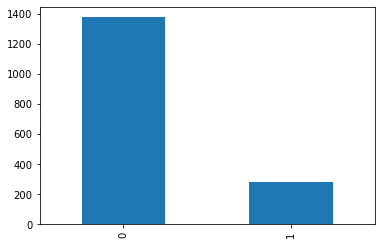

In [53]:
data['target'].value_counts().plot.bar()

In [54]:
target0 = data[data['target'] == 0]
target1 = data[data['target'] == 1]

In [55]:
target0.shape, target1.shape

((1378, 28), (280, 28))

In [56]:
tar0 = target0[:281]

In [57]:
tar0

,2009,2010,2011,2012,2013,2014,2015,2016,Individuals_Affected,Desktop Computer,...,Loss,Improper Disposal,Unauthorized Access/Disclosure,Theft,Unknown,Healthcare Clearing House,Business Associate,Health Plan,Healthcare Provider,target
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,151626,0,...,0,0,0,0,0,0,0,0,1,0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,660,0,...,0,0,0,0,0,0,0,0,1,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3000,0,...,0,0,0,0,0,0,0,1,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1100,0,...,0,0,0,0,0,0,0,0,1,0
6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,26416,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1339,0,...,1,0,0,0,0,0,0,0,1,0
325,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6800,0,...,1,0,0,0,0,0,0,0,1,0
326,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1102,0,...,1,0,0,0,0,0,0,1,0,0
327,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1138,0,...,1,0,0,0,0,0,0,0,1,0


In [58]:
from sklearn.model_selection import train_test_split

In [211]:
X = data[['2009', '2010', '2011', '2012', '2013', '2014','2015', '2016', 'Individuals_Affected',
            'Desktop Computer','Electronic Medical Record', 'Other', 'Paper/Films', 'Laptop', 'Email','Network Server', 
             'Other Portable Electronic Device','Hacking/IT Incident', 'Loss', 'Improper Disposal',
          'Unauthorized Access/Disclosure', 
             'Theft', 'Unknown','Healthcare Clearing House', 'Business Associate', 'Health Plan','Healthcare Provider']]

In [212]:
Y = data[['target']]

In [213]:
X.shape, Y.shape

((1658, 27), (1658, 1))

## Performing with Normal Imbalanced Dataset

In [62]:
# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.4, random_state=42, stratify = Y)

**GAUSSIAN NAIVE BAYES**

In [63]:
from sklearn.naive_bayes import GaussianNB

In [64]:
gnb = GaussianNB()

In [65]:
y_pred = gnb.fit(X_train, y_train).predict(X_test)

C:\Users\Lenovo\.conda\envs\tensorflow_cpu\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [66]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [67]:
confusion_matrix(y_test, y_pred)

array([[543,   9],
       [108,   4]], dtype=int64)

In [68]:
target_names = ['class 0', 'class 1']

In [69]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.83      0.98      0.90       552
     class 1       0.31      0.04      0.06       112

    accuracy                           0.82       664
   macro avg       0.57      0.51      0.48       664
weighted avg       0.75      0.82      0.76       664



**USING NEURAL NETWORK**

In [70]:
# define the keras model
model = Sequential()
model.add(Dense(128, input_dim=27, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [71]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [72]:
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
994/994 [==============================] - 0s 290us/step - loss: 218.9859 - accuracy: 0.5905
Epoch 2/150
994/994 [==============================] - 0s 144us/step - loss: 879.6803 - accuracy: 0.4487
Epoch 3/150
994/994 [==============================] - 0s 165us/step - loss: 960.1815 - accuracy: 0.6368
Epoch 4/150
994/994 [==============================] - 0s 155us/step - loss: 630.6238 - accuracy: 0.7173
Epoch 5/150
994/994 [==============================] - 0s 162us/step - loss: 526.3794 - accuracy: 0.6922
Epoch 6/150
994/994 [==============================] - 0s 175us/step - loss: 445.6023 - accuracy: 0.5091
Epoch 7/150
994/994 [==============================] - 0s 176us/step - loss: 431.3060 - accuracy: 0.5252
Epoch 8/150
994/994 [==============================] - 0s 166us/step - loss: 1031.8298 - accuracy: 0.5614
Epoch 9/150
994/994 [==============================] - 0s 170us/step - loss: 636.9607 - accuracy: 0.5664
Epoch 10/150
994/994 [==============================] 

994/994 [==============================] - 0s 120us/step - loss: 6.4352 - accuracy: 0.8048
Epoch 79/150
994/994 [==============================] - 0s 114us/step - loss: 34.5878 - accuracy: 0.7907
Epoch 80/150
994/994 [==============================] - 0s 136us/step - loss: 29.9310 - accuracy: 0.6579
Epoch 81/150
994/994 [==============================] - 0s 136us/step - loss: 17.9770 - accuracy: 0.7304
Epoch 82/150
994/994 [==============================] - 0s 123us/step - loss: 11.7556 - accuracy: 0.7334
Epoch 83/150
994/994 [==============================] - 0s 117us/step - loss: 9.1014 - accuracy: 0.7314
Epoch 84/150
994/994 [==============================] - 0s 133us/step - loss: 7.1223 - accuracy: 0.7897
Epoch 85/150
994/994 [==============================] - 0s 117us/step - loss: 5.7464 - accuracy: 0.8099
Epoch 86/150
994/994 [==============================] - 0s 119us/step - loss: 4.8957 - accuracy: 0.7606
Epoch 87/150
994/994 [==============================] - 0s 126us/step - l

In [73]:
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

664/664 [==============================] - 0s 44us/step
Accuracy: 83.13


**SECOND NEURAL NETWORK MODEL**

In [74]:
# define the keras model
model1 = Sequential()
model1.add(Dense(128, input_dim=27, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
# compile the keras model
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model1.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=150, batch_size=10)
# evaluate the keras model
_, accuracy = model1.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

Train on 994 samples, validate on 664 samples
Epoch 1/150
994/994 [==============================] - 0s 287us/step - loss: 850.9008 - accuracy: 0.4930 - val_loss: 6295.6215 - val_accuracy: 0.1687
Epoch 2/150
994/994 [==============================] - 0s 194us/step - loss: 353.7137 - accuracy: 0.5835 - val_loss: 53.6646 - val_accuracy: 0.8313
Epoch 3/150
994/994 [==============================] - 0s 182us/step - loss: 243.1945 - accuracy: 0.6539 - val_loss: 67.1211 - val_accuracy: 0.7304
Epoch 4/150
994/994 [==============================] - 0s 180us/step - loss: 1251.5143 - accuracy: 0.6207 - val_loss: 15871.9767 - val_accuracy: 0.1687
Epoch 5/150
994/994 [==============================] - 0s 172us/step - loss: 627.4276 - accuracy: 0.6107 - val_loss: 48.1574 - val_accuracy: 0.8313
Epoch 6/150
994/994 [==============================] - 0s 161us/step - loss: 825.3311 - accuracy: 0.5161 - val_loss: 545.5213 - val_accuracy: 0.8313
Epoch 7/150
994/994 [==============================] - 0s 1

994/994 [==============================] - 0s 193us/step - loss: 9.1397 - accuracy: 0.7696 - val_loss: 21.3137 - val_accuracy: 0.7485
Epoch 111/150
994/994 [==============================] - 0s 190us/step - loss: 6.1623 - accuracy: 0.7897 - val_loss: 7.1725 - val_accuracy: 0.7877
Epoch 112/150
994/994 [==============================] - 0s 180us/step - loss: 1.6672 - accuracy: 0.7837 - val_loss: 43.3113 - val_accuracy: 0.7455
Epoch 113/150
994/994 [==============================] - 0s 188us/step - loss: 7.6001 - accuracy: 0.7918 - val_loss: 44.7424 - val_accuracy: 0.7380
Epoch 114/150
994/994 [==============================] - 0s 186us/step - loss: 6.1783 - accuracy: 0.7847 - val_loss: 3.5169 - val_accuracy: 0.8313
Epoch 115/150
994/994 [==============================] - 0s 172us/step - loss: 4.7994 - accuracy: 0.8058 - val_loss: 6.2685 - val_accuracy: 0.8313
Epoch 116/150
994/994 [==============================] - 0s 174us/step - loss: 2.4038 - accuracy: 0.7978 - val_loss: 5.4705 - val

## Using  balanced Dataset

In [132]:
x_tot = pd.concat([ tar0[:280], target1])

In [133]:
x_tot["target"].value_counts()

1    280
0    280
Name: target, dtype: int64

In [134]:
len(x_tot.columns)

28

In [135]:
X = x_tot[['2009', '2010', '2011', '2012', '2013', '2014','2015', '2016', 'Individuals_Affected',
            'Desktop Computer','Electronic Medical Record', 'Other', 'Paper/Films', 'Laptop', 'Email','Network Server', 
             'Other Portable Electronic Device','Hacking/IT Incident', 'Loss', 'Improper Disposal','Unauthorized Access/Disclosure', 
             'Theft', 'Unknown','Healthcare Clearing House', 'Business Associate', 'Health Plan','Healthcare Provider']]

In [136]:
Y = x_tot[['target']]

In [137]:
X.shape, Y.shape

((560, 27), (560, 1))

In [138]:
# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.4, random_state=42, stratify = Y)

In [139]:
y_pred = gnb.fit(X_train, y_train).predict(X_test)

C:\Users\Lenovo\.conda\envs\tensorflow_cpu\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [140]:
confusion_matrix(y_test, y_pred)

array([[  2, 110],
       [  3, 109]], dtype=int64)

In [102]:
checkpoint = ModelCheckpoint('model-{epoch:03d}-{accuracy:03f}-{val_accuracy:03f}.h5', verbose=0, monitor='val_loss',save_best_only=True, mode='auto')  

In [103]:
# define the keras model
model1 = Sequential()
model1.add(Dense(128, input_dim=27, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
# compile the keras model
model1.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
# fit the keras model on the dataset
# Fit the model
history = model1.fit(X_train, y_train, validation_data=(X_test,y_test),  callbacks=[checkpoint], 
                     epochs= 500, batch_size=10)
# evaluate the keras model
_, accuracy = model1.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

Train on 336 samples, validate on 224 samples
Epoch 1/500
336/336 [==============================] - 0s 410us/step - loss: 1231.8829 - accuracy: 0.4583 - val_loss: 657.2239 - val_accuracy: 0.5000
Epoch 2/500
336/336 [==============================] - 0s 151us/step - loss: 3954.1313 - accuracy: 0.4762 - val_loss: 3531.3882 - val_accuracy: 0.5000
Epoch 3/500
336/336 [==============================] - 0s 163us/step - loss: 1765.3041 - accuracy: 0.4851 - val_loss: 654.4119 - val_accuracy: 0.5000
Epoch 4/500
336/336 [==============================] - 0s 193us/step - loss: 1870.3548 - accuracy: 0.5119 - val_loss: 18.4723 - val_accuracy: 0.6473
Epoch 5/500
336/336 [==============================] - 0s 157us/step - loss: 2323.6450 - accuracy: 0.5030 - val_loss: 440.5834 - val_accuracy: 0.5000
Epoch 6/500
336/336 [==============================] - 0s 151us/step - loss: 1217.1076 - accuracy: 0.5208 - val_loss: 3257.9569 - val_accuracy: 0.5000
Epoch 7/500
336/336 [==============================] 

Epoch 55/500
336/336 [==============================] - 0s 137us/step - loss: 384.8864 - accuracy: 0.6607 - val_loss: 2610.1655 - val_accuracy: 0.5000
Epoch 56/500
336/336 [==============================] - 0s 145us/step - loss: 2501.0662 - accuracy: 0.4792 - val_loss: 1666.2249 - val_accuracy: 0.5000
Epoch 57/500
336/336 [==============================] - 0s 142us/step - loss: 861.7339 - accuracy: 0.5446 - val_loss: 1617.1849 - val_accuracy: 0.5000
Epoch 58/500
336/336 [==============================] - 0s 143us/step - loss: 524.6505 - accuracy: 0.5506 - val_loss: 80.8111 - val_accuracy: 0.6741
Epoch 59/500
336/336 [==============================] - 0s 145us/step - loss: 2250.4229 - accuracy: 0.5000 - val_loss: 1524.5466 - val_accuracy: 0.5045
Epoch 60/500
336/336 [==============================] - 0s 145us/step - loss: 1173.7477 - accuracy: 0.5595 - val_loss: 182.5558 - val_accuracy: 0.6295
Epoch 61/500
336/336 [==============================] - 0s 140us/step - loss: 1463.3609 - accu

336/336 [==============================] - 0s 142us/step - loss: 331.6515 - accuracy: 0.6786 - val_loss: 1106.3804 - val_accuracy: 0.5000
Epoch 164/500
336/336 [==============================] - 0s 163us/step - loss: 4132.9312 - accuracy: 0.6488 - val_loss: 860.9159 - val_accuracy: 0.6027
Epoch 165/500
336/336 [==============================] - 0s 148us/step - loss: 562.5066 - accuracy: 0.7381 - val_loss: 993.7087 - val_accuracy: 0.5000
Epoch 166/500
336/336 [==============================] - 0s 137us/step - loss: 1876.0164 - accuracy: 0.5863 - val_loss: 1183.7448 - val_accuracy: 0.5670
Epoch 167/500
336/336 [==============================] - 0s 131us/step - loss: 638.1984 - accuracy: 0.6905 - val_loss: 414.8416 - val_accuracy: 0.6786
Epoch 168/500
336/336 [==============================] - 0s 131us/step - loss: 2205.0422 - accuracy: 0.6339 - val_loss: 789.7628 - val_accuracy: 0.6205
Epoch 169/500
336/336 [==============================] - 0s 142us/step - loss: 716.5647 - accuracy: 0.6

336/336 [==============================] - 0s 160us/step - loss: 474.1963 - accuracy: 0.7054 - val_loss: 96.9590 - val_accuracy: 0.8125
Epoch 272/500
336/336 [==============================] - 0s 154us/step - loss: 538.2119 - accuracy: 0.7024 - val_loss: 775.4043 - val_accuracy: 0.6116
Epoch 273/500
336/336 [==============================] - 0s 154us/step - loss: 557.8695 - accuracy: 0.7798 - val_loss: 37.1768 - val_accuracy: 0.8214
Epoch 274/500
336/336 [==============================] - 0s 157us/step - loss: 3117.7428 - accuracy: 0.8065 - val_loss: 308.6391 - val_accuracy: 0.5312
Epoch 275/500
336/336 [==============================] - 0s 160us/step - loss: 403.5161 - accuracy: 0.6994 - val_loss: 210.6489 - val_accuracy: 0.5714
Epoch 276/500
336/336 [==============================] - 0s 151us/step - loss: 2061.2357 - accuracy: 0.6250 - val_loss: 501.1001 - val_accuracy: 0.6696
Epoch 277/500
336/336 [==============================] - 0s 166us/step - loss: 369.2953 - accuracy: 0.7857 -

336/336 [==============================] - 0s 178us/step - loss: 68.3657 - accuracy: 0.8065 - val_loss: 439.5194 - val_accuracy: 0.5223
Epoch 380/500
336/336 [==============================] - 0s 160us/step - loss: 462.7174 - accuracy: 0.7440 - val_loss: 337.4672 - val_accuracy: 0.6786
Epoch 381/500
336/336 [==============================] - 0s 154us/step - loss: 254.3928 - accuracy: 0.7798 - val_loss: 146.0203 - val_accuracy: 0.6250
Epoch 382/500
336/336 [==============================] - 0s 163us/step - loss: 573.6929 - accuracy: 0.7619 - val_loss: 272.7478 - val_accuracy: 0.7054
Epoch 383/500
336/336 [==============================] - 0s 160us/step - loss: 193.8358 - accuracy: 0.7946 - val_loss: 136.6275 - val_accuracy: 0.7679
Epoch 384/500
336/336 [==============================] - 0s 137us/step - loss: 959.1525 - accuracy: 0.7708 - val_loss: 23.7937 - val_accuracy: 0.8616
Epoch 385/500
336/336 [==============================] - 0s 137us/step - loss: 325.9763 - accuracy: 0.8333 - v

Epoch 488/500
336/336 [==============================] - 0s 148us/step - loss: 64.9129 - accuracy: 0.9226 - val_loss: 122.0363 - val_accuracy: 0.8036
Epoch 489/500
336/336 [==============================] - 0s 145us/step - loss: 73.2309 - accuracy: 0.8333 - val_loss: 8.0493 - val_accuracy: 0.8348
Epoch 490/500
336/336 [==============================] - 0s 142us/step - loss: 424.6227 - accuracy: 0.8571 - val_loss: 34.1981 - val_accuracy: 0.8571
Epoch 491/500
336/336 [==============================] - 0s 148us/step - loss: 134.8663 - accuracy: 0.8036 - val_loss: 148.1503 - val_accuracy: 0.7277
Epoch 492/500
336/336 [==============================] - 0s 134us/step - loss: 119.7865 - accuracy: 0.8839 - val_loss: 42.4874 - val_accuracy: 0.8393
Epoch 493/500
336/336 [==============================] - 0s 142us/step - loss: 65.9603 - accuracy: 0.8690 - val_loss: 107.5542 - val_accuracy: 0.7411
Epoch 494/500
336/336 [==============================] - 0s 148us/step - loss: 189.1006 - accuracy: 0

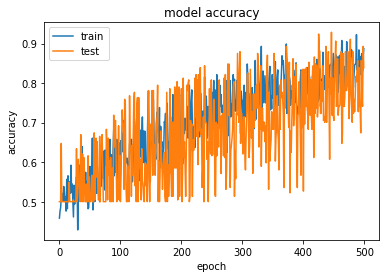

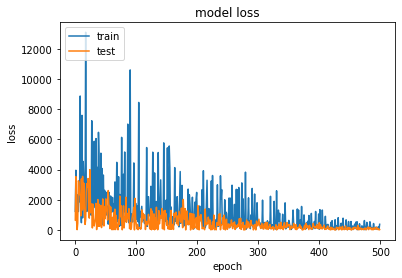

In [104]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [105]:
# evaluate the model
_, train_acc = model1.evaluate(X_train, y_train, verbose=0)
_, test_acc = model1.evaluate(X_test, y_test, verbose=0)
train_acc, test_acc

(0.8928571343421936, 0.8392857313156128)

In [106]:
# predict probabilities for test set
yhat_probs = model1.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model1.predict_classes(X_test, verbose=0)

In [109]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)

Accuracy: 0.839286
Precision: 0.941860
Recall: 0.723214
F1 score: 0.818182


In [110]:
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

Cohens kappa: 0.678571
ROC AUC: 0.811424
[[107   5]
 [ 31  81]]


## With Normalisation & Balanced Data

In [114]:
normalizer = preprocessing.Normalizer().fit(X_test)
X_test = normalizer.transform(X_test)

In [115]:
# define the keras model
model1 = Sequential()
model1.add(Dense(128, input_dim=27, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
# compile the keras model
model1.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
# fit the keras model on the dataset
# Fit the model
history = model1.fit(X_train, y_train, validation_data=(X_test,y_test),  callbacks=[checkpoint], 
                     epochs= 500, batch_size=10)
# evaluate the keras model
_, accuracy = model1.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

Train on 336 samples, validate on 224 samples
Epoch 1/500
336/336 [==============================] - 0s 567us/step - loss: 7003.0862 - accuracy: 0.5000 - val_loss: 0.6993 - val_accuracy: 0.5000
Epoch 2/500
336/336 [==============================] - 0s 185us/step - loss: 8640.3768 - accuracy: 0.5060 - val_loss: 0.7171 - val_accuracy: 0.5000
Epoch 3/500
336/336 [==============================] - 0s 163us/step - loss: 8287.3491 - accuracy: 0.5119 - val_loss: 0.7358 - val_accuracy: 0.5000
Epoch 4/500
336/336 [==============================] - 0s 166us/step - loss: 2489.5906 - accuracy: 0.5179 - val_loss: 0.7558 - val_accuracy: 0.5000
Epoch 5/500
336/336 [==============================] - 0s 181us/step - loss: 1980.4483 - accuracy: 0.4702 - val_loss: 0.7780 - val_accuracy: 0.5000
Epoch 6/500
336/336 [==============================] - 0s 187us/step - loss: 6679.2253 - accuracy: 0.5119 - val_loss: 0.7845 - val_accuracy: 0.5000
Epoch 7/500
336/336 [==============================] - 0s 178us/st

Epoch 56/500
336/336 [==============================] - 0s 142us/step - loss: 1414.8073 - accuracy: 0.5685 - val_loss: 1.5785 - val_accuracy: 0.5000
Epoch 57/500
336/336 [==============================] - 0s 140us/step - loss: 9865.3155 - accuracy: 0.5952 - val_loss: 1.6303 - val_accuracy: 0.5000
Epoch 58/500
336/336 [==============================] - 0s 140us/step - loss: 2340.8371 - accuracy: 0.5506 - val_loss: 1.5959 - val_accuracy: 0.5000
Epoch 59/500
336/336 [==============================] - 0s 140us/step - loss: 2060.1293 - accuracy: 0.5595 - val_loss: 1.7238 - val_accuracy: 0.5000
Epoch 60/500
336/336 [==============================] - 0s 148us/step - loss: 7801.8313 - accuracy: 0.5625 - val_loss: 1.7488 - val_accuracy: 0.5000
Epoch 61/500
336/336 [==============================] - 0s 160us/step - loss: 502.5374 - accuracy: 0.5179 - val_loss: 1.7762 - val_accuracy: 0.5000
Epoch 62/500
336/336 [==============================] - 0s 142us/step - loss: 6015.5976 - accuracy: 0.5536 

Epoch 111/500
336/336 [==============================] - 0s 137us/step - loss: 2104.7212 - accuracy: 0.6339 - val_loss: 2.1148 - val_accuracy: 0.5000
Epoch 112/500
336/336 [==============================] - 0s 134us/step - loss: 3058.5067 - accuracy: 0.5863 - val_loss: 2.1276 - val_accuracy: 0.5000
Epoch 113/500
336/336 [==============================] - 0s 134us/step - loss: 606.9370 - accuracy: 0.6607 - val_loss: 2.1583 - val_accuracy: 0.5000
Epoch 114/500
336/336 [==============================] - 0s 140us/step - loss: 4391.8288 - accuracy: 0.6190 - val_loss: 2.1678 - val_accuracy: 0.5000
Epoch 115/500
336/336 [==============================] - 0s 140us/step - loss: 1191.5943 - accuracy: 0.6101 - val_loss: 2.2151 - val_accuracy: 0.5000
Epoch 116/500
336/336 [==============================] - 0s 142us/step - loss: 325.3767 - accuracy: 0.6220 - val_loss: 2.1800 - val_accuracy: 0.5000
Epoch 117/500
336/336 [==============================] - 0s 140us/step - loss: 1257.7379 - accuracy: 0

Epoch 166/500
336/336 [==============================] - 0s 145us/step - loss: 442.3657 - accuracy: 0.6339 - val_loss: 2.2442 - val_accuracy: 0.5000
Epoch 167/500
336/336 [==============================] - 0s 142us/step - loss: 1546.4685 - accuracy: 0.6369 - val_loss: 2.1360 - val_accuracy: 0.5000
Epoch 168/500
336/336 [==============================] - 0s 137us/step - loss: 890.9605 - accuracy: 0.6577 - val_loss: 2.2216 - val_accuracy: 0.5000
Epoch 169/500
336/336 [==============================] - 0s 140us/step - loss: 191.9198 - accuracy: 0.7232 - val_loss: 2.2520 - val_accuracy: 0.5000
Epoch 170/500
336/336 [==============================] - 0s 142us/step - loss: 4314.1743 - accuracy: 0.6756 - val_loss: 2.2047 - val_accuracy: 0.5000
Epoch 171/500
336/336 [==============================] - 0s 137us/step - loss: 461.6701 - accuracy: 0.6994 - val_loss: 2.1900 - val_accuracy: 0.5000
Epoch 172/500
336/336 [==============================] - 0s 139us/step - loss: 3307.3099 - accuracy: 0.6

Epoch 221/500
336/336 [==============================] - 0s 137us/step - loss: 491.6371 - accuracy: 0.6935 - val_loss: 2.1430 - val_accuracy: 0.5000
Epoch 222/500
336/336 [==============================] - 0s 145us/step - loss: 874.9007 - accuracy: 0.5655 - val_loss: 2.0531 - val_accuracy: 0.5000
Epoch 223/500
336/336 [==============================] - 0s 140us/step - loss: 3404.6245 - accuracy: 0.7262 - val_loss: 2.0535 - val_accuracy: 0.5000
Epoch 224/500
336/336 [==============================] - 0s 199us/step - loss: 138.4643 - accuracy: 0.7470 - val_loss: 2.1171 - val_accuracy: 0.5000
Epoch 225/500
336/336 [==============================] - 0s 169us/step - loss: 1531.2141 - accuracy: 0.6726 - val_loss: 2.1476 - val_accuracy: 0.5000
Epoch 226/500
336/336 [==============================] - 0s 142us/step - loss: 1670.9714 - accuracy: 0.6935 - val_loss: 2.0910 - val_accuracy: 0.5000
Epoch 227/500
336/336 [==============================] - 0s 140us/step - loss: 401.4090 - accuracy: 0.6

Epoch 276/500
336/336 [==============================] - 0s 199us/step - loss: 787.1795 - accuracy: 0.6429 - val_loss: 2.2511 - val_accuracy: 0.5000
Epoch 277/500
336/336 [==============================] - 0s 208us/step - loss: 695.5226 - accuracy: 0.7351 - val_loss: 2.3598 - val_accuracy: 0.5000
Epoch 278/500
336/336 [==============================] - 0s 157us/step - loss: 295.3078 - accuracy: 0.7113 - val_loss: 2.3228 - val_accuracy: 0.5000
Epoch 279/500
336/336 [==============================] - 0s 140us/step - loss: 536.5229 - accuracy: 0.7351 - val_loss: 2.2747 - val_accuracy: 0.5000
Epoch 280/500
336/336 [==============================] - 0s 134us/step - loss: 465.0738 - accuracy: 0.7292 - val_loss: 2.2790 - val_accuracy: 0.5000
Epoch 281/500
336/336 [==============================] - 0s 140us/step - loss: 1023.5942 - accuracy: 0.6905 - val_loss: 2.2245 - val_accuracy: 0.5000
Epoch 282/500
336/336 [==============================] - 0s 140us/step - loss: 444.8706 - accuracy: 0.779

Epoch 331/500
336/336 [==============================] - 0s 151us/step - loss: 2654.7792 - accuracy: 0.7589 - val_loss: 1.9177 - val_accuracy: 0.5000
Epoch 332/500
336/336 [==============================] - 0s 134us/step - loss: 57.1640 - accuracy: 0.8452 - val_loss: 1.9161 - val_accuracy: 0.5000
Epoch 333/500
336/336 [==============================] - 0s 134us/step - loss: 365.3157 - accuracy: 0.7440 - val_loss: 1.9193 - val_accuracy: 0.5000
Epoch 334/500
336/336 [==============================] - 0s 160us/step - loss: 460.3389 - accuracy: 0.7024 - val_loss: 1.8277 - val_accuracy: 0.5000
Epoch 335/500
336/336 [==============================] - 0s 160us/step - loss: 298.4889 - accuracy: 0.7679 - val_loss: 1.9507 - val_accuracy: 0.5000
Epoch 336/500
336/336 [==============================] - 0s 169us/step - loss: 952.2607 - accuracy: 0.6696 - val_loss: 1.8908 - val_accuracy: 0.5000
Epoch 337/500
336/336 [==============================] - 0s 151us/step - loss: 137.4712 - accuracy: 0.8810

Epoch 386/500
336/336 [==============================] - 0s 196us/step - loss: 197.4098 - accuracy: 0.7798 - val_loss: 1.7397 - val_accuracy: 0.5000
Epoch 387/500
336/336 [==============================] - 0s 151us/step - loss: 158.6347 - accuracy: 0.7173 - val_loss: 1.7046 - val_accuracy: 0.5000
Epoch 388/500
336/336 [==============================] - 0s 148us/step - loss: 111.2166 - accuracy: 0.7292 - val_loss: 1.6238 - val_accuracy: 0.5000
Epoch 389/500
336/336 [==============================] - 0s 145us/step - loss: 160.1311 - accuracy: 0.7113 - val_loss: 1.5936 - val_accuracy: 0.5000
Epoch 390/500
336/336 [==============================] - 0s 166us/step - loss: 104.0999 - accuracy: 0.8065 - val_loss: 1.6436 - val_accuracy: 0.5000
Epoch 391/500
336/336 [==============================] - 0s 154us/step - loss: 885.9757 - accuracy: 0.7411 - val_loss: 1.6069 - val_accuracy: 0.5000
Epoch 392/500
336/336 [==============================] - 0s 154us/step - loss: 1263.4260 - accuracy: 0.866

336/336 [==============================] - 0s 137us/step - loss: 536.2269 - accuracy: 0.7857 - val_loss: 1.8111 - val_accuracy: 0.5000
Epoch 442/500
336/336 [==============================] - 0s 145us/step - loss: 189.6015 - accuracy: 0.8542 - val_loss: 1.7686 - val_accuracy: 0.5000
Epoch 443/500
336/336 [==============================] - 0s 137us/step - loss: 1363.6170 - accuracy: 0.8631 - val_loss: 1.7652 - val_accuracy: 0.5000
Epoch 444/500
336/336 [==============================] - 0s 145us/step - loss: 626.0121 - accuracy: 0.8065 - val_loss: 1.7263 - val_accuracy: 0.5000
Epoch 445/500
336/336 [==============================] - 0s 151us/step - loss: 216.0841 - accuracy: 0.8393 - val_loss: 1.7850 - val_accuracy: 0.5000
Epoch 446/500
336/336 [==============================] - 0s 142us/step - loss: 214.1722 - accuracy: 0.8125 - val_loss: 1.7227 - val_accuracy: 0.5000
Epoch 447/500
336/336 [==============================] - 0s 148us/step - loss: 262.6165 - accuracy: 0.8095 - val_loss: 

336/336 [==============================] - 0s 172us/step - loss: 34.4195 - accuracy: 0.8601 - val_loss: 1.6919 - val_accuracy: 0.5000
Epoch 497/500
336/336 [==============================] - 0s 181us/step - loss: 391.0357 - accuracy: 0.7946 - val_loss: 1.6576 - val_accuracy: 0.5000
Epoch 498/500
336/336 [==============================] - 0s 166us/step - loss: 98.4672 - accuracy: 0.9196 - val_loss: 1.6526 - val_accuracy: 0.5000
Epoch 499/500
336/336 [==============================] - 0s 163us/step - loss: 185.1244 - accuracy: 0.8036 - val_loss: 1.6208 - val_accuracy: 0.5000
Epoch 500/500
224/224 [==============================] - 0s 18us/step
Accuracy: 50.00


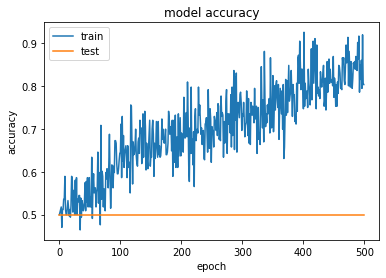

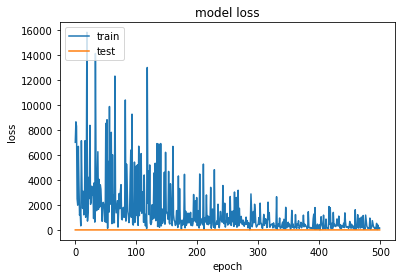

In [116]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [117]:
# evaluate the model
_, train_acc = model1.evaluate(X_train, y_train, verbose=0)
_, test_acc = model1.evaluate(X_test, y_test, verbose=0)
train_acc, test_acc

(0.8422619104385376, 0.5)

In [ ]:
# predict probabilities for test set
yhat_probs = model1.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model1.predict_classes(X_test, verbose=0)

In [118]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)

Accuracy: 0.839286
Precision: 0.941860
Recall: 0.723214
F1 score: 0.818182


In [119]:
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

Cohens kappa: 0.678571
ROC AUC: 0.811424
[[107   5]
 [ 31  81]]


**IDEA DROPPED**

## Working with Enhanced Test Set

In [141]:
data.shape, X.shape, Y.shape

((1658, 28), (560, 27), (560, 1))

In [142]:
remx = target0[280:]

In [143]:
remx.shape, tar0.shape

((1098, 28), (281, 28))

In [144]:
remx_X = remx[['2009', '2010', '2011', '2012', '2013', '2014','2015', '2016', 'Individuals_Affected',
            'Desktop Computer','Electronic Medical Record', 'Other', 'Paper/Films', 'Laptop', 'Email','Network Server', 
             'Other Portable Electronic Device','Hacking/IT Incident', 'Loss', 'Improper Disposal','Unauthorized Access/Disclosure', 
             'Theft', 'Unknown','Healthcare Clearing House', 'Business Associate', 'Health Plan','Healthcare Provider']]

In [145]:
remx_Y = remx[['target']]

In [146]:
X_test = pd.concat([pd.DataFrame(X_test), remx_X])

In [147]:
X_test.shape

(1322, 27)

In [148]:
X_test = X_test.to_numpy()

In [150]:
Y_test = pd.concat([pd.DataFrame(y_test), remx_Y])

In [152]:
Y_test.shape

(1322, 1)

## **RUNNING THE MODELS ON ENHANCED TEST SET**

In [168]:
checkpoint = ModelCheckpoint('model-{epoch:03d}-{accuracy:03f}-{val_accuracy:03f}.h5', verbose=0, monitor='val_loss',save_best_only=True, mode='auto') 

In [169]:
# define the keras model
model1 = Sequential()
model1.add(Dense(128, input_dim=27, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
# compile the keras model
model1.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
# fit the keras model on the dataset
# Fit the model
history = model1.fit(X_train, y_train, validation_data=(X_test,Y_test),  callbacks=[checkpoint], 
                     epochs= 7500, batch_size=10)
# evaluate the keras model
_, accuracy = model1.evaluate(X_test, Y_test)
print('Accuracy: %.2f' % (accuracy*100))

Train on 336 samples, validate on 1322 samples
Epoch 1/7500
336/336 [==============================] - 0s 596us/step - loss: 11157.5042 - accuracy: 0.4881 - val_loss: 37.0531 - val_accuracy: 0.9153
Epoch 2/7500
336/336 [==============================] - 0s 349us/step - loss: 1858.4723 - accuracy: 0.4702 - val_loss: 151.2543 - val_accuracy: 0.9153
Epoch 3/7500
336/336 [==============================] - 0s 345us/step - loss: 20226.6503 - accuracy: 0.4940 - val_loss: 149.5420 - val_accuracy: 0.9153
Epoch 4/7500
336/336 [==============================] - 0s 397us/step - loss: 2867.0474 - accuracy: 0.5238 - val_loss: 791.6068 - val_accuracy: 0.9153
Epoch 5/7500
336/336 [==============================] - 0s 399us/step - loss: 3133.7340 - accuracy: 0.5000 - val_loss: 829.7592 - val_accuracy: 0.0847
Epoch 6/7500
336/336 [==============================] - 0s 387us/step - loss: 4111.8789 - accuracy: 0.5000 - val_loss: 720.5904 - val_accuracy: 0.9153
Epoch 7/7500
336/336 [========================

Epoch 55/7500
336/336 [==============================] - 0s 391us/step - loss: 1464.2203 - accuracy: 0.5060 - val_loss: 410.4544 - val_accuracy: 0.9153
Epoch 56/7500
336/336 [==============================] - 0s 363us/step - loss: 5585.4398 - accuracy: 0.4940 - val_loss: 294.7764 - val_accuracy: 0.9160
Epoch 57/7500
336/336 [==============================] - 0s 380us/step - loss: 1156.1546 - accuracy: 0.5268 - val_loss: 206.1729 - val_accuracy: 0.9062
Epoch 58/7500
336/336 [==============================] - 0s 370us/step - loss: 719.3157 - accuracy: 0.5893 - val_loss: 9.0574 - val_accuracy: 0.1195
Epoch 59/7500
336/336 [==============================] - 0s 371us/step - loss: 5135.1113 - accuracy: 0.5030 - val_loss: 180.6356 - val_accuracy: 0.8828
Epoch 60/7500
336/336 [==============================] - 0s 323us/step - loss: 2782.0173 - accuracy: 0.5506 - val_loss: 379.2365 - val_accuracy: 0.9153
Epoch 61/7500
336/336 [==============================] - 0s 292us/step - loss: 1648.0865 - 

336/336 [==============================] - 0s 330us/step - loss: 1529.4216 - accuracy: 0.6101 - val_loss: 809.7249 - val_accuracy: 0.0847
Epoch 110/7500
336/336 [==============================] - 0s 345us/step - loss: 1046.8479 - accuracy: 0.6369 - val_loss: 53.0942 - val_accuracy: 0.6044
Epoch 111/7500
336/336 [==============================] - 0s 345us/step - loss: 1599.9222 - accuracy: 0.5506 - val_loss: 333.6354 - val_accuracy: 0.9206
Epoch 112/7500
336/336 [==============================] - 0s 320us/step - loss: 2497.4241 - accuracy: 0.6101 - val_loss: 377.3040 - val_accuracy: 0.9198
Epoch 113/7500
336/336 [==============================] - 0s 296us/step - loss: 1823.3724 - accuracy: 0.6250 - val_loss: 96.0537 - val_accuracy: 0.7307
Epoch 114/7500
336/336 [==============================] - 0s 301us/step - loss: 1081.1105 - accuracy: 0.6756 - val_loss: 182.9401 - val_accuracy: 0.8601
Epoch 115/7500
336/336 [==============================] - 0s 299us/step - loss: 1074.9673 - accurac

Epoch 163/7500
336/336 [==============================] - 0s 326us/step - loss: 397.3752 - accuracy: 0.6696 - val_loss: 249.7509 - val_accuracy: 0.0870
Epoch 164/7500
336/336 [==============================] - 0s 302us/step - loss: 2777.8469 - accuracy: 0.6637 - val_loss: 54.1887 - val_accuracy: 0.6467
Epoch 165/7500
336/336 [==============================] - 0s 346us/step - loss: 428.6124 - accuracy: 0.7024 - val_loss: 9.4597 - val_accuracy: 0.2095
Epoch 166/7500
336/336 [==============================] - 0s 348us/step - loss: 893.5685 - accuracy: 0.7708 - val_loss: 286.4085 - val_accuracy: 0.0862
Epoch 167/7500
336/336 [==============================] - 0s 297us/step - loss: 840.7458 - accuracy: 0.6220 - val_loss: 230.1925 - val_accuracy: 0.9145
Epoch 168/7500
336/336 [==============================] - 0s 345us/step - loss: 972.2110 - accuracy: 0.7054 - val_loss: 19.5935 - val_accuracy: 0.4009
Epoch 169/7500
336/336 [==============================] - 0s 345us/step - loss: 643.7189 - 

336/336 [==============================] - 0s 344us/step - loss: 32.9017 - accuracy: 0.7827 - val_loss: 121.8938 - val_accuracy: 0.0915
Epoch 218/7500
336/336 [==============================] - 0s 345us/step - loss: 1661.5010 - accuracy: 0.6696 - val_loss: 64.9984 - val_accuracy: 0.7451
Epoch 219/7500
336/336 [==============================] - 0s 291us/step - loss: 329.1840 - accuracy: 0.6607 - val_loss: 23.8494 - val_accuracy: 0.5257
Epoch 220/7500
336/336 [==============================] - 0s 296us/step - loss: 282.6184 - accuracy: 0.6399 - val_loss: 61.3886 - val_accuracy: 0.7481
Epoch 221/7500
336/336 [==============================] - 0s 347us/step - loss: 377.3859 - accuracy: 0.6994 - val_loss: 374.2353 - val_accuracy: 0.0847
Epoch 222/7500
336/336 [==============================] - 0s 346us/step - loss: 196.3641 - accuracy: 0.6458 - val_loss: 20.5544 - val_accuracy: 0.5144
Epoch 223/7500
336/336 [==============================] - 0s 350us/step - loss: 422.2297 - accuracy: 0.6518

336/336 [==============================] - 0s 301us/step - loss: 475.2974 - accuracy: 0.7619 - val_loss: 11.9734 - val_accuracy: 0.2489
Epoch 326/7500
336/336 [==============================] - 0s 299us/step - loss: 2280.1013 - accuracy: 0.8214 - val_loss: 31.0504 - val_accuracy: 0.5825
Epoch 327/7500
336/336 [==============================] - 0s 301us/step - loss: 88.3924 - accuracy: 0.8393 - val_loss: 28.8926 - val_accuracy: 0.5703
Epoch 328/7500
336/336 [==============================] - 0s 343us/step - loss: 717.7048 - accuracy: 0.7411 - val_loss: 68.4076 - val_accuracy: 0.7383
Epoch 329/7500
336/336 [==============================] - 0s 370us/step - loss: 628.2898 - accuracy: 0.7946 - val_loss: 93.2412 - val_accuracy: 0.7867
Epoch 330/7500
336/336 [==============================] - 0s 297us/step - loss: 341.0442 - accuracy: 0.7560 - val_loss: 93.7005 - val_accuracy: 0.1286
Epoch 331/7500
336/336 [==============================] - 0s 299us/step - loss: 947.6850 - accuracy: 0.7768 -

336/336 [==============================] - 0s 347us/step - loss: 510.1549 - accuracy: 0.7798 - val_loss: 44.0452 - val_accuracy: 0.7110
Epoch 434/7500
336/336 [==============================] - 0s 347us/step - loss: 107.5776 - accuracy: 0.8601 - val_loss: 32.9340 - val_accuracy: 0.2118
Epoch 435/7500
336/336 [==============================] - 0s 357us/step - loss: 144.5347 - accuracy: 0.8036 - val_loss: 99.8895 - val_accuracy: 0.1369
Epoch 436/7500
336/336 [==============================] - 0s 345us/step - loss: 924.0981 - accuracy: 0.8244 - val_loss: 9.1592 - val_accuracy: 0.4085
Epoch 437/7500
336/336 [==============================] - 0s 390us/step - loss: 670.5867 - accuracy: 0.8125 - val_loss: 40.9275 - val_accuracy: 0.6770
Epoch 438/7500
336/336 [==============================] - 0s 340us/step - loss: 49.3512 - accuracy: 0.8661 - val_loss: 142.8555 - val_accuracy: 0.1452
Epoch 439/7500
336/336 [==============================] - 0s 304us/step - loss: 140.4949 - accuracy: 0.8185 - 

336/336 [==============================] - 0s 349us/step - loss: 190.3724 - accuracy: 0.8363 - val_loss: 64.8372 - val_accuracy: 0.2020
Epoch 542/7500
336/336 [==============================] - 0s 339us/step - loss: 164.1406 - accuracy: 0.8095 - val_loss: 16.7128 - val_accuracy: 0.5885
Epoch 543/7500
336/336 [==============================] - 0s 344us/step - loss: 122.7454 - accuracy: 0.8452 - val_loss: 9.2388 - val_accuracy: 0.5159
Epoch 544/7500
336/336 [==============================] - 0s 344us/step - loss: 212.1705 - accuracy: 0.8542 - val_loss: 8.1348 - val_accuracy: 0.4917
Epoch 545/7500
336/336 [==============================] - 0s 310us/step - loss: 702.1703 - accuracy: 0.8899 - val_loss: 17.5934 - val_accuracy: 0.6271
Epoch 546/7500
336/336 [==============================] - 0s 347us/step - loss: 576.2811 - accuracy: 0.9226 - val_loss: 27.2223 - val_accuracy: 0.6884
Epoch 547/7500
336/336 [==============================] - 0s 343us/step - loss: 285.5254 - accuracy: 0.8720 - v

336/336 [==============================] - 0s 302us/step - loss: 490.2826 - accuracy: 0.8839 - val_loss: 16.6849 - val_accuracy: 0.6188
Epoch 650/7500
336/336 [==============================] - 0s 360us/step - loss: 90.5507 - accuracy: 0.8810 - val_loss: 10.6850 - val_accuracy: 0.5424
Epoch 651/7500
336/336 [==============================] - 0s 298us/step - loss: 17.3059 - accuracy: 0.9048 - val_loss: 4.1450 - val_accuracy: 0.3691
Epoch 652/7500
336/336 [==============================] - 0s 344us/step - loss: 51.4634 - accuracy: 0.9315 - val_loss: 3.6136 - val_accuracy: 0.3321
Epoch 653/7500
336/336 [==============================] - 0s 345us/step - loss: 107.7351 - accuracy: 0.9167 - val_loss: 52.3773 - val_accuracy: 0.2020
Epoch 654/7500
336/336 [==============================] - 0s 336us/step - loss: 446.1736 - accuracy: 0.8720 - val_loss: 5.5556 - val_accuracy: 0.2806
Epoch 655/7500
336/336 [==============================] - 0s 299us/step - loss: 22.1712 - accuracy: 0.9196 - val_lo

Epoch 758/7500
336/336 [==============================] - 0s 345us/step - loss: 407.3806 - accuracy: 0.8512 - val_loss: 20.5974 - val_accuracy: 0.6589
Epoch 759/7500
336/336 [==============================] - 0s 297us/step - loss: 78.9564 - accuracy: 0.8363 - val_loss: 3.1645 - val_accuracy: 0.2436
Epoch 760/7500
336/336 [==============================] - 0s 303us/step - loss: 281.8111 - accuracy: 0.7976 - val_loss: 13.1254 - val_accuracy: 0.5537
Epoch 761/7500
336/336 [==============================] - 0s 349us/step - loss: 28.1941 - accuracy: 0.8780 - val_loss: 4.0271 - val_accuracy: 0.3434
Epoch 762/7500
336/336 [==============================] - 0s 297us/step - loss: 151.5687 - accuracy: 0.8155 - val_loss: 10.0041 - val_accuracy: 0.5045
Epoch 763/7500
336/336 [==============================] - 0s 349us/step - loss: 105.2233 - accuracy: 0.8542 - val_loss: 17.5223 - val_accuracy: 0.6029
Epoch 764/7500
336/336 [==============================] - 0s 348us/step - loss: 94.8571 - accuracy

Epoch 867/7500
336/336 [==============================] - 0s 347us/step - loss: 21.1999 - accuracy: 0.8988 - val_loss: 4.5194 - val_accuracy: 0.2595
Epoch 868/7500
336/336 [==============================] - 0s 343us/step - loss: 465.8276 - accuracy: 0.8720 - val_loss: 4.3758 - val_accuracy: 0.4380
Epoch 869/7500
336/336 [==============================] - 0s 305us/step - loss: 146.0451 - accuracy: 0.8571 - val_loss: 5.2568 - val_accuracy: 0.4682
Epoch 870/7500
336/336 [==============================] - 0s 344us/step - loss: 18.0858 - accuracy: 0.8810 - val_loss: 18.0911 - val_accuracy: 0.2943
Epoch 871/7500
336/336 [==============================] - 0s 319us/step - loss: 27.2695 - accuracy: 0.8780 - val_loss: 50.4785 - val_accuracy: 0.2103
Epoch 872/7500
336/336 [==============================] - 0s 345us/step - loss: 39.2789 - accuracy: 0.8571 - val_loss: 5.4876 - val_accuracy: 0.3949
Epoch 873/7500
336/336 [==============================] - 0s 298us/step - loss: 302.4663 - accuracy: 0

Epoch 976/7500
336/336 [==============================] - 0s 299us/step - loss: 36.4035 - accuracy: 0.8571 - val_loss: 17.0852 - val_accuracy: 0.2799
Epoch 977/7500
336/336 [==============================] - 0s 349us/step - loss: 46.5368 - accuracy: 0.8512 - val_loss: 6.8497 - val_accuracy: 0.4766
Epoch 978/7500
336/336 [==============================] - 0s 347us/step - loss: 43.9636 - accuracy: 0.8750 - val_loss: 52.6654 - val_accuracy: 0.2360
Epoch 979/7500
336/336 [==============================] - 0s 298us/step - loss: 82.2021 - accuracy: 0.8780 - val_loss: 4.8160 - val_accuracy: 0.4811
Epoch 980/7500
336/336 [==============================] - 0s 345us/step - loss: 176.6174 - accuracy: 0.8185 - val_loss: 20.4597 - val_accuracy: 0.6490
Epoch 981/7500
336/336 [==============================] - 0s 344us/step - loss: 106.5329 - accuracy: 0.8274 - val_loss: 11.8532 - val_accuracy: 0.5961
Epoch 982/7500
336/336 [==============================] - 0s 329us/step - loss: 98.3616 - accuracy: 

Epoch 1084/7500
336/336 [==============================] - 0s 298us/step - loss: 73.3782 - accuracy: 0.8601 - val_loss: 6.1340 - val_accuracy: 0.5030
Epoch 1085/7500
336/336 [==============================] - 0s 343us/step - loss: 40.6052 - accuracy: 0.9226 - val_loss: 21.3600 - val_accuracy: 0.6725
Epoch 1086/7500
336/336 [==============================] - 0s 345us/step - loss: 223.0362 - accuracy: 0.8601 - val_loss: 10.8535 - val_accuracy: 0.5696
Epoch 1087/7500
336/336 [==============================] - 0s 345us/step - loss: 36.8270 - accuracy: 0.8899 - val_loss: 4.1113 - val_accuracy: 0.3472
Epoch 1088/7500
336/336 [==============================] - 0s 305us/step - loss: 29.0327 - accuracy: 0.8482 - val_loss: 3.9032 - val_accuracy: 0.4281
Epoch 1089/7500
336/336 [==============================] - 0s 346us/step - loss: 127.6796 - accuracy: 0.8423 - val_loss: 16.9592 - val_accuracy: 0.6422
Epoch 1090/7500
336/336 [==============================] - 0s 303us/step - loss: 60.5874 - accu

336/336 [==============================] - 0s 329us/step - loss: 70.6421 - accuracy: 0.8452 - val_loss: 3.6305 - val_accuracy: 0.3374
Epoch 1193/7500
336/336 [==============================] - 0s 298us/step - loss: 13.4090 - accuracy: 0.8631 - val_loss: 3.2693 - val_accuracy: 0.3729
Epoch 1194/7500
336/336 [==============================] - 0s 344us/step - loss: 42.3768 - accuracy: 0.8571 - val_loss: 9.5393 - val_accuracy: 0.5015
Epoch 1195/7500
336/336 [==============================] - 0s 349us/step - loss: 115.8615 - accuracy: 0.8661 - val_loss: 6.3820 - val_accuracy: 0.5431
Epoch 1196/7500
336/336 [==============================] - 0s 296us/step - loss: 33.9556 - accuracy: 0.8601 - val_loss: 35.5876 - val_accuracy: 0.2859
Epoch 1197/7500
336/336 [==============================] - 0s 302us/step - loss: 69.4718 - accuracy: 0.8601 - val_loss: 6.7927 - val_accuracy: 0.4697
Epoch 1198/7500
336/336 [==============================] - 0s 298us/step - loss: 197.2982 - accuracy: 0.8810 - val

336/336 [==============================] - 0s 402us/step - loss: 191.8373 - accuracy: 0.8690 - val_loss: 28.7284 - val_accuracy: 0.2678
Epoch 1301/7500
336/336 [==============================] - 0s 295us/step - loss: 304.1509 - accuracy: 0.8661 - val_loss: 3.8612 - val_accuracy: 0.3631
Epoch 1302/7500
336/336 [==============================] - 0s 345us/step - loss: 62.7328 - accuracy: 0.8542 - val_loss: 19.1926 - val_accuracy: 0.6664
Epoch 1303/7500
336/336 [==============================] - 0s 393us/step - loss: 169.6758 - accuracy: 0.8036 - val_loss: 15.4066 - val_accuracy: 0.6233
Epoch 1304/7500
336/336 [==============================] - 0s 345us/step - loss: 42.8585 - accuracy: 0.8988 - val_loss: 3.7037 - val_accuracy: 0.4145
Epoch 1305/7500
336/336 [==============================] - 0s 347us/step - loss: 66.0781 - accuracy: 0.8690 - val_loss: 27.8699 - val_accuracy: 0.2678
Epoch 1306/7500
336/336 [==============================] - 0s 359us/step - loss: 383.0211 - accuracy: 0.8631 

336/336 [==============================] - 0s 338us/step - loss: 905.0693 - accuracy: 0.9077 - val_loss: 14.6090 - val_accuracy: 0.5764
Epoch 1355/7500
336/336 [==============================] - 0s 351us/step - loss: 32.1487 - accuracy: 0.9137 - val_loss: 53.5478 - val_accuracy: 0.2179
Epoch 1356/7500
336/336 [==============================] - 0s 344us/step - loss: 45.2849 - accuracy: 0.8274 - val_loss: 19.8500 - val_accuracy: 0.2579
Epoch 1357/7500
336/336 [==============================] - 0s 346us/step - loss: 36.8530 - accuracy: 0.8363 - val_loss: 6.4011 - val_accuracy: 0.4622
Epoch 1358/7500
336/336 [==============================] - 0s 347us/step - loss: 189.9348 - accuracy: 0.8363 - val_loss: 6.8969 - val_accuracy: 0.2958
Epoch 1359/7500
336/336 [==============================] - 0s 349us/step - loss: 124.9476 - accuracy: 0.8304 - val_loss: 26.1539 - val_accuracy: 0.7171
Epoch 1360/7500
336/336 [==============================] - 0s 344us/step - loss: 106.7340 - accuracy: 0.7887 

336/336 [==============================] - 0s 316us/step - loss: 127.1859 - accuracy: 0.8214 - val_loss: 13.0181 - val_accuracy: 0.5303
Epoch 1463/7500
336/336 [==============================] - 0s 302us/step - loss: 19.6388 - accuracy: 0.8690 - val_loss: 17.2408 - val_accuracy: 0.2413
Epoch 1464/7500
336/336 [==============================] - 0s 388us/step - loss: 341.4924 - accuracy: 0.8244 - val_loss: 16.5613 - val_accuracy: 0.6195
Epoch 1465/7500
336/336 [==============================] - 0s 343us/step - loss: 71.1353 - accuracy: 0.8988 - val_loss: 5.1869 - val_accuracy: 0.4312
Epoch 1466/7500
336/336 [==============================] - 0s 344us/step - loss: 9.2621 - accuracy: 0.9583 - val_loss: 72.4226 - val_accuracy: 0.2587
Epoch 1467/7500
336/336 [==============================] - 0s 298us/step - loss: 17.0067 - accuracy: 0.8661 - val_loss: 45.3743 - val_accuracy: 0.3116
Epoch 1468/7500
336/336 [==============================] - 0s 313us/step - loss: 55.5607 - accuracy: 0.8244 - 

336/336 [==============================] - 0s 348us/step - loss: 85.5599 - accuracy: 0.8512 - val_loss: 11.6210 - val_accuracy: 0.6044
Epoch 1517/7500
336/336 [==============================] - 0s 300us/step - loss: 129.8571 - accuracy: 0.8423 - val_loss: 11.4388 - val_accuracy: 0.6029
Epoch 1518/7500
336/336 [==============================] - 0s 313us/step - loss: 72.4618 - accuracy: 0.8571 - val_loss: 14.6007 - val_accuracy: 0.5870
Epoch 1519/7500
336/336 [==============================] - 0s 344us/step - loss: 57.6492 - accuracy: 0.8720 - val_loss: 4.8364 - val_accuracy: 0.3994
Epoch 1520/7500
336/336 [==============================] - 0s 298us/step - loss: 87.9494 - accuracy: 0.8958 - val_loss: 20.7700 - val_accuracy: 0.6755
Epoch 1521/7500
336/336 [==============================] - 0s 345us/step - loss: 74.3094 - accuracy: 0.8452 - val_loss: 17.0496 - val_accuracy: 0.2882
Epoch 1522/7500
336/336 [==============================] - 0s 338us/step - loss: 84.2284 - accuracy: 0.8869 - 

336/336 [==============================] - 0s 324us/step - loss: 149.5292 - accuracy: 0.8899 - val_loss: 15.0435 - val_accuracy: 0.6543
Epoch 1625/7500
336/336 [==============================] - 0s 312us/step - loss: 24.6217 - accuracy: 0.9375 - val_loss: 10.4429 - val_accuracy: 0.3411
Epoch 1626/7500
336/336 [==============================] - 0s 367us/step - loss: 294.5938 - accuracy: 0.9018 - val_loss: 7.5270 - val_accuracy: 0.5303
Epoch 1627/7500
336/336 [==============================] - 0s 353us/step - loss: 47.5891 - accuracy: 0.8958 - val_loss: 23.0741 - val_accuracy: 0.3018
Epoch 1628/7500
336/336 [==============================] - 0s 321us/step - loss: 178.5648 - accuracy: 0.8869 - val_loss: 12.1268 - val_accuracy: 0.6021
Epoch 1629/7500
336/336 [==============================] - 0s 273us/step - loss: 70.7103 - accuracy: 0.8780 - val_loss: 5.0740 - val_accuracy: 0.4304
Epoch 1630/7500
336/336 [==============================] - 0s 298us/step - loss: 85.2039 - accuracy: 0.8988 -

336/336 [==============================] - 0s 321us/step - loss: 10.5177 - accuracy: 0.9286 - val_loss: 4.2028 - val_accuracy: 0.4387
Epoch 1733/7500
336/336 [==============================] - 0s 345us/step - loss: 146.3741 - accuracy: 0.8571 - val_loss: 50.8618 - val_accuracy: 0.8101
Epoch 1734/7500
336/336 [==============================] - 0s 298us/step - loss: 190.3912 - accuracy: 0.9137 - val_loss: 10.6830 - val_accuracy: 0.6278
Epoch 1735/7500
336/336 [==============================] - 0s 345us/step - loss: 200.2141 - accuracy: 0.8661 - val_loss: 39.4148 - val_accuracy: 0.7693
Epoch 1736/7500
336/336 [==============================] - 0s 324us/step - loss: 371.3255 - accuracy: 0.8601 - val_loss: 45.9744 - val_accuracy: 0.7814
Epoch 1737/7500
336/336 [==============================] - 0s 273us/step - loss: 174.6545 - accuracy: 0.8839 - val_loss: 8.6858 - val_accuracy: 0.5303
Epoch 1738/7500
336/336 [==============================] - 0s 298us/step - loss: 66.9663 - accuracy: 0.8899

336/336 [==============================] - 0s 298us/step - loss: 10.7793 - accuracy: 0.8958 - val_loss: 3.1970 - val_accuracy: 0.3684
Epoch 1841/7500
336/336 [==============================] - 0s 352us/step - loss: 23.3505 - accuracy: 0.8750 - val_loss: 21.2867 - val_accuracy: 0.7769
Epoch 1842/7500
336/336 [==============================] - 0s 328us/step - loss: 273.0553 - accuracy: 0.8601 - val_loss: 9.6847 - val_accuracy: 0.4614
Epoch 1843/7500
336/336 [==============================] - 0s 302us/step - loss: 13.5996 - accuracy: 0.9107 - val_loss: 3.8766 - val_accuracy: 0.4259
Epoch 1844/7500
336/336 [==============================] - 0s 298us/step - loss: 251.5055 - accuracy: 0.9048 - val_loss: 9.9173 - val_accuracy: 0.5817
Epoch 1845/7500
336/336 [==============================] - 0s 298us/step - loss: 14.7620 - accuracy: 0.8661 - val_loss: 9.5023 - val_accuracy: 0.5234
Epoch 1846/7500
336/336 [==============================] - 0s 298us/step - loss: 29.2517 - accuracy: 0.8929 - val

336/336 [==============================] - 0s 345us/step - loss: 76.1267 - accuracy: 0.8750 - val_loss: 18.5920 - val_accuracy: 0.3026
Epoch 1949/7500
336/336 [==============================] - 0s 298us/step - loss: 97.7898 - accuracy: 0.8780 - val_loss: 16.9073 - val_accuracy: 0.5862
Epoch 1950/7500
336/336 [==============================] - 0s 345us/step - loss: 27.1515 - accuracy: 0.9048 - val_loss: 4.4953 - val_accuracy: 0.4675
Epoch 1951/7500
336/336 [==============================] - 0s 324us/step - loss: 539.2062 - accuracy: 0.8958 - val_loss: 8.8812 - val_accuracy: 0.5424
Epoch 1952/7500
336/336 [==============================] - 0s 283us/step - loss: 74.1896 - accuracy: 0.8988 - val_loss: 15.5150 - val_accuracy: 0.6021
Epoch 1953/7500
336/336 [==============================] - 0s 333us/step - loss: 38.9707 - accuracy: 0.8958 - val_loss: 9.0606 - val_accuracy: 0.4539
Epoch 1954/7500
336/336 [==============================] - 0s 318us/step - loss: 239.4462 - accuracy: 0.8869 - v

336/336 [==============================] - 0s 345us/step - loss: 33.0297 - accuracy: 0.8988 - val_loss: 8.0355 - val_accuracy: 0.6430
Epoch 2057/7500
336/336 [==============================] - 0s 298us/step - loss: 262.3612 - accuracy: 0.8899 - val_loss: 33.5212 - val_accuracy: 0.8177
Epoch 2058/7500
336/336 [==============================] - 0s 318us/step - loss: 90.4162 - accuracy: 0.8750 - val_loss: 21.7210 - val_accuracy: 0.7806
Epoch 2059/7500
336/336 [==============================] - 0s 298us/step - loss: 560.4555 - accuracy: 0.8839 - val_loss: 14.0111 - val_accuracy: 0.6884
Epoch 2060/7500
336/336 [==============================] - 0s 321us/step - loss: 593.1517 - accuracy: 0.9107 - val_loss: 18.1934 - val_accuracy: 0.7012
Epoch 2061/7500
336/336 [==============================] - 0s 315us/step - loss: 60.6516 - accuracy: 0.9107 - val_loss: 9.2040 - val_accuracy: 0.6399
Epoch 2062/7500
336/336 [==============================] - 0s 298us/step - loss: 53.8389 - accuracy: 0.9226 -

336/336 [==============================] - 0s 298us/step - loss: 183.0594 - accuracy: 0.8482 - val_loss: 30.8071 - val_accuracy: 0.7663
Epoch 2165/7500
336/336 [==============================] - 0s 345us/step - loss: 119.2518 - accuracy: 0.8810 - val_loss: 4.4994 - val_accuracy: 0.5053
Epoch 2166/7500
336/336 [==============================] - 0s 298us/step - loss: 41.9155 - accuracy: 0.8958 - val_loss: 8.2142 - val_accuracy: 0.6490
Epoch 2167/7500
336/336 [==============================] - 0s 298us/step - loss: 267.4549 - accuracy: 0.8631 - val_loss: 8.2337 - val_accuracy: 0.5787
Epoch 2168/7500
336/336 [==============================] - 0s 298us/step - loss: 12.9807 - accuracy: 0.9375 - val_loss: 53.8231 - val_accuracy: 0.2814
Epoch 2169/7500
336/336 [==============================] - 0s 298us/step - loss: 88.6262 - accuracy: 0.8929 - val_loss: 4.0490 - val_accuracy: 0.3775
Epoch 2170/7500
336/336 [==============================] - 0s 298us/step - loss: 64.9030 - accuracy: 0.9048 - v

336/336 [==============================] - 0s 298us/step - loss: 42.5197 - accuracy: 0.8899 - val_loss: 40.0268 - val_accuracy: 0.3396
Epoch 2273/7500
336/336 [==============================] - 0s 345us/step - loss: 129.2268 - accuracy: 0.8988 - val_loss: 13.4239 - val_accuracy: 0.7110
Epoch 2274/7500
336/336 [==============================] - 0s 298us/step - loss: 70.2535 - accuracy: 0.9048 - val_loss: 12.1239 - val_accuracy: 0.6460
Epoch 2275/7500
336/336 [==============================] - 0s 344us/step - loss: 259.1231 - accuracy: 0.8810 - val_loss: 6.6346 - val_accuracy: 0.4448
Epoch 2276/7500
336/336 [==============================] - 0s 298us/step - loss: 37.7603 - accuracy: 0.8720 - val_loss: 7.8276 - val_accuracy: 0.4637
Epoch 2277/7500
336/336 [==============================] - 0s 345us/step - loss: 460.3294 - accuracy: 0.8869 - val_loss: 6.0131 - val_accuracy: 0.4017
Epoch 2278/7500
336/336 [==============================] - 0s 298us/step - loss: 390.5767 - accuracy: 0.9107 -

336/336 [==============================] - 0s 345us/step - loss: 19.5146 - accuracy: 0.8631 - val_loss: 51.2348 - val_accuracy: 0.1679
Epoch 2381/7500
336/336 [==============================] - 0s 298us/step - loss: 67.3157 - accuracy: 0.8304 - val_loss: 6.4806 - val_accuracy: 0.4720
Epoch 2382/7500
336/336 [==============================] - 0s 391us/step - loss: 36.6448 - accuracy: 0.8958 - val_loss: 9.6480 - val_accuracy: 0.5431
Epoch 2383/7500
336/336 [==============================] - 0s 364us/step - loss: 25.5034 - accuracy: 0.8750 - val_loss: 29.2491 - val_accuracy: 0.3094
Epoch 2384/7500
336/336 [==============================] - 0s 345us/step - loss: 47.8127 - accuracy: 0.8720 - val_loss: 9.1158 - val_accuracy: 0.6483
Epoch 2385/7500
336/336 [==============================] - 0s 298us/step - loss: 22.5189 - accuracy: 0.9048 - val_loss: 37.4174 - val_accuracy: 0.3510
Epoch 2386/7500
336/336 [==============================] - 0s 345us/step - loss: 182.2106 - accuracy: 0.9167 - va

336/336 [==============================] - 0s 298us/step - loss: 72.5267 - accuracy: 0.8810 - val_loss: 12.7527 - val_accuracy: 0.5923
Epoch 2489/7500
336/336 [==============================] - 0s 345us/step - loss: 38.9083 - accuracy: 0.8899 - val_loss: 13.7183 - val_accuracy: 0.6135
Epoch 2490/7500
336/336 [==============================] - 0s 318us/step - loss: 506.7031 - accuracy: 0.8571 - val_loss: 6.6578 - val_accuracy: 0.4818
Epoch 2491/7500
336/336 [==============================] - 0s 298us/step - loss: 189.0800 - accuracy: 0.9286 - val_loss: 11.8282 - val_accuracy: 0.5703
Epoch 2492/7500
336/336 [==============================] - 0s 345us/step - loss: 43.1731 - accuracy: 0.9167 - val_loss: 4.7280 - val_accuracy: 0.3971
Epoch 2493/7500
336/336 [==============================] - 0s 298us/step - loss: 34.9697 - accuracy: 0.9345 - val_loss: 12.2192 - val_accuracy: 0.6112
Epoch 2494/7500
336/336 [==============================] - 0s 345us/step - loss: 30.8311 - accuracy: 0.8899 - 

336/336 [==============================] - 0s 298us/step - loss: 348.0349 - accuracy: 0.8839 - val_loss: 25.8962 - val_accuracy: 0.4342
Epoch 2597/7500
336/336 [==============================] - 0s 298us/step - loss: 63.7436 - accuracy: 0.9137 - val_loss: 24.6663 - val_accuracy: 0.4070
Epoch 2598/7500
336/336 [==============================] - 0s 325us/step - loss: 84.1739 - accuracy: 0.8929 - val_loss: 17.1187 - val_accuracy: 0.6944
Epoch 2599/7500
336/336 [==============================] - 0s 318us/step - loss: 97.5387 - accuracy: 0.8571 - val_loss: 3.9613 - val_accuracy: 0.3623
Epoch 2600/7500
336/336 [==============================] - 0s 298us/step - loss: 39.1187 - accuracy: 0.8631 - val_loss: 4.8397 - val_accuracy: 0.3517
Epoch 2601/7500
336/336 [==============================] - 0s 298us/step - loss: 259.2531 - accuracy: 0.8601 - val_loss: 10.9132 - val_accuracy: 0.6490
Epoch 2602/7500
336/336 [==============================] - 0s 345us/step - loss: 338.3651 - accuracy: 0.8899 -

336/336 [==============================] - 0s 298us/step - loss: 105.6481 - accuracy: 0.8958 - val_loss: 16.6181 - val_accuracy: 0.6952
Epoch 2705/7500
336/336 [==============================] - 0s 345us/step - loss: 460.2934 - accuracy: 0.8690 - val_loss: 14.5438 - val_accuracy: 0.6762
Epoch 2706/7500
336/336 [==============================] - 0s 298us/step - loss: 102.4571 - accuracy: 0.8780 - val_loss: 15.7988 - val_accuracy: 0.6657
Epoch 2707/7500
336/336 [==============================] - 0s 345us/step - loss: 351.0924 - accuracy: 0.9048 - val_loss: 10.0296 - val_accuracy: 0.5567
Epoch 2708/7500
336/336 [==============================] - 0s 298us/step - loss: 190.6630 - accuracy: 0.8869 - val_loss: 17.6336 - val_accuracy: 0.6309
Epoch 2709/7500
336/336 [==============================] - 0s 345us/step - loss: 49.5663 - accuracy: 0.9048 - val_loss: 47.9625 - val_accuracy: 0.1876
Epoch 2710/7500
336/336 [==============================] - 0s 298us/step - loss: 157.4805 - accuracy: 0.8

336/336 [==============================] - 0s 298us/step - loss: 115.3539 - accuracy: 0.8571 - val_loss: 9.6898 - val_accuracy: 0.6074
Epoch 2813/7500
336/336 [==============================] - 0s 345us/step - loss: 59.4394 - accuracy: 0.9018 - val_loss: 4.4380 - val_accuracy: 0.5310
Epoch 2814/7500
336/336 [==============================] - 0s 335us/step - loss: 153.8402 - accuracy: 0.8333 - val_loss: 17.4530 - val_accuracy: 0.6725
Epoch 2815/7500
336/336 [==============================] - 0s 301us/step - loss: 36.9621 - accuracy: 0.8750 - val_loss: 6.5392 - val_accuracy: 0.6051
Epoch 2816/7500
336/336 [==============================] - 0s 298us/step - loss: 26.1693 - accuracy: 0.8661 - val_loss: 34.2096 - val_accuracy: 0.3502
Epoch 2817/7500
336/336 [==============================] - 0s 345us/step - loss: 89.2954 - accuracy: 0.9018 - val_loss: 40.4103 - val_accuracy: 0.1944
Epoch 2818/7500
336/336 [==============================] - 0s 298us/step - loss: 49.7504 - accuracy: 0.8690 - v

336/336 [==============================] - 0s 371us/step - loss: 29.3842 - accuracy: 0.9405 - val_loss: 12.4616 - val_accuracy: 0.4985
Epoch 2921/7500
336/336 [==============================] - 0s 356us/step - loss: 684.1087 - accuracy: 0.9256 - val_loss: 9.6441 - val_accuracy: 0.6664
Epoch 2922/7500
336/336 [==============================] - 0s 374us/step - loss: 338.7147 - accuracy: 0.9375 - val_loss: 6.0054 - val_accuracy: 0.6157
Epoch 2923/7500
336/336 [==============================] - 0s 353us/step - loss: 16.8533 - accuracy: 0.9524 - val_loss: 43.3623 - val_accuracy: 0.3457
Epoch 2924/7500
336/336 [==============================] - 0s 304us/step - loss: 339.1803 - accuracy: 0.9107 - val_loss: 3.3595 - val_accuracy: 0.5227
Epoch 2925/7500
336/336 [==============================] - 0s 298us/step - loss: 119.0654 - accuracy: 0.8899 - val_loss: 9.9968 - val_accuracy: 0.5658
Epoch 2926/7500
336/336 [==============================] - 0s 298us/step - loss: 18.5732 - accuracy: 0.9107 - 

336/336 [==============================] - 0s 324us/step - loss: 55.2156 - accuracy: 0.9286 - val_loss: 5.2884 - val_accuracy: 0.5250
Epoch 3029/7500
336/336 [==============================] - 0s 297us/step - loss: 8.4118 - accuracy: 0.9345 - val_loss: 18.2226 - val_accuracy: 0.6914
Epoch 3030/7500
336/336 [==============================] - 0s 345us/step - loss: 33.6642 - accuracy: 0.8482 - val_loss: 5.1075 - val_accuracy: 0.3616
Epoch 3031/7500
336/336 [==============================] - 0s 298us/step - loss: 98.8949 - accuracy: 0.9048 - val_loss: 11.5081 - val_accuracy: 0.4138
Epoch 3032/7500
336/336 [==============================] - 0s 329us/step - loss: 82.0549 - accuracy: 0.9464 - val_loss: 10.2112 - val_accuracy: 0.4637
Epoch 3033/7500
336/336 [==============================] - 0s 307us/step - loss: 18.3427 - accuracy: 0.9077 - val_loss: 10.6404 - val_accuracy: 0.6452
Epoch 3034/7500
336/336 [==============================] - 0s 300us/step - loss: 254.2398 - accuracy: 0.8869 - va

336/336 [==============================] - 0s 330us/step - loss: 112.8145 - accuracy: 0.8958 - val_loss: 31.2656 - val_accuracy: 0.2572
Epoch 3083/7500
336/336 [==============================] - 0s 265us/step - loss: 192.5357 - accuracy: 0.8899 - val_loss: 25.2768 - val_accuracy: 0.7118
Epoch 3084/7500
336/336 [==============================] - 0s 345us/step - loss: 88.7733 - accuracy: 0.9018 - val_loss: 9.9503 - val_accuracy: 0.5325
Epoch 3085/7500
336/336 [==============================] - 0s 299us/step - loss: 33.1143 - accuracy: 0.9196 - val_loss: 49.1979 - val_accuracy: 0.2126
Epoch 3086/7500
336/336 [==============================] - 0s 298us/step - loss: 245.7869 - accuracy: 0.8244 - val_loss: 6.9394 - val_accuracy: 0.4236
Epoch 3087/7500
336/336 [==============================] - 0s 345us/step - loss: 15.5491 - accuracy: 0.9286 - val_loss: 4.2009 - val_accuracy: 0.4206
Epoch 3088/7500
336/336 [==============================] - 0s 298us/step - loss: 21.8336 - accuracy: 0.9018 - 

336/336 [==============================] - 0s 298us/step - loss: 75.0906 - accuracy: 0.8929 - val_loss: 4.9347 - val_accuracy: 0.4599
Epoch 3191/7500
336/336 [==============================] - 0s 299us/step - loss: 103.7326 - accuracy: 0.8601 - val_loss: 6.1369 - val_accuracy: 0.3646
Epoch 3192/7500
336/336 [==============================] - 0s 336us/step - loss: 89.4823 - accuracy: 0.8631 - val_loss: 6.6240 - val_accuracy: 0.3449
Epoch 3193/7500
336/336 [==============================] - 0s 300us/step - loss: 48.8453 - accuracy: 0.8244 - val_loss: 13.6792 - val_accuracy: 0.6097
Epoch 3194/7500
336/336 [==============================] - 0s 298us/step - loss: 65.1328 - accuracy: 0.9048 - val_loss: 14.0752 - val_accuracy: 0.6399
Epoch 3195/7500
336/336 [==============================] - 0s 300us/step - loss: 56.7864 - accuracy: 0.8750 - val_loss: 9.9623 - val_accuracy: 0.3986
Epoch 3196/7500
336/336 [==============================] - 0s 298us/step - loss: 155.7985 - accuracy: 0.8988 - va

336/336 [==============================] - 0s 298us/step - loss: 108.0172 - accuracy: 0.8690 - val_loss: 3.9333 - val_accuracy: 0.4773
Epoch 3299/7500
336/336 [==============================] - 0s 345us/step - loss: 238.8762 - accuracy: 0.8185 - val_loss: 17.5056 - val_accuracy: 0.5946
Epoch 3300/7500
336/336 [==============================] - 0s 298us/step - loss: 66.6352 - accuracy: 0.8482 - val_loss: 5.1965 - val_accuracy: 0.3563
Epoch 3301/7500
336/336 [==============================] - 0s 298us/step - loss: 16.4484 - accuracy: 0.9048 - val_loss: 81.2698 - val_accuracy: 0.2678
Epoch 3302/7500
336/336 [==============================] - 0s 308us/step - loss: 248.3430 - accuracy: 0.8839 - val_loss: 49.5581 - val_accuracy: 0.8442
Epoch 3303/7500
336/336 [==============================] - 0s 336us/step - loss: 196.6992 - accuracy: 0.8601 - val_loss: 5.7639 - val_accuracy: 0.4312
Epoch 3304/7500
336/336 [==============================] - 0s 298us/step - loss: 80.5321 - accuracy: 0.8631 -

336/336 [==============================] - 0s 320us/step - loss: 24.7941 - accuracy: 0.9286 - val_loss: 15.0445 - val_accuracy: 0.6581
Epoch 3407/7500
336/336 [==============================] - 0s 302us/step - loss: 51.9687 - accuracy: 0.9167 - val_loss: 5.4575 - val_accuracy: 0.4766
Epoch 3408/7500
336/336 [==============================] - 0s 369us/step - loss: 33.9938 - accuracy: 0.9167 - val_loss: 5.9052 - val_accuracy: 0.4213
Epoch 3409/7500
336/336 [==============================] - 0s 295us/step - loss: 143.5605 - accuracy: 0.9375 - val_loss: 5.1359 - val_accuracy: 0.4924
Epoch 3410/7500
336/336 [==============================] - 0s 298us/step - loss: 23.7242 - accuracy: 0.9405 - val_loss: 6.4786 - val_accuracy: 0.6150
Epoch 3411/7500
336/336 [==============================] - 0s 330us/step - loss: 58.6494 - accuracy: 0.9256 - val_loss: 17.5962 - val_accuracy: 0.7602
Epoch 3412/7500
336/336 [==============================] - 0s 309us/step - loss: 23.4496 - accuracy: 0.9137 - val

336/336 [==============================] - 0s 311us/step - loss: 48.8394 - accuracy: 0.9077 - val_loss: 6.5084 - val_accuracy: 0.5310
Epoch 3515/7500
336/336 [==============================] - 0s 285us/step - loss: 16.6418 - accuracy: 0.9167 - val_loss: 25.1937 - val_accuracy: 0.5371
Epoch 3516/7500
336/336 [==============================] - 0s 298us/step - loss: 49.6689 - accuracy: 0.8899 - val_loss: 35.0862 - val_accuracy: 0.2791
Epoch 3517/7500
336/336 [==============================] - 0s 298us/step - loss: 76.5002 - accuracy: 0.8929 - val_loss: 4.1811 - val_accuracy: 0.4841
Epoch 3518/7500
336/336 [==============================] - 0s 306us/step - loss: 231.1360 - accuracy: 0.8423 - val_loss: 8.6464 - val_accuracy: 0.2436
Epoch 3519/7500
336/336 [==============================] - 0s 320us/step - loss: 10.3583 - accuracy: 0.7798 - val_loss: 6.2975 - val_accuracy: 0.3328
Epoch 3520/7500
336/336 [==============================] - 0s 313us/step - loss: 127.4822 - accuracy: 0.8333 - va

336/336 [==============================] - 0s 347us/step - loss: 36.3476 - accuracy: 0.9167 - val_loss: 6.0573 - val_accuracy: 0.3616
Epoch 3623/7500
336/336 [==============================] - 0s 344us/step - loss: 24.9080 - accuracy: 0.8690 - val_loss: 4.7751 - val_accuracy: 0.5348
Epoch 3624/7500
336/336 [==============================] - 0s 344us/step - loss: 48.9480 - accuracy: 0.9226 - val_loss: 6.5837 - val_accuracy: 0.2579
Epoch 3625/7500
336/336 [==============================] - 0s 347us/step - loss: 33.0917 - accuracy: 0.8452 - val_loss: 6.2486 - val_accuracy: 0.3215
Epoch 3626/7500
336/336 [==============================] - 0s 375us/step - loss: 70.5872 - accuracy: 0.8125 - val_loss: 8.3089 - val_accuracy: 0.4947
Epoch 3627/7500
336/336 [==============================] - 0s 442us/step - loss: 101.6480 - accuracy: 0.8393 - val_loss: 8.8668 - val_accuracy: 0.6271
Epoch 3628/7500
336/336 [==============================] - 0s 344us/step - loss: 68.3885 - accuracy: 0.9554 - val_l

336/336 [==============================] - 0s 326us/step - loss: 34.0084 - accuracy: 0.9226 - val_loss: 31.4770 - val_accuracy: 0.4085
Epoch 3731/7500
336/336 [==============================] - 0s 351us/step - loss: 397.7817 - accuracy: 0.9137 - val_loss: 11.0391 - val_accuracy: 0.2920
Epoch 3732/7500
336/336 [==============================] - 0s 380us/step - loss: 26.5656 - accuracy: 0.9226 - val_loss: 12.9233 - val_accuracy: 0.4334
Epoch 3733/7500
336/336 [==============================] - 0s 354us/step - loss: 69.4262 - accuracy: 0.9196 - val_loss: 20.3072 - val_accuracy: 0.7814
Epoch 3734/7500
336/336 [==============================] - 0s 347us/step - loss: 94.3819 - accuracy: 0.9137 - val_loss: 8.2589 - val_accuracy: 0.5734
Epoch 3735/7500
336/336 [==============================] - 0s 300us/step - loss: 59.0186 - accuracy: 0.8958 - val_loss: 4.6040 - val_accuracy: 0.4546
Epoch 3736/7500
336/336 [==============================] - 0s 352us/step - loss: 73.9041 - accuracy: 0.8452 - v

336/336 [==============================] - 0s 441us/step - loss: 36.9311 - accuracy: 0.8512 - val_loss: 30.3444 - val_accuracy: 0.1679
Epoch 3839/7500
336/336 [==============================] - 0s 374us/step - loss: 46.5950 - accuracy: 0.8661 - val_loss: 16.0744 - val_accuracy: 0.3321
Epoch 3840/7500
336/336 [==============================] - 0s 355us/step - loss: 63.8377 - accuracy: 0.8839 - val_loss: 4.1949 - val_accuracy: 0.4569
Epoch 3841/7500
336/336 [==============================] - 0s 359us/step - loss: 256.8645 - accuracy: 0.8810 - val_loss: 9.0162 - val_accuracy: 0.6762
Epoch 3842/7500
336/336 [==============================] - 0s 348us/step - loss: 18.1585 - accuracy: 0.9196 - val_loss: 13.0374 - val_accuracy: 0.7723
Epoch 3843/7500
336/336 [==============================] - 0s 388us/step - loss: 85.0792 - accuracy: 0.8839 - val_loss: 9.1898 - val_accuracy: 0.7398
Epoch 3844/7500
336/336 [==============================] - 0s 332us/step - loss: 144.1065 - accuracy: 0.9435 - v

336/336 [==============================] - 0s 321us/step - loss: 306.2522 - accuracy: 0.9435 - val_loss: 2.6726 - val_accuracy: 0.6112
Epoch 3947/7500
336/336 [==============================] - 0s 346us/step - loss: 66.4646 - accuracy: 0.9107 - val_loss: 32.0647 - val_accuracy: 0.8343
Epoch 3948/7500
336/336 [==============================] - 0s 350us/step - loss: 113.4544 - accuracy: 0.8750 - val_loss: 3.9438 - val_accuracy: 0.4826
Epoch 3949/7500
336/336 [==============================] - 0s 345us/step - loss: 162.1510 - accuracy: 0.9226 - val_loss: 15.5383 - val_accuracy: 0.4455
Epoch 3950/7500
336/336 [==============================] - 0s 335us/step - loss: 22.2695 - accuracy: 0.9167 - val_loss: 10.2671 - val_accuracy: 0.5885
Epoch 3951/7500
336/336 [==============================] - 0s 411us/step - loss: 24.2860 - accuracy: 0.8988 - val_loss: 3.9254 - val_accuracy: 0.4781
Epoch 3952/7500
336/336 [==============================] - 0s 344us/step - loss: 146.5833 - accuracy: 0.9435 -

336/336 [==============================] - 0s 344us/step - loss: 65.5378 - accuracy: 0.9048 - val_loss: 35.9714 - val_accuracy: 0.2413
Epoch 4055/7500
336/336 [==============================] - 0s 299us/step - loss: 112.0601 - accuracy: 0.9137 - val_loss: 16.4740 - val_accuracy: 0.5386
Epoch 4056/7500
336/336 [==============================] - 0s 297us/step - loss: 90.5639 - accuracy: 0.9107 - val_loss: 16.0364 - val_accuracy: 0.7474
Epoch 4057/7500
336/336 [==============================] - 0s 340us/step - loss: 54.3164 - accuracy: 0.9554 - val_loss: 2.9696 - val_accuracy: 0.5348
Epoch 4058/7500
336/336 [==============================] - 0s 393us/step - loss: 21.0456 - accuracy: 0.9196 - val_loss: 15.2621 - val_accuracy: 0.7799
Epoch 4059/7500
336/336 [==============================] - 0s 300us/step - loss: 40.5763 - accuracy: 0.9167 - val_loss: 9.1819 - val_accuracy: 0.6430
Epoch 4060/7500
336/336 [==============================] - 0s 317us/step - loss: 21.4044 - accuracy: 0.8750 - v

336/336 [==============================] - 0s 374us/step - loss: 46.1567 - accuracy: 0.9405 - val_loss: 42.8500 - val_accuracy: 0.4017
Epoch 4163/7500
336/336 [==============================] - 0s 344us/step - loss: 71.6632 - accuracy: 0.9315 - val_loss: 12.7919 - val_accuracy: 0.4909
Epoch 4164/7500
336/336 [==============================] - 0s 345us/step - loss: 31.0903 - accuracy: 0.9345 - val_loss: 5.7956 - val_accuracy: 0.6331
Epoch 4165/7500
336/336 [==============================] - 0s 376us/step - loss: 31.3957 - accuracy: 0.9315 - val_loss: 6.1227 - val_accuracy: 0.6755
Epoch 4166/7500
336/336 [==============================] - 0s 301us/step - loss: 414.6457 - accuracy: 0.9524 - val_loss: 3.5982 - val_accuracy: 0.5159
Epoch 4167/7500
336/336 [==============================] - 0s 350us/step - loss: 116.0972 - accuracy: 0.8988 - val_loss: 12.5611 - val_accuracy: 0.5711
Epoch 4168/7500
336/336 [==============================] - 0s 328us/step - loss: 16.0985 - accuracy: 0.9524 - v

336/336 [==============================] - 0s 327us/step - loss: 199.3012 - accuracy: 0.8810 - val_loss: 13.3603 - val_accuracy: 0.5605
Epoch 4271/7500
336/336 [==============================] - 0s 394us/step - loss: 19.5454 - accuracy: 0.9018 - val_loss: 5.5423 - val_accuracy: 0.3714
Epoch 4272/7500
336/336 [==============================] - 0s 347us/step - loss: 101.0769 - accuracy: 0.8720 - val_loss: 26.6666 - val_accuracy: 0.7708
Epoch 4273/7500
336/336 [==============================] - 0s 335us/step - loss: 80.0861 - accuracy: 0.8601 - val_loss: 5.0581 - val_accuracy: 0.3986
Epoch 4274/7500
336/336 [==============================] - 0s 344us/step - loss: 272.9283 - accuracy: 0.8185 - val_loss: 3.9786 - val_accuracy: 0.4887
Epoch 4275/7500
336/336 [==============================] - 0s 344us/step - loss: 40.3752 - accuracy: 0.8661 - val_loss: 28.4498 - val_accuracy: 0.7874
Epoch 4276/7500
336/336 [==============================] - 0s 321us/step - loss: 154.3046 - accuracy: 0.8542 -

336/336 [==============================] - 0s 315us/step - loss: 84.5118 - accuracy: 0.9315 - val_loss: 6.3252 - val_accuracy: 0.4175
Epoch 4379/7500
336/336 [==============================] - 0s 331us/step - loss: 16.5406 - accuracy: 0.9196 - val_loss: 4.0962 - val_accuracy: 0.5401
Epoch 4380/7500
336/336 [==============================] - 0s 297us/step - loss: 25.3269 - accuracy: 0.9345 - val_loss: 4.6960 - val_accuracy: 0.5325
Epoch 4381/7500
336/336 [==============================] - 0s 301us/step - loss: 131.0954 - accuracy: 0.9256 - val_loss: 4.2026 - val_accuracy: 0.4153
Epoch 4382/7500
336/336 [==============================] - 0s 372us/step - loss: 10.2551 - accuracy: 0.8988 - val_loss: 14.8347 - val_accuracy: 0.2247
Epoch 4383/7500
336/336 [==============================] - 0s 344us/step - loss: 70.3886 - accuracy: 0.8899 - val_loss: 4.7041 - val_accuracy: 0.3669
Epoch 4384/7500
336/336 [==============================] - 0s 344us/step - loss: 19.5859 - accuracy: 0.9077 - val_

336/336 [==============================] - 0s 335us/step - loss: 214.4651 - accuracy: 0.8929 - val_loss: 15.3727 - val_accuracy: 0.7443
Epoch 4487/7500
336/336 [==============================] - 0s 356us/step - loss: 35.4968 - accuracy: 0.9018 - val_loss: 36.0485 - val_accuracy: 0.2799
Epoch 4488/7500
336/336 [==============================] - 0s 404us/step - loss: 223.9703 - accuracy: 0.8988 - val_loss: 7.9138 - val_accuracy: 0.5726
Epoch 4489/7500
336/336 [==============================] - 0s 386us/step - loss: 17.1633 - accuracy: 0.9196 - val_loss: 5.6394 - val_accuracy: 0.5015
Epoch 4490/7500
336/336 [==============================] - 0s 266us/step - loss: 21.7424 - accuracy: 0.9048 - val_loss: 6.3472 - val_accuracy: 0.5552
Epoch 4491/7500
336/336 [==============================] - 0s 332us/step - loss: 27.5463 - accuracy: 0.9286 - val_loss: 8.1874 - val_accuracy: 0.7065
Epoch 4492/7500
336/336 [==============================] - 0s 344us/step - loss: 161.5491 - accuracy: 0.9405 - v

336/336 [==============================] - 0s 302us/step - loss: 6.4194 - accuracy: 0.9494 - val_loss: 23.6550 - val_accuracy: 0.4107
Epoch 4595/7500
336/336 [==============================] - 0s 341us/step - loss: 144.8195 - accuracy: 0.9375 - val_loss: 23.4754 - val_accuracy: 0.5635
Epoch 4596/7500
336/336 [==============================] - 0s 298us/step - loss: 95.7900 - accuracy: 0.9137 - val_loss: 3.8376 - val_accuracy: 0.5371
Epoch 4597/7500
336/336 [==============================] - 0s 298us/step - loss: 10.0622 - accuracy: 0.9435 - val_loss: 24.2604 - val_accuracy: 0.4312
Epoch 4598/7500
336/336 [==============================] - 0s 298us/step - loss: 62.0918 - accuracy: 0.8869 - val_loss: 5.0810 - val_accuracy: 0.5809
Epoch 4599/7500
336/336 [==============================] - 0s 355us/step - loss: 9.4975 - accuracy: 0.9226 - val_loss: 13.4470 - val_accuracy: 0.4985
Epoch 4600/7500
336/336 [==============================] - 0s 288us/step - loss: 29.0937 - accuracy: 0.9018 - val

336/336 [==============================] - 0s 413us/step - loss: 145.0590 - accuracy: 0.9107 - val_loss: 5.7362 - val_accuracy: 0.5658
Epoch 4703/7500
336/336 [==============================] - 0s 324us/step - loss: 19.4482 - accuracy: 0.9375 - val_loss: 21.0048 - val_accuracy: 0.5038
Epoch 4704/7500
336/336 [==============================] - 0s 330us/step - loss: 73.2218 - accuracy: 0.9167 - val_loss: 6.6488 - val_accuracy: 0.5840
Epoch 4705/7500
336/336 [==============================] - 0s 318us/step - loss: 106.9223 - accuracy: 0.9256 - val_loss: 6.4970 - val_accuracy: 0.5809
Epoch 4706/7500
336/336 [==============================] - 0s 383us/step - loss: 30.4137 - accuracy: 0.9256 - val_loss: 4.8944 - val_accuracy: 0.5287
Epoch 4707/7500
336/336 [==============================] - 0s 507us/step - loss: 26.7615 - accuracy: 0.9345 - val_loss: 5.1202 - val_accuracy: 0.4160
Epoch 4708/7500
336/336 [==============================] - 0s 297us/step - loss: 53.3564 - accuracy: 0.9137 - val

336/336 [==============================] - 0s 298us/step - loss: 29.4279 - accuracy: 0.9256 - val_loss: 25.7211 - val_accuracy: 0.4175
Epoch 4811/7500
336/336 [==============================] - 0s 320us/step - loss: 338.9749 - accuracy: 0.9286 - val_loss: 2.6639 - val_accuracy: 0.5272
Epoch 4812/7500
336/336 [==============================] - 0s 277us/step - loss: 80.8799 - accuracy: 0.9018 - val_loss: 11.0698 - val_accuracy: 0.7549
Epoch 4813/7500
336/336 [==============================] - 0s 298us/step - loss: 9.3511 - accuracy: 0.9286 - val_loss: 11.0447 - val_accuracy: 0.7315
Epoch 4814/7500
336/336 [==============================] - 0s 298us/step - loss: 38.1154 - accuracy: 0.9315 - val_loss: 32.2959 - val_accuracy: 0.3865
Epoch 4815/7500
336/336 [==============================] - 0s 293us/step - loss: 106.4311 - accuracy: 0.8631 - val_loss: 8.1589 - val_accuracy: 0.5938
Epoch 4816/7500
336/336 [==============================] - 0s 321us/step - loss: 90.6051 - accuracy: 0.8899 - v

336/336 [==============================] - 0s 317us/step - loss: 127.9555 - accuracy: 0.8185 - val_loss: 6.6502 - val_accuracy: 0.6082
Epoch 4919/7500
336/336 [==============================] - 0s 298us/step - loss: 126.6330 - accuracy: 0.9286 - val_loss: 11.4992 - val_accuracy: 0.6914
Epoch 4920/7500
336/336 [==============================] - 0s 298us/step - loss: 44.9031 - accuracy: 0.8810 - val_loss: 3.4843 - val_accuracy: 0.5756
Epoch 4921/7500
336/336 [==============================] - 0s 344us/step - loss: 75.2835 - accuracy: 0.9107 - val_loss: 6.7135 - val_accuracy: 0.6445
Epoch 4922/7500
336/336 [==============================] - 0s 299us/step - loss: 12.9270 - accuracy: 0.9375 - val_loss: 4.0710 - val_accuracy: 0.5809
Epoch 4923/7500
336/336 [==============================] - 0s 298us/step - loss: 423.9405 - accuracy: 0.9405 - val_loss: 6.4350 - val_accuracy: 0.5749
Epoch 4924/7500
336/336 [==============================] - 0s 298us/step - loss: 22.6225 - accuracy: 0.9286 - va

336/336 [==============================] - 0s 298us/step - loss: 53.1192 - accuracy: 0.9077 - val_loss: 5.9906 - val_accuracy: 0.6074
Epoch 5027/7500
336/336 [==============================] - 0s 298us/step - loss: 11.5846 - accuracy: 0.9077 - val_loss: 6.5205 - val_accuracy: 0.4486
Epoch 5028/7500
336/336 [==============================] - 0s 345us/step - loss: 126.5794 - accuracy: 0.8988 - val_loss: 4.7550 - val_accuracy: 0.6044
Epoch 5029/7500
336/336 [==============================] - 0s 312us/step - loss: 3.1663 - accuracy: 0.9583 - val_loss: 13.6237 - val_accuracy: 0.5976
Epoch 5030/7500
336/336 [==============================] - 0s 333us/step - loss: 34.8996 - accuracy: 0.8542 - val_loss: 6.5804 - val_accuracy: 0.4788
Epoch 5031/7500
336/336 [==============================] - 0s 298us/step - loss: 459.7226 - accuracy: 0.9048 - val_loss: 5.3400 - val_accuracy: 0.5454
Epoch 5032/7500
336/336 [==============================] - 0s 298us/step - loss: 28.7590 - accuracy: 0.8839 - val_

336/336 [==============================] - 0s 343us/step - loss: 472.0254 - accuracy: 0.9524 - val_loss: 4.8413 - val_accuracy: 0.5083
Epoch 5135/7500
336/336 [==============================] - 0s 294us/step - loss: 459.8893 - accuracy: 0.9167 - val_loss: 10.8975 - val_accuracy: 0.6732
Epoch 5136/7500
336/336 [==============================] - 0s 345us/step - loss: 25.4928 - accuracy: 0.9375 - val_loss: 5.9988 - val_accuracy: 0.6831
Epoch 5137/7500
336/336 [==============================] - 0s 299us/step - loss: 98.3728 - accuracy: 0.8899 - val_loss: 20.6219 - val_accuracy: 0.7935
Epoch 5138/7500
336/336 [==============================] - 0s 345us/step - loss: 69.9451 - accuracy: 0.8988 - val_loss: 23.7072 - val_accuracy: 0.3638
Epoch 5139/7500
336/336 [==============================] - 0s 328us/step - loss: 110.0733 - accuracy: 0.9048 - val_loss: 15.6615 - val_accuracy: 0.7617
Epoch 5140/7500
336/336 [==============================] - 0s 309us/step - loss: 192.6996 - accuracy: 0.8512 

336/336 [==============================] - 0s 299us/step - loss: 42.0050 - accuracy: 0.9375 - val_loss: 5.8597 - val_accuracy: 0.5287
Epoch 5243/7500
336/336 [==============================] - 0s 344us/step - loss: 32.8350 - accuracy: 0.9048 - val_loss: 5.5020 - val_accuracy: 0.6778
Epoch 5244/7500
336/336 [==============================] - 0s 298us/step - loss: 320.7374 - accuracy: 0.9256 - val_loss: 18.5203 - val_accuracy: 0.7602
Epoch 5245/7500
336/336 [==============================] - 0s 326us/step - loss: 43.9367 - accuracy: 0.8601 - val_loss: 22.4664 - val_accuracy: 0.0946
Epoch 5246/7500
336/336 [==============================] - 0s 316us/step - loss: 41.0305 - accuracy: 0.8988 - val_loss: 5.3115 - val_accuracy: 0.4660
Epoch 5247/7500
336/336 [==============================] - 0s 345us/step - loss: 65.0235 - accuracy: 0.8929 - val_loss: 10.1615 - val_accuracy: 0.3396
Epoch 5248/7500
336/336 [==============================] - 0s 298us/step - loss: 117.5160 - accuracy: 0.8958 - v

336/336 [==============================] - 0s 322us/step - loss: 9.4012 - accuracy: 0.9286 - val_loss: 13.9234 - val_accuracy: 0.5356
Epoch 5351/7500
336/336 [==============================] - 0s 313us/step - loss: 49.8672 - accuracy: 0.9167 - val_loss: 4.6943 - val_accuracy: 0.7337
Epoch 5352/7500
336/336 [==============================] - 0s 298us/step - loss: 10.5471 - accuracy: 0.9256 - val_loss: 4.4217 - val_accuracy: 0.4856
Epoch 5353/7500
336/336 [==============================] - 0s 345us/step - loss: 24.0470 - accuracy: 0.9494 - val_loss: 6.2640 - val_accuracy: 0.7549
Epoch 5354/7500
336/336 [==============================] - 0s 299us/step - loss: 117.1234 - accuracy: 0.9167 - val_loss: 17.0764 - val_accuracy: 0.8162
Epoch 5355/7500
336/336 [==============================] - 0s 356us/step - loss: 116.3100 - accuracy: 0.8810 - val_loss: 11.7931 - val_accuracy: 0.8071
Epoch 5356/7500
336/336 [==============================] - 0s 283us/step - loss: 82.9641 - accuracy: 0.9018 - va

336/336 [==============================] - 0s 298us/step - loss: 34.6198 - accuracy: 0.9256 - val_loss: 12.5292 - val_accuracy: 0.7799
Epoch 5459/7500
336/336 [==============================] - 0s 344us/step - loss: 49.8819 - accuracy: 0.6994 - val_loss: 27.1736 - val_accuracy: 0.3729
Epoch 5460/7500
336/336 [==============================] - 0s 329us/step - loss: 246.6260 - accuracy: 0.9107 - val_loss: 4.3549 - val_accuracy: 0.4561
Epoch 5461/7500
336/336 [==============================] - 0s 308us/step - loss: 23.4842 - accuracy: 0.9137 - val_loss: 15.5424 - val_accuracy: 0.4304
Epoch 5462/7500
336/336 [==============================] - 0s 298us/step - loss: 231.9619 - accuracy: 0.8988 - val_loss: 13.0052 - val_accuracy: 0.6498
Epoch 5463/7500
336/336 [==============================] - 0s 298us/step - loss: 16.5536 - accuracy: 0.9315 - val_loss: 20.2042 - val_accuracy: 0.5166
Epoch 5464/7500
336/336 [==============================] - 0s 345us/step - loss: 392.2448 - accuracy: 0.9286 

Epoch 5567/7500
336/336 [==============================] - 0s 298us/step - loss: 1.0094 - accuracy: 0.9256 - val_loss: 4.5022 - val_accuracy: 0.2504
Epoch 5568/7500
336/336 [==============================] - 0s 298us/step - loss: 1.2580 - accuracy: 0.8869 - val_loss: 4.0290 - val_accuracy: 0.3230
Epoch 5569/7500
336/336 [==============================] - 0s 298us/step - loss: 3.2717 - accuracy: 0.8899 - val_loss: 4.2663 - val_accuracy: 0.2890
Epoch 5570/7500
336/336 [==============================] - 0s 298us/step - loss: 3.1317 - accuracy: 0.8244 - val_loss: 4.3728 - val_accuracy: 0.2345
Epoch 5571/7500
336/336 [==============================] - 0s 331us/step - loss: 16.4768 - accuracy: 0.8839 - val_loss: 3.6316 - val_accuracy: 0.3185
Epoch 5572/7500
336/336 [==============================] - 0s 305us/step - loss: 2.3689 - accuracy: 0.8839 - val_loss: 5.5775 - val_accuracy: 0.0862
Epoch 5573/7500
336/336 [==============================] - 0s 298us/step - loss: 0.4866 - accuracy: 0.898

Epoch 5622/7500
336/336 [==============================] - 0s 298us/step - loss: 1.4182 - accuracy: 0.9345 - val_loss: 2.5328 - val_accuracy: 0.3971
Epoch 5623/7500
336/336 [==============================] - 0s 298us/step - loss: 8.9674 - accuracy: 0.9167 - val_loss: 2.1281 - val_accuracy: 0.6982
Epoch 5624/7500
336/336 [==============================] - 0s 298us/step - loss: 2.7918 - accuracy: 0.9613 - val_loss: 1.9918 - val_accuracy: 0.5832
Epoch 5625/7500
336/336 [==============================] - 0s 317us/step - loss: 6.2819 - accuracy: 0.9256 - val_loss: 3.3731 - val_accuracy: 0.5280
Epoch 5626/7500
336/336 [==============================] - 0s 284us/step - loss: 0.3149 - accuracy: 0.9613 - val_loss: 3.7653 - val_accuracy: 0.4841
Epoch 5627/7500
336/336 [==============================] - 0s 335us/step - loss: 4.3577 - accuracy: 0.8363 - val_loss: 2.6969 - val_accuracy: 0.1959
Epoch 5628/7500
336/336 [==============================] - 0s 298us/step - loss: 0.2706 - accuracy: 0.8839

Epoch 5677/7500
336/336 [==============================] - 0s 298us/step - loss: 0.3355 - accuracy: 0.8839 - val_loss: 1.6398 - val_accuracy: 0.7057
Epoch 5678/7500
336/336 [==============================] - 0s 345us/step - loss: 2.1841 - accuracy: 0.9256 - val_loss: 1.9054 - val_accuracy: 0.6573
Epoch 5679/7500
336/336 [==============================] - 0s 298us/step - loss: 0.8054 - accuracy: 0.9077 - val_loss: 2.4218 - val_accuracy: 0.5530
Epoch 5680/7500
336/336 [==============================] - 0s 322us/step - loss: 0.5384 - accuracy: 0.9256 - val_loss: 1.6121 - val_accuracy: 0.6891
Epoch 5681/7500
336/336 [==============================] - 0s 321us/step - loss: 0.2512 - accuracy: 0.8839 - val_loss: 1.9336 - val_accuracy: 0.5862
Epoch 5682/7500
336/336 [==============================] - 0s 303us/step - loss: 0.8825 - accuracy: 0.9137 - val_loss: 1.8859 - val_accuracy: 0.5182
Epoch 5683/7500
336/336 [==============================] - 0s 340us/step - loss: 0.2088 - accuracy: 0.8690

336/336 [==============================] - 0s 318us/step - loss: 4.0638 - accuracy: 0.8423 - val_loss: 3.8092 - val_accuracy: 0.6089
Epoch 5787/7500
336/336 [==============================] - 0s 298us/step - loss: 3.9807 - accuracy: 0.9226 - val_loss: 2.9332 - val_accuracy: 0.5166
Epoch 5788/7500
336/336 [==============================] - 0s 345us/step - loss: 4.9790 - accuracy: 0.8690 - val_loss: 3.3994 - val_accuracy: 0.3782
Epoch 5789/7500
336/336 [==============================] - 0s 298us/step - loss: 3.9651 - accuracy: 0.8601 - val_loss: 3.3631 - val_accuracy: 0.3472
Epoch 5790/7500
336/336 [==============================] - 0s 328us/step - loss: 0.6708 - accuracy: 0.8810 - val_loss: 2.9473 - val_accuracy: 0.5045
Epoch 5791/7500
336/336 [==============================] - 0s 315us/step - loss: 0.1952 - accuracy: 0.9345 - val_loss: 2.2862 - val_accuracy: 0.6422
Epoch 5792/7500
336/336 [==============================] - 0s 298us/step - loss: 0.6141 - accuracy: 0.9435 - val_loss: 2.1

Epoch 5841/7500
336/336 [==============================] - 0s 289us/step - loss: 21.3792 - accuracy: 0.9494 - val_loss: 3.7334 - val_accuracy: 0.7610
Epoch 5842/7500
336/336 [==============================] - 0s 298us/step - loss: 5.7562 - accuracy: 0.9464 - val_loss: 4.1708 - val_accuracy: 0.4002
Epoch 5843/7500
336/336 [==============================] - 0s 298us/step - loss: 2.4771 - accuracy: 0.8750 - val_loss: 2.5468 - val_accuracy: 0.6475
Epoch 5844/7500
336/336 [==============================] - 0s 298us/step - loss: 1.0040 - accuracy: 0.9345 - val_loss: 2.5849 - val_accuracy: 0.5189
Epoch 5845/7500
336/336 [==============================] - 0s 362us/step - loss: 0.2201 - accuracy: 0.9226 - val_loss: 2.5382 - val_accuracy: 0.5832
Epoch 5846/7500
336/336 [==============================] - 0s 275us/step - loss: 2.5353 - accuracy: 0.9583 - val_loss: 3.5626 - val_accuracy: 0.4985
Epoch 5847/7500
336/336 [==============================] - 0s 298us/step - loss: 4.2285 - accuracy: 0.907

Epoch 5896/7500
336/336 [==============================] - 0s 290us/step - loss: 5.5737 - accuracy: 0.9018 - val_loss: 4.6269 - val_accuracy: 0.7973
Epoch 5897/7500
336/336 [==============================] - 0s 355us/step - loss: 13.3551 - accuracy: 0.9375 - val_loss: 2.0678 - val_accuracy: 0.5552
Epoch 5898/7500
336/336 [==============================] - 0s 284us/step - loss: 12.8949 - accuracy: 0.9226 - val_loss: 2.0827 - val_accuracy: 0.5439
Epoch 5899/7500
336/336 [==============================] - 0s 345us/step - loss: 2.9994 - accuracy: 0.7708 - val_loss: 4.2054 - val_accuracy: 0.1921
Epoch 5900/7500
336/336 [==============================] - 0s 315us/step - loss: 1.6771 - accuracy: 0.8274 - val_loss: 1.3972 - val_accuracy: 0.7133
Epoch 5901/7500
336/336 [==============================] - 0s 303us/step - loss: 0.1125 - accuracy: 0.9375 - val_loss: 1.4661 - val_accuracy: 0.6921
Epoch 5902/7500
336/336 [==============================] - 0s 298us/step - loss: 0.3719 - accuracy: 0.93

Epoch 5951/7500
336/336 [==============================] - 0s 345us/step - loss: 2.1727 - accuracy: 0.7946 - val_loss: 2.9744 - val_accuracy: 0.3949
Epoch 5952/7500
336/336 [==============================] - 0s 298us/step - loss: 2.5707 - accuracy: 0.9405 - val_loss: 1.8375 - val_accuracy: 0.6346
Epoch 5953/7500
336/336 [==============================] - 0s 298us/step - loss: 18.1599 - accuracy: 0.9375 - val_loss: 1.3150 - val_accuracy: 0.6710
Epoch 5954/7500
336/336 [==============================] - 0s 345us/step - loss: 0.5341 - accuracy: 0.9435 - val_loss: 1.7718 - val_accuracy: 0.6142
Epoch 5955/7500
336/336 [==============================] - 0s 298us/step - loss: 0.1901 - accuracy: 0.9435 - val_loss: 1.4836 - val_accuracy: 0.6505
Epoch 5956/7500
336/336 [==============================] - 0s 299us/step - loss: 3.1930 - accuracy: 0.9256 - val_loss: 3.2207 - val_accuracy: 0.1694
Epoch 5957/7500
336/336 [==============================] - 0s 391us/step - loss: 0.4818 - accuracy: 0.898

Epoch 6006/7500
336/336 [==============================] - 0s 298us/step - loss: 0.3372 - accuracy: 0.9256 - val_loss: 1.4669 - val_accuracy: 0.6604
Epoch 6007/7500
336/336 [==============================] - 0s 298us/step - loss: 51.1528 - accuracy: 0.9286 - val_loss: 1.2199 - val_accuracy: 0.7489
Epoch 6008/7500
336/336 [==============================] - 0s 298us/step - loss: 0.4239 - accuracy: 0.9554 - val_loss: 3.7609 - val_accuracy: 0.6172
Epoch 6009/7500
336/336 [==============================] - 0s 323us/step - loss: 0.6267 - accuracy: 0.9613 - val_loss: 1.4117 - val_accuracy: 0.7020
Epoch 6010/7500
336/336 [==============================] - 0s 314us/step - loss: 0.1012 - accuracy: 0.9643 - val_loss: 1.4307 - val_accuracy: 0.6936
Epoch 6011/7500
336/336 [==============================] - 0s 298us/step - loss: 0.2471 - accuracy: 0.9405 - val_loss: 1.8720 - val_accuracy: 0.5961
Epoch 6012/7500
336/336 [==============================] - 0s 298us/step - loss: 0.1279 - accuracy: 0.955

Epoch 6061/7500
336/336 [==============================] - 0s 345us/step - loss: 0.1487 - accuracy: 0.9286 - val_loss: 1.1737 - val_accuracy: 0.7511
Epoch 6062/7500
336/336 [==============================] - 0s 298us/step - loss: 0.1327 - accuracy: 0.9286 - val_loss: 1.2001 - val_accuracy: 0.7352
Epoch 6063/7500
336/336 [==============================] - 0s 298us/step - loss: 0.4380 - accuracy: 0.9077 - val_loss: 2.3541 - val_accuracy: 0.5363
Epoch 6064/7500
336/336 [==============================] - 0s 370us/step - loss: 0.1389 - accuracy: 0.9345 - val_loss: 1.5995 - val_accuracy: 0.6460
Epoch 6065/7500
336/336 [==============================] - 0s 313us/step - loss: 5.3230 - accuracy: 0.9435 - val_loss: 3.8327 - val_accuracy: 0.7746
Epoch 6066/7500
336/336 [==============================] - 0s 298us/step - loss: 5.0551 - accuracy: 0.9226 - val_loss: 1.7953 - val_accuracy: 0.5855
Epoch 6067/7500
336/336 [==============================] - 0s 345us/step - loss: 0.2355 - accuracy: 0.9375

Epoch 6116/7500
336/336 [==============================] - 0s 345us/step - loss: 2.0593 - accuracy: 0.9554 - val_loss: 1.3091 - val_accuracy: 0.7141
Epoch 6117/7500
336/336 [==============================] - 0s 298us/step - loss: 0.6981 - accuracy: 0.9583 - val_loss: 1.0104 - val_accuracy: 0.7421
Epoch 6118/7500
336/336 [==============================] - 0s 332us/step - loss: 0.2394 - accuracy: 0.9226 - val_loss: 0.8998 - val_accuracy: 0.7731
Epoch 6119/7500
336/336 [==============================] - 0s 321us/step - loss: 1.5672 - accuracy: 0.9345 - val_loss: 1.3116 - val_accuracy: 0.6641
Epoch 6120/7500
336/336 [==============================] - 0s 335us/step - loss: 0.0941 - accuracy: 0.9702 - val_loss: 1.2768 - val_accuracy: 0.6884
Epoch 6121/7500
336/336 [==============================] - 0s 299us/step - loss: 0.9555 - accuracy: 0.9554 - val_loss: 2.5059 - val_accuracy: 0.4728
Epoch 6122/7500
336/336 [==============================] - 0s 297us/step - loss: 0.8112 - accuracy: 0.9018

Epoch 6171/7500
336/336 [==============================] - 0s 345us/step - loss: 0.7357 - accuracy: 0.9554 - val_loss: 1.5526 - val_accuracy: 0.7307
Epoch 6172/7500
336/336 [==============================] - 0s 298us/step - loss: 0.1161 - accuracy: 0.9524 - val_loss: 1.5534 - val_accuracy: 0.7231
Epoch 6173/7500
336/336 [==============================] - 0s 345us/step - loss: 0.3213 - accuracy: 0.9494 - val_loss: 1.4590 - val_accuracy: 0.6982
Epoch 6174/7500
336/336 [==============================] - 0s 289us/step - loss: 0.3263 - accuracy: 0.9137 - val_loss: 1.5194 - val_accuracy: 0.6384
Epoch 6175/7500
336/336 [==============================] - 0s 314us/step - loss: 0.1408 - accuracy: 0.9256 - val_loss: 1.2591 - val_accuracy: 0.7315
Epoch 6176/7500
336/336 [==============================] - 0s 290us/step - loss: 0.2078 - accuracy: 0.9613 - val_loss: 2.2478 - val_accuracy: 0.7103
Epoch 6177/7500
336/336 [==============================] - 0s 298us/step - loss: 0.5680 - accuracy: 0.9375

Epoch 6226/7500
336/336 [==============================] - 0s 298us/step - loss: 0.8656 - accuracy: 0.9345 - val_loss: 1.5917 - val_accuracy: 0.7602
Epoch 6227/7500
336/336 [==============================] - 0s 345us/step - loss: 0.4795 - accuracy: 0.9583 - val_loss: 1.6091 - val_accuracy: 0.7337
Epoch 6228/7500
336/336 [==============================] - 0s 298us/step - loss: 0.0964 - accuracy: 0.9524 - val_loss: 1.8889 - val_accuracy: 0.7020
Epoch 6229/7500
336/336 [==============================] - 0s 338us/step - loss: 0.3549 - accuracy: 0.9613 - val_loss: 1.8748 - val_accuracy: 0.6846
Epoch 6230/7500
336/336 [==============================] - 0s 306us/step - loss: 0.6582 - accuracy: 0.9583 - val_loss: 2.3842 - val_accuracy: 0.5908
Epoch 6231/7500
336/336 [==============================] - 0s 298us/step - loss: 0.2035 - accuracy: 0.9435 - val_loss: 2.3388 - val_accuracy: 0.6725
Epoch 6232/7500
336/336 [==============================] - 0s 344us/step - loss: 32.3217 - accuracy: 0.949

Epoch 6281/7500
336/336 [==============================] - 0s 298us/step - loss: 0.1962 - accuracy: 0.9315 - val_loss: 1.8553 - val_accuracy: 0.7148
Epoch 6282/7500
336/336 [==============================] - 0s 345us/step - loss: 7.4255 - accuracy: 0.9405 - val_loss: 1.8360 - val_accuracy: 0.6891
Epoch 6283/7500
336/336 [==============================] - 0s 298us/step - loss: 0.1284 - accuracy: 0.9375 - val_loss: 2.0417 - val_accuracy: 0.7126
Epoch 6284/7500
336/336 [==============================] - 0s 345us/step - loss: 0.1764 - accuracy: 0.9494 - val_loss: 2.4339 - val_accuracy: 0.6021
Epoch 6285/7500
336/336 [==============================] - 0s 298us/step - loss: 2.3974 - accuracy: 0.9464 - val_loss: 2.4333 - val_accuracy: 0.5673
Epoch 6286/7500
336/336 [==============================] - 0s 345us/step - loss: 0.3438 - accuracy: 0.9464 - val_loss: 2.4605 - val_accuracy: 0.6740
Epoch 6287/7500
336/336 [==============================] - 0s 299us/step - loss: 0.3392 - accuracy: 0.9256

Epoch 6336/7500
336/336 [==============================] - 0s 319us/step - loss: 0.5082 - accuracy: 0.9464 - val_loss: 1.9608 - val_accuracy: 0.7012
Epoch 6337/7500
336/336 [==============================] - 0s 298us/step - loss: 0.4210 - accuracy: 0.9494 - val_loss: 2.4263 - val_accuracy: 0.5961
Epoch 6338/7500
336/336 [==============================] - 0s 298us/step - loss: 1.6260 - accuracy: 0.9375 - val_loss: 2.1842 - val_accuracy: 0.5825
Epoch 6339/7500
336/336 [==============================] - 0s 345us/step - loss: 0.1804 - accuracy: 0.9524 - val_loss: 1.9006 - val_accuracy: 0.6528
Epoch 6340/7500
336/336 [==============================] - 0s 326us/step - loss: 0.9176 - accuracy: 0.9583 - val_loss: 2.1566 - val_accuracy: 0.6755
Epoch 6341/7500
336/336 [==============================] - 0s 271us/step - loss: 0.1216 - accuracy: 0.9554 - val_loss: 2.1744 - val_accuracy: 0.6770
Epoch 6342/7500
336/336 [==============================] - 0s 345us/step - loss: 0.1750 - accuracy: 0.9613

Epoch 6391/7500
336/336 [==============================] - 0s 289us/step - loss: 11.7462 - accuracy: 0.9315 - val_loss: 2.4592 - val_accuracy: 0.4501
Epoch 6392/7500
336/336 [==============================] - 0s 366us/step - loss: 0.4671 - accuracy: 0.9196 - val_loss: 2.2825 - val_accuracy: 0.6626
Epoch 6393/7500
336/336 [==============================] - 0s 336us/step - loss: 2.0960 - accuracy: 0.9286 - val_loss: 2.4979 - val_accuracy: 0.5628
Epoch 6394/7500
336/336 [==============================] - 0s 503us/step - loss: 0.1101 - accuracy: 0.9375 - val_loss: 2.2737 - val_accuracy: 0.6241
Epoch 6395/7500
336/336 [==============================] - 0s 469us/step - loss: 0.1021 - accuracy: 0.9405 - val_loss: 2.3474 - val_accuracy: 0.6914
Epoch 6396/7500
336/336 [==============================] - 0s 386us/step - loss: 0.1365 - accuracy: 0.9524 - val_loss: 3.1596 - val_accuracy: 0.6974
Epoch 6397/7500
336/336 [==============================] - 0s 354us/step - loss: 0.4666 - accuracy: 0.934

Epoch 6446/7500
336/336 [==============================] - 0s 351us/step - loss: 0.3756 - accuracy: 0.9494 - val_loss: 2.5885 - val_accuracy: 0.6778
Epoch 6447/7500
336/336 [==============================] - 0s 344us/step - loss: 0.1003 - accuracy: 0.9613 - val_loss: 2.6564 - val_accuracy: 0.6672
Epoch 6448/7500
336/336 [==============================] - 0s 346us/step - loss: 2.1168 - accuracy: 0.9673 - val_loss: 2.4040 - val_accuracy: 0.6710
Epoch 6449/7500
336/336 [==============================] - 0s 348us/step - loss: 0.2395 - accuracy: 0.9554 - val_loss: 2.4506 - val_accuracy: 0.6868
Epoch 6450/7500
336/336 [==============================] - 0s 348us/step - loss: 0.1586 - accuracy: 0.9464 - val_loss: 2.3804 - val_accuracy: 0.7126
Epoch 6451/7500
336/336 [==============================] - 0s 346us/step - loss: 0.8177 - accuracy: 0.9435 - val_loss: 3.9245 - val_accuracy: 0.6505
Epoch 6452/7500
336/336 [==============================] - 0s 356us/step - loss: 0.7074 - accuracy: 0.9405

Epoch 6501/7500
336/336 [==============================] - 0s 356us/step - loss: 0.3057 - accuracy: 0.9464 - val_loss: 3.8572 - val_accuracy: 0.5295
Epoch 6502/7500
336/336 [==============================] - 0s 322us/step - loss: 0.4423 - accuracy: 0.9286 - val_loss: 2.6262 - val_accuracy: 0.5643
Epoch 6503/7500
336/336 [==============================] - 0s 391us/step - loss: 0.5921 - accuracy: 0.9107 - val_loss: 2.4695 - val_accuracy: 0.5673
Epoch 6504/7500
336/336 [==============================] - 0s 395us/step - loss: 0.7855 - accuracy: 0.9315 - val_loss: 2.9170 - val_accuracy: 0.5635
Epoch 6505/7500
336/336 [==============================] - 0s 310us/step - loss: 0.1198 - accuracy: 0.9494 - val_loss: 3.1389 - val_accuracy: 0.5991
Epoch 6506/7500
336/336 [==============================] - 0s 329us/step - loss: 0.7420 - accuracy: 0.9077 - val_loss: 2.9143 - val_accuracy: 0.5212
Epoch 6507/7500
336/336 [==============================] - 0s 395us/step - loss: 0.2094 - accuracy: 0.9345

Epoch 6556/7500
336/336 [==============================] - 0s 344us/step - loss: 1.2361 - accuracy: 0.9345 - val_loss: 2.3553 - val_accuracy: 0.6959
Epoch 6557/7500
336/336 [==============================] - 0s 343us/step - loss: 0.3181 - accuracy: 0.9375 - val_loss: 2.3921 - val_accuracy: 0.6876
Epoch 6558/7500
336/336 [==============================] - 0s 324us/step - loss: 0.0896 - accuracy: 0.9613 - val_loss: 3.2568 - val_accuracy: 0.6082
Epoch 6559/7500
336/336 [==============================] - 0s 345us/step - loss: 0.5417 - accuracy: 0.9524 - val_loss: 2.7552 - val_accuracy: 0.6740
Epoch 6560/7500
336/336 [==============================] - 0s 329us/step - loss: 0.2700 - accuracy: 0.9524 - val_loss: 2.8910 - val_accuracy: 0.6762
Epoch 6561/7500
336/336 [==============================] - 0s 347us/step - loss: 1.2833 - accuracy: 0.9524 - val_loss: 2.5512 - val_accuracy: 0.6868
Epoch 6562/7500
336/336 [==============================] - 0s 355us/step - loss: 0.1007 - accuracy: 0.9554

Epoch 6611/7500
336/336 [==============================] - 0s 456us/step - loss: 0.5929 - accuracy: 0.9583 - val_loss: 1.9193 - val_accuracy: 0.7209
Epoch 6612/7500
336/336 [==============================] - 0s 320us/step - loss: 0.4641 - accuracy: 0.9435 - val_loss: 1.9888 - val_accuracy: 0.7095
Epoch 6613/7500
336/336 [==============================] - 0s 335us/step - loss: 0.1178 - accuracy: 0.9375 - val_loss: 2.4313 - val_accuracy: 0.6089
Epoch 6614/7500
336/336 [==============================] - 0s 345us/step - loss: 0.1123 - accuracy: 0.9345 - val_loss: 4.9891 - val_accuracy: 0.7005
Epoch 6615/7500
336/336 [==============================] - 0s 362us/step - loss: 4.5834 - accuracy: 0.9405 - val_loss: 3.0441 - val_accuracy: 0.5847
Epoch 6616/7500
336/336 [==============================] - 0s 351us/step - loss: 0.1099 - accuracy: 0.9613 - val_loss: 2.6033 - val_accuracy: 0.6657
Epoch 6617/7500
336/336 [==============================] - 0s 351us/step - loss: 0.1740 - accuracy: 0.9583

Epoch 6666/7500
336/336 [==============================] - 0s 349us/step - loss: 0.1401 - accuracy: 0.9583 - val_loss: 2.3044 - val_accuracy: 0.6936
Epoch 6667/7500
336/336 [==============================] - 0s 345us/step - loss: 0.0858 - accuracy: 0.9554 - val_loss: 2.1702 - val_accuracy: 0.7073
Epoch 6668/7500
336/336 [==============================] - 0s 310us/step - loss: 1.4451 - accuracy: 0.9435 - val_loss: 3.3851 - val_accuracy: 0.5023
Epoch 6669/7500
336/336 [==============================] - 0s 345us/step - loss: 0.1994 - accuracy: 0.9464 - val_loss: 2.6399 - val_accuracy: 0.6437
Epoch 6670/7500
336/336 [==============================] - 0s 345us/step - loss: 0.1135 - accuracy: 0.9524 - val_loss: 1.9603 - val_accuracy: 0.7262
Epoch 6671/7500
336/336 [==============================] - 0s 337us/step - loss: 0.1003 - accuracy: 0.9405 - val_loss: 2.9241 - val_accuracy: 0.6112
Epoch 6672/7500
336/336 [==============================] - 0s 346us/step - loss: 1.0668 - accuracy: 0.9583

Epoch 6721/7500
336/336 [==============================] - 0s 338us/step - loss: 0.1055 - accuracy: 0.9613 - val_loss: 36.4741 - val_accuracy: 0.4539
Epoch 6722/7500
336/336 [==============================] - 0s 351us/step - loss: 0.5745 - accuracy: 0.9375 - val_loss: 3.3516 - val_accuracy: 0.6664
Epoch 6723/7500
336/336 [==============================] - 0s 340us/step - loss: 7.3985 - accuracy: 0.9405 - val_loss: 3.1289 - val_accuracy: 0.6846
Epoch 6724/7500
336/336 [==============================] - 0s 395us/step - loss: 3.2074 - accuracy: 0.9375 - val_loss: 6.1173 - val_accuracy: 0.4856
Epoch 6725/7500
336/336 [==============================] - 0s 298us/step - loss: 16.2421 - accuracy: 0.9583 - val_loss: 3.0372 - val_accuracy: 0.6498
Epoch 6726/7500
336/336 [==============================] - 0s 364us/step - loss: 0.2144 - accuracy: 0.9554 - val_loss: 3.4194 - val_accuracy: 0.5991
Epoch 6727/7500
336/336 [==============================] - 0s 344us/step - loss: 0.1669 - accuracy: 0.95

Epoch 6776/7500
336/336 [==============================] - 0s 300us/step - loss: 0.2339 - accuracy: 0.9345 - val_loss: 3.5186 - val_accuracy: 0.6868
Epoch 6777/7500
336/336 [==============================] - 0s 299us/step - loss: 2.7125 - accuracy: 0.9464 - val_loss: 4.5565 - val_accuracy: 0.6278
Epoch 6778/7500
336/336 [==============================] - 0s 343us/step - loss: 0.0719 - accuracy: 0.9702 - val_loss: 5.1661 - val_accuracy: 0.6672
Epoch 6779/7500
336/336 [==============================] - 0s 349us/step - loss: 0.6375 - accuracy: 0.9494 - val_loss: 5.0575 - val_accuracy: 0.5862
Epoch 6780/7500
336/336 [==============================] - 0s 346us/step - loss: 0.2161 - accuracy: 0.9613 - val_loss: 4.6208 - val_accuracy: 0.6256
Epoch 6781/7500
336/336 [==============================] - 0s 319us/step - loss: 1.2596 - accuracy: 0.9494 - val_loss: 4.2648 - val_accuracy: 0.6203
Epoch 6782/7500
336/336 [==============================] - 0s 345us/step - loss: 0.2946 - accuracy: 0.9435

336/336 [==============================] - 0s 389us/step - loss: 0.2236 - accuracy: 0.9613 - val_loss: 4.7015 - val_accuracy: 0.5998
Epoch 6832/7500
336/336 [==============================] - 0s 297us/step - loss: 0.2786 - accuracy: 0.9643 - val_loss: 3.9129 - val_accuracy: 0.6241
Epoch 6833/7500
336/336 [==============================] - 0s 304us/step - loss: 0.3265 - accuracy: 0.9613 - val_loss: 4.1659 - val_accuracy: 0.6210
Epoch 6834/7500
336/336 [==============================] - 0s 393us/step - loss: 0.2863 - accuracy: 0.9613 - val_loss: 3.2414 - val_accuracy: 0.6551
Epoch 6835/7500
336/336 [==============================] - 0s 342us/step - loss: 0.1272 - accuracy: 0.9286 - val_loss: 3.6059 - val_accuracy: 0.6520
Epoch 6836/7500
336/336 [==============================] - 0s 348us/step - loss: 0.9999 - accuracy: 0.9554 - val_loss: 4.5729 - val_accuracy: 0.6029
Epoch 6837/7500
336/336 [==============================] - 0s 305us/step - loss: 5.5462 - accuracy: 0.9702 - val_loss: 3.9

336/336 [==============================] - 0s 344us/step - loss: 2.7169 - accuracy: 0.9554 - val_loss: 7.7155 - val_accuracy: 0.5008
Epoch 6887/7500
336/336 [==============================] - 0s 344us/step - loss: 0.1040 - accuracy: 0.9643 - val_loss: 3.2311 - val_accuracy: 0.6346
Epoch 6888/7500
336/336 [==============================] - 0s 342us/step - loss: 0.4893 - accuracy: 0.9494 - val_loss: 3.0590 - val_accuracy: 0.6566
Epoch 6889/7500
336/336 [==============================] - 0s 299us/step - loss: 0.1929 - accuracy: 0.9643 - val_loss: 3.3598 - val_accuracy: 0.6241
Epoch 6890/7500
336/336 [==============================] - 0s 346us/step - loss: 0.0720 - accuracy: 0.9702 - val_loss: 4.0406 - val_accuracy: 0.5393
Epoch 6891/7500
336/336 [==============================] - 0s 346us/step - loss: 0.1397 - accuracy: 0.9643 - val_loss: 2.7106 - val_accuracy: 0.6293
Epoch 6892/7500
336/336 [==============================] - 0s 364us/step - loss: 0.2507 - accuracy: 0.9583 - val_loss: 2.1

336/336 [==============================] - 0s 301us/step - loss: 0.3671 - accuracy: 0.9643 - val_loss: 3.0919 - val_accuracy: 0.6120
Epoch 6942/7500
336/336 [==============================] - 0s 372us/step - loss: 0.0911 - accuracy: 0.9702 - val_loss: 3.5727 - val_accuracy: 0.5212
Epoch 6943/7500
336/336 [==============================] - 0s 297us/step - loss: 0.1734 - accuracy: 0.9583 - val_loss: 3.2640 - val_accuracy: 0.6293
Epoch 6944/7500
336/336 [==============================] - 0s 369us/step - loss: 0.1105 - accuracy: 0.9554 - val_loss: 2.6625 - val_accuracy: 0.6997
Epoch 6945/7500
336/336 [==============================] - 0s 343us/step - loss: 0.1272 - accuracy: 0.9702 - val_loss: 2.8845 - val_accuracy: 0.6415
Epoch 6946/7500
336/336 [==============================] - 0s 347us/step - loss: 0.0911 - accuracy: 0.9643 - val_loss: 4.1937 - val_accuracy: 0.6331
Epoch 6947/7500
336/336 [==============================] - 0s 346us/step - loss: 0.1021 - accuracy: 0.9554 - val_loss: 4.0

336/336 [==============================] - 0s 421us/step - loss: 0.8515 - accuracy: 0.9435 - val_loss: 3.8127 - val_accuracy: 0.5310
Epoch 6997/7500
336/336 [==============================] - 0s 324us/step - loss: 0.2901 - accuracy: 0.9554 - val_loss: 2.8202 - val_accuracy: 0.6528
Epoch 6998/7500
336/336 [==============================] - 0s 352us/step - loss: 0.1048 - accuracy: 0.9494 - val_loss: 3.3259 - val_accuracy: 0.6369
Epoch 6999/7500
336/336 [==============================] - 0s 350us/step - loss: 3.6182 - accuracy: 0.9018 - val_loss: 2.6709 - val_accuracy: 0.6498
Epoch 7000/7500
336/336 [==============================] - 0s 353us/step - loss: 0.1027 - accuracy: 0.9435 - val_loss: 2.5726 - val_accuracy: 0.6725
Epoch 7001/7500
336/336 [==============================] - 0s 356us/step - loss: 0.1581 - accuracy: 0.9375 - val_loss: 2.6940 - val_accuracy: 0.6445
Epoch 7002/7500
336/336 [==============================] - 0s 297us/step - loss: 0.4041 - accuracy: 0.9405 - val_loss: 3.2

336/336 [==============================] - 0s 400us/step - loss: 0.7179 - accuracy: 0.9256 - val_loss: 3.4852 - val_accuracy: 0.4977
Epoch 7052/7500
336/336 [==============================] - 0s 294us/step - loss: 9.7420 - accuracy: 0.9464 - val_loss: 1.7797 - val_accuracy: 0.6399
Epoch 7053/7500
336/336 [==============================] - 0s 402us/step - loss: 0.2035 - accuracy: 0.9643 - val_loss: 1.8515 - val_accuracy: 0.6044
Epoch 7054/7500
336/336 [==============================] - 0s 319us/step - loss: 0.1426 - accuracy: 0.9435 - val_loss: 1.7995 - val_accuracy: 0.6210
Epoch 7055/7500
336/336 [==============================] - 0s 344us/step - loss: 0.1206 - accuracy: 0.9405 - val_loss: 1.9602 - val_accuracy: 0.6225
Epoch 7056/7500
336/336 [==============================] - 0s 399us/step - loss: 1.1122 - accuracy: 0.9405 - val_loss: 1.5371 - val_accuracy: 0.6483
Epoch 7057/7500
336/336 [==============================] - 0s 341us/step - loss: 0.0875 - accuracy: 0.9643 - val_loss: 2.1

336/336 [==============================] - 0s 329us/step - loss: 0.1993 - accuracy: 0.9643 - val_loss: 1.5598 - val_accuracy: 0.6952
Epoch 7107/7500
336/336 [==============================] - 0s 306us/step - loss: 1.0718 - accuracy: 0.9583 - val_loss: 2.1101 - val_accuracy: 0.6301
Epoch 7108/7500
336/336 [==============================] - 0s 342us/step - loss: 0.9671 - accuracy: 0.9613 - val_loss: 1.5972 - val_accuracy: 0.6195
Epoch 7109/7500
336/336 [==============================] - 0s 356us/step - loss: 9.2173 - accuracy: 0.9494 - val_loss: 1.9838 - val_accuracy: 0.6437
Epoch 7110/7500
336/336 [==============================] - 0s 283us/step - loss: 3.8675 - accuracy: 0.9613 - val_loss: 1.3356 - val_accuracy: 0.6634
Epoch 7111/7500
336/336 [==============================] - 0s 386us/step - loss: 0.0922 - accuracy: 0.9643 - val_loss: 1.1860 - val_accuracy: 0.6876
Epoch 7112/7500
336/336 [==============================] - 0s 302us/step - loss: 2.5438 - accuracy: 0.9583 - val_loss: 8.3

Epoch 7161/7500
336/336 [==============================] - 0s 297us/step - loss: 16.4863 - accuracy: 0.9018 - val_loss: 1.8737 - val_accuracy: 0.5197
Epoch 7162/7500
336/336 [==============================] - 0s 301us/step - loss: 60.6068 - accuracy: 0.9256 - val_loss: 5.3465 - val_accuracy: 0.7103
Epoch 7163/7500
336/336 [==============================] - 0s 337us/step - loss: 13.5313 - accuracy: 0.8423 - val_loss: 3.5692 - val_accuracy: 0.5242
Epoch 7164/7500
336/336 [==============================] - 0s 345us/step - loss: 24.6721 - accuracy: 0.8542 - val_loss: 2.3951 - val_accuracy: 0.7897
Epoch 7165/7500
336/336 [==============================] - 0s 349us/step - loss: 55.5865 - accuracy: 0.8542 - val_loss: 3.9671 - val_accuracy: 0.7995
Epoch 7166/7500
336/336 [==============================] - 0s 345us/step - loss: 14.9175 - accuracy: 0.8512 - val_loss: 1.4357 - val_accuracy: 0.5938
Epoch 7167/7500
336/336 [==============================] - 0s 320us/step - loss: 17.0229 - accuracy:

Epoch 7216/7500
336/336 [==============================] - 0s 345us/step - loss: 0.2715 - accuracy: 0.9077 - val_loss: 1.1624 - val_accuracy: 0.6717
Epoch 7217/7500
336/336 [==============================] - 0s 345us/step - loss: 3.6967 - accuracy: 0.9405 - val_loss: 1.3185 - val_accuracy: 0.7239
Epoch 7218/7500
336/336 [==============================] - 0s 342us/step - loss: 0.9570 - accuracy: 0.9375 - val_loss: 0.7757 - val_accuracy: 0.7231
Epoch 7219/7500
336/336 [==============================] - 0s 289us/step - loss: 2.3669 - accuracy: 0.9256 - val_loss: 3.0956 - val_accuracy: 0.6051
Epoch 7220/7500
336/336 [==============================] - 0s 376us/step - loss: 0.1540 - accuracy: 0.9256 - val_loss: 0.9048 - val_accuracy: 0.6490
Epoch 7221/7500
336/336 [==============================] - 0s 316us/step - loss: 0.4684 - accuracy: 0.9405 - val_loss: 1.2673 - val_accuracy: 0.7700
Epoch 7222/7500
336/336 [==============================] - 0s 327us/step - loss: 0.5209 - accuracy: 0.9494

Epoch 7271/7500
336/336 [==============================] - 0s 342us/step - loss: 11.2491 - accuracy: 0.9196 - val_loss: 2.3724 - val_accuracy: 0.6014
Epoch 7272/7500
336/336 [==============================] - 0s 348us/step - loss: 11.4447 - accuracy: 0.9107 - val_loss: 1.3021 - val_accuracy: 0.6853
Epoch 7273/7500
336/336 [==============================] - 0s 350us/step - loss: 18.2878 - accuracy: 0.9286 - val_loss: 0.8680 - val_accuracy: 0.6399
Epoch 7274/7500
336/336 [==============================] - 0s 322us/step - loss: 1.7782 - accuracy: 0.9435 - val_loss: 0.9832 - val_accuracy: 0.6589
Epoch 7275/7500
336/336 [==============================] - 0s 342us/step - loss: 1.9134 - accuracy: 0.9345 - val_loss: 0.9081 - val_accuracy: 0.6952
Epoch 7276/7500
336/336 [==============================] - 0s 316us/step - loss: 1.4218 - accuracy: 0.9345 - val_loss: 1.1297 - val_accuracy: 0.6573
Epoch 7277/7500
336/336 [==============================] - 0s 348us/step - loss: 0.1600 - accuracy: 0.9

Epoch 7326/7500
336/336 [==============================] - 0s 335us/step - loss: 3.0439 - accuracy: 0.9256 - val_loss: 1.2586 - val_accuracy: 0.6399
Epoch 7327/7500
336/336 [==============================] - 0s 316us/step - loss: 26.9159 - accuracy: 0.8720 - val_loss: 1.3120 - val_accuracy: 0.7579
Epoch 7328/7500
336/336 [==============================] - 0s 370us/step - loss: 33.1368 - accuracy: 0.9405 - val_loss: 0.9637 - val_accuracy: 0.7572
Epoch 7329/7500
336/336 [==============================] - 0s 319us/step - loss: 0.1775 - accuracy: 0.9435 - val_loss: 0.9967 - val_accuracy: 0.7307
Epoch 7330/7500
336/336 [==============================] - 0s 346us/step - loss: 0.1287 - accuracy: 0.9405 - val_loss: 1.0492 - val_accuracy: 0.7277
Epoch 7331/7500
336/336 [==============================] - 0s 300us/step - loss: 0.1013 - accuracy: 0.9524 - val_loss: 1.2503 - val_accuracy: 0.7549
Epoch 7332/7500
336/336 [==============================] - 0s 348us/step - loss: 1.2185 - accuracy: 0.92

Epoch 7381/7500
336/336 [==============================] - 0s 346us/step - loss: 0.3557 - accuracy: 0.9345 - val_loss: 1.2858 - val_accuracy: 0.6218
Epoch 7382/7500
336/336 [==============================] - 0s 297us/step - loss: 0.1248 - accuracy: 0.9435 - val_loss: 1.3243 - val_accuracy: 0.6694
Epoch 7383/7500
336/336 [==============================] - 0s 297us/step - loss: 0.6573 - accuracy: 0.9494 - val_loss: 0.9067 - val_accuracy: 0.7769
Epoch 7384/7500
336/336 [==============================] - 0s 304us/step - loss: 0.5279 - accuracy: 0.9524 - val_loss: 1.1466 - val_accuracy: 0.7194
Epoch 7385/7500
336/336 [==============================] - 0s 349us/step - loss: 1.4820 - accuracy: 0.9524 - val_loss: 2.1507 - val_accuracy: 0.4932
Epoch 7386/7500
336/336 [==============================] - 0s 370us/step - loss: 5.4940 - accuracy: 0.9375 - val_loss: 1.0002 - val_accuracy: 0.7458
Epoch 7387/7500
336/336 [==============================] - 0s 316us/step - loss: 0.1858 - accuracy: 0.9494

Epoch 7436/7500
336/336 [==============================] - 0s 346us/step - loss: 12.8980 - accuracy: 0.9286 - val_loss: 0.8426 - val_accuracy: 0.8298
Epoch 7437/7500
336/336 [==============================] - 0s 352us/step - loss: 0.8867 - accuracy: 0.9405 - val_loss: 0.5649 - val_accuracy: 0.7421
Epoch 7438/7500
336/336 [==============================] - 0s 301us/step - loss: 9.4062 - accuracy: 0.8839 - val_loss: 0.6701 - val_accuracy: 0.8071
Epoch 7439/7500
336/336 [==============================] - 0s 391us/step - loss: 7.7818 - accuracy: 0.9196 - val_loss: 0.6338 - val_accuracy: 0.7466
Epoch 7440/7500
336/336 [==============================] - 0s 342us/step - loss: 0.0955 - accuracy: 0.9524 - val_loss: 0.6579 - val_accuracy: 0.7814
Epoch 7441/7500
336/336 [==============================] - 0s 301us/step - loss: 3.5063 - accuracy: 0.9583 - val_loss: 1.2369 - val_accuracy: 0.6702
Epoch 7442/7500
336/336 [==============================] - 0s 317us/step - loss: 0.7054 - accuracy: 0.931

Epoch 7491/7500
336/336 [==============================] - 0s 332us/step - loss: 31.8055 - accuracy: 0.9256 - val_loss: 19.8679 - val_accuracy: 0.3585
Epoch 7492/7500
336/336 [==============================] - 0s 359us/step - loss: 27.4921 - accuracy: 0.8333 - val_loss: 1.8232 - val_accuracy: 0.7753
Epoch 7493/7500
336/336 [==============================] - 0s 325us/step - loss: 9.5532 - accuracy: 0.9286 - val_loss: 6.6691 - val_accuracy: 0.9720
Epoch 7494/7500
336/336 [==============================] - 0s 427us/step - loss: 23.2320 - accuracy: 0.9643 - val_loss: 0.2490 - val_accuracy: 0.9713
Epoch 7495/7500
336/336 [==============================] - 0s 344us/step - loss: 33.8039 - accuracy: 0.8869 - val_loss: 1.2297 - val_accuracy: 0.9470
Epoch 7496/7500
336/336 [==============================] - 0s 366us/step - loss: 5.0245 - accuracy: 0.8631 - val_loss: 1.4742 - val_accuracy: 0.7648
Epoch 7497/7500
336/336 [==============================] - 0s 307us/step - loss: 18.2470 - accuracy: 

In [175]:
history = model1.fit(X_train, y_train, validation_data=(X_test,Y_test),  callbacks=[checkpoint], 
                     epochs= 4500, batch_size=10)
# evaluate the keras model
_, accuracy = model1.evaluate(X_test, Y_test)
print('Accuracy: %.2f' % (accuracy*100))

Train on 336 samples, validate on 1322 samples
Epoch 1/4500
336/336 [==============================] - 0s 395us/step - loss: 8.3046 - accuracy: 0.9167 - val_loss: 1.1447 - val_accuracy: 0.5923
Epoch 2/4500
336/336 [==============================] - 0s 330us/step - loss: 12.6602 - accuracy: 0.9494 - val_loss: 12.1598 - val_accuracy: 0.0847
Epoch 3/4500
336/336 [==============================] - 0s 359us/step - loss: 24.9828 - accuracy: 0.8720 - val_loss: 3.3851 - val_accuracy: 0.3828
Epoch 4/4500
336/336 [==============================] - 0s 352us/step - loss: 9.6532 - accuracy: 0.9196 - val_loss: 4.6525 - val_accuracy: 0.8525
Epoch 5/4500
336/336 [==============================] - 0s 396us/step - loss: 10.8965 - accuracy: 0.9286 - val_loss: 17.1826 - val_accuracy: 0.0847
Epoch 6/4500
336/336 [==============================] - 0s 337us/step - loss: 53.6274 - accuracy: 0.8571 - val_loss: 1.3130 - val_accuracy: 0.5620
Epoch 7/4500
336/336 [==============================] - 0s 406us/step -

Epoch 112/4500
336/336 [==============================] - 0s 300us/step - loss: 2.8697 - accuracy: 0.9048 - val_loss: 1.2449 - val_accuracy: 0.5030
Epoch 113/4500
336/336 [==============================] - 0s 343us/step - loss: 0.7403 - accuracy: 0.9405 - val_loss: 0.8354 - val_accuracy: 0.7360
Epoch 114/4500
336/336 [==============================] - 0s 300us/step - loss: 0.8830 - accuracy: 0.9405 - val_loss: 1.1530 - val_accuracy: 0.7171
Epoch 115/4500
336/336 [==============================] - 0s 344us/step - loss: 0.1109 - accuracy: 0.9494 - val_loss: 1.1394 - val_accuracy: 0.6997
Epoch 116/4500
336/336 [==============================] - 0s 352us/step - loss: 0.1611 - accuracy: 0.9435 - val_loss: 0.9225 - val_accuracy: 0.7617
Epoch 117/4500
336/336 [==============================] - 0s 299us/step - loss: 6.6689 - accuracy: 0.9524 - val_loss: 0.8116 - val_accuracy: 0.7708
Epoch 118/4500
336/336 [==============================] - 0s 345us/step - loss: 0.2137 - accuracy: 0.9583 - val_

336/336 [==============================] - 0s 396us/step - loss: 0.1300 - accuracy: 0.9196 - val_loss: 1.0269 - val_accuracy: 0.7141
Epoch 223/4500
336/336 [==============================] - 0s 298us/step - loss: 0.2247 - accuracy: 0.9464 - val_loss: 0.8523 - val_accuracy: 0.8101
Epoch 224/4500
336/336 [==============================] - 0s 344us/step - loss: 0.3740 - accuracy: 0.9673 - val_loss: 1.0565 - val_accuracy: 0.7587
Epoch 225/4500
336/336 [==============================] - 0s 299us/step - loss: 90.1831 - accuracy: 0.9524 - val_loss: 0.9819 - val_accuracy: 0.7398
Epoch 226/4500
336/336 [==============================] - 0s 349us/step - loss: 0.1577 - accuracy: 0.9524 - val_loss: 1.6403 - val_accuracy: 0.6906
Epoch 227/4500
336/336 [==============================] - 0s 354us/step - loss: 0.6794 - accuracy: 0.9583 - val_loss: 3.1574 - val_accuracy: 0.8245
Epoch 228/4500
336/336 [==============================] - 0s 298us/step - loss: 2.8097 - accuracy: 0.9077 - val_loss: 1.3637 -

336/336 [==============================] - 0s 301us/step - loss: 0.6051 - accuracy: 0.9435 - val_loss: 0.8862 - val_accuracy: 0.7587
Epoch 333/4500
336/336 [==============================] - 0s 303us/step - loss: 0.1277 - accuracy: 0.9643 - val_loss: 1.0715 - val_accuracy: 0.8487
Epoch 334/4500
336/336 [==============================] - 0s 379us/step - loss: 0.2834 - accuracy: 0.9196 - val_loss: 1.9110 - val_accuracy: 0.6732
Epoch 335/4500
336/336 [==============================] - 0s 298us/step - loss: 1.4499 - accuracy: 0.9286 - val_loss: 1.1691 - val_accuracy: 0.7375
Epoch 336/4500
336/336 [==============================] - 0s 345us/step - loss: 0.1115 - accuracy: 0.9435 - val_loss: 1.2065 - val_accuracy: 0.7632
Epoch 337/4500
336/336 [==============================] - 0s 315us/step - loss: 0.1148 - accuracy: 0.9524 - val_loss: 1.4443 - val_accuracy: 0.7504
Epoch 338/4500
336/336 [==============================] - 0s 350us/step - loss: 0.2944 - accuracy: 0.9494 - val_loss: 1.7232 - 

336/336 [==============================] - 0s 348us/step - loss: 0.4742 - accuracy: 0.9524 - val_loss: 0.8792 - val_accuracy: 0.8283
Epoch 443/4500
336/336 [==============================] - 0s 346us/step - loss: 34.3101 - accuracy: 0.9375 - val_loss: 1.0319 - val_accuracy: 0.7587
Epoch 444/4500
336/336 [==============================] - 0s 349us/step - loss: 0.1667 - accuracy: 0.9643 - val_loss: 1.0529 - val_accuracy: 0.7784
Epoch 445/4500
336/336 [==============================] - 0s 323us/step - loss: 0.1869 - accuracy: 0.9583 - val_loss: 1.0800 - val_accuracy: 0.7784
Epoch 446/4500
336/336 [==============================] - 0s 345us/step - loss: 0.1129 - accuracy: 0.9643 - val_loss: 1.1897 - val_accuracy: 0.7625
Epoch 447/4500
336/336 [==============================] - 0s 344us/step - loss: 0.4531 - accuracy: 0.9732 - val_loss: 14.1222 - val_accuracy: 0.5976
Epoch 448/4500
336/336 [==============================] - 0s 283us/step - loss: 11.3231 - accuracy: 0.9405 - val_loss: 1.0598

336/336 [==============================] - 0s 298us/step - loss: 2.8898 - accuracy: 0.9583 - val_loss: 0.7781 - val_accuracy: 0.8245
Epoch 553/4500
336/336 [==============================] - 0s 298us/step - loss: 3.3732 - accuracy: 0.9702 - val_loss: 1.0073 - val_accuracy: 0.8003
Epoch 554/4500
336/336 [==============================] - 0s 364us/step - loss: 0.1680 - accuracy: 0.9524 - val_loss: 0.8020 - val_accuracy: 0.8207
Epoch 555/4500
336/336 [==============================] - 0s 348us/step - loss: 0.1148 - accuracy: 0.9554 - val_loss: 0.8155 - val_accuracy: 0.8374
Epoch 556/4500
336/336 [==============================] - 0s 346us/step - loss: 0.1087 - accuracy: 0.9673 - val_loss: 1.0524 - val_accuracy: 0.7920
Epoch 557/4500
336/336 [==============================] - 0s 349us/step - loss: 4.6637 - accuracy: 0.9464 - val_loss: 2.9852 - val_accuracy: 0.6089
Epoch 558/4500
336/336 [==============================] - 0s 338us/step - loss: 11.1056 - accuracy: 0.9405 - val_loss: 0.8588 -

336/336 [==============================] - 0s 344us/step - loss: 0.6588 - accuracy: 0.9583 - val_loss: 0.7660 - val_accuracy: 0.8048
Epoch 663/4500
336/336 [==============================] - 0s 344us/step - loss: 0.1029 - accuracy: 0.9494 - val_loss: 0.8386 - val_accuracy: 0.8101
Epoch 664/4500
336/336 [==============================] - 0s 334us/step - loss: 0.1660 - accuracy: 0.9464 - val_loss: 0.7697 - val_accuracy: 0.8343
Epoch 665/4500
336/336 [==============================] - 0s 349us/step - loss: 1.4792 - accuracy: 0.9554 - val_loss: 2.9140 - val_accuracy: 0.7458
Epoch 666/4500
336/336 [==============================] - 0s 344us/step - loss: 2.2936 - accuracy: 0.9464 - val_loss: 1.1072 - val_accuracy: 0.7519
Epoch 667/4500
336/336 [==============================] - 0s 346us/step - loss: 0.2772 - accuracy: 0.9494 - val_loss: 0.7496 - val_accuracy: 0.7814
Epoch 668/4500
336/336 [==============================] - 0s 324us/step - loss: 0.1444 - accuracy: 0.9464 - val_loss: 0.8425 - 

336/336 [==============================] - 0s 351us/step - loss: 97.1117 - accuracy: 0.9375 - val_loss: 2.9907 - val_accuracy: 0.7806
Epoch 773/4500
336/336 [==============================] - 0s 297us/step - loss: 6.3287 - accuracy: 0.9524 - val_loss: 0.9808 - val_accuracy: 0.7685
Epoch 774/4500
336/336 [==============================] - 0s 390us/step - loss: 1.8613 - accuracy: 0.9405 - val_loss: 0.7590 - val_accuracy: 0.7821
Epoch 775/4500
336/336 [==============================] - 0s 303us/step - loss: 0.0970 - accuracy: 0.9524 - val_loss: 0.7633 - val_accuracy: 0.7670
Epoch 776/4500
336/336 [==============================] - 0s 294us/step - loss: 0.1777 - accuracy: 0.9613 - val_loss: 0.9237 - val_accuracy: 0.7617
Epoch 777/4500
336/336 [==============================] - 0s 350us/step - loss: 3.5725 - accuracy: 0.9196 - val_loss: 1.3381 - val_accuracy: 0.7171
Epoch 778/4500
336/336 [==============================] - 0s 346us/step - loss: 0.5519 - accuracy: 0.9583 - val_loss: 0.8985 -

336/336 [==============================] - 0s 350us/step - loss: 0.3335 - accuracy: 0.9643 - val_loss: 2.4386 - val_accuracy: 0.6467
Epoch 883/4500
336/336 [==============================] - 0s 345us/step - loss: 0.1434 - accuracy: 0.9613 - val_loss: 1.8463 - val_accuracy: 0.6914
Epoch 884/4500
336/336 [==============================] - 0s 349us/step - loss: 0.1150 - accuracy: 0.9464 - val_loss: 1.7201 - val_accuracy: 0.7322
Epoch 885/4500
336/336 [==============================] - 0s 339us/step - loss: 1.4511 - accuracy: 0.9702 - val_loss: 1.8540 - val_accuracy: 0.6997
Epoch 886/4500
336/336 [==============================] - 0s 339us/step - loss: 0.1104 - accuracy: 0.9613 - val_loss: 4.5953 - val_accuracy: 0.5734
Epoch 887/4500
336/336 [==============================] - 0s 347us/step - loss: 0.6197 - accuracy: 0.9494 - val_loss: 1.8198 - val_accuracy: 0.7723
Epoch 888/4500
336/336 [==============================] - 0s 345us/step - loss: 24.5900 - accuracy: 0.9673 - val_loss: 1.8424 -

336/336 [==============================] - 0s 390us/step - loss: 0.0989 - accuracy: 0.9524 - val_loss: 1.6247 - val_accuracy: 0.7231
Epoch 993/4500
336/336 [==============================] - 0s 344us/step - loss: 0.1424 - accuracy: 0.9643 - val_loss: 1.8316 - val_accuracy: 0.6884
Epoch 994/4500
336/336 [==============================] - 0s 345us/step - loss: 0.1317 - accuracy: 0.9702 - val_loss: 2.4218 - val_accuracy: 0.7383
Epoch 995/4500
336/336 [==============================] - 0s 312us/step - loss: 2.4432 - accuracy: 0.9435 - val_loss: 1.4324 - val_accuracy: 0.7920
Epoch 996/4500
336/336 [==============================] - 0s 346us/step - loss: 0.1713 - accuracy: 0.9673 - val_loss: 1.4455 - val_accuracy: 0.8011
Epoch 997/4500
336/336 [==============================] - 0s 349us/step - loss: 0.2885 - accuracy: 0.9524 - val_loss: 2.0196 - val_accuracy: 0.7481
Epoch 998/4500
336/336 [==============================] - 0s 346us/step - loss: 6.5245 - accuracy: 0.9524 - val_loss: 2.3352 - 

Epoch 1047/4500
336/336 [==============================] - 0s 394us/step - loss: 0.1192 - accuracy: 0.9613 - val_loss: 1.8875 - val_accuracy: 0.7496
Epoch 1048/4500
336/336 [==============================] - 0s 335us/step - loss: 1.5976 - accuracy: 0.9643 - val_loss: 1.8246 - val_accuracy: 0.7534
Epoch 1049/4500
336/336 [==============================] - 0s 345us/step - loss: 1.5368 - accuracy: 0.9554 - val_loss: 2.0873 - val_accuracy: 0.7035
Epoch 1050/4500
336/336 [==============================] - 0s 345us/step - loss: 0.0842 - accuracy: 0.9732 - val_loss: 1.8532 - val_accuracy: 0.7920
Epoch 1051/4500
336/336 [==============================] - 0s 322us/step - loss: 0.2969 - accuracy: 0.9554 - val_loss: 2.3015 - val_accuracy: 0.7005
Epoch 1052/4500
336/336 [==============================] - 0s 341us/step - loss: 0.7896 - accuracy: 0.9554 - val_loss: 2.7145 - val_accuracy: 0.5870
Epoch 1053/4500
336/336 [==============================] - 0s 346us/step - loss: 0.0792 - accuracy: 0.9702

Epoch 1102/4500
336/336 [==============================] - 0s 349us/step - loss: 0.1067 - accuracy: 0.9464 - val_loss: 1.5704 - val_accuracy: 0.7844
Epoch 1103/4500
336/336 [==============================] - 0s 378us/step - loss: 0.6199 - accuracy: 0.9494 - val_loss: 1.4324 - val_accuracy: 0.7678
Epoch 1104/4500
336/336 [==============================] - 0s 345us/step - loss: 0.9785 - accuracy: 0.9673 - val_loss: 1.4140 - val_accuracy: 0.7542
Epoch 1105/4500
336/336 [==============================] - 0s 344us/step - loss: 0.4223 - accuracy: 0.9524 - val_loss: 1.3908 - val_accuracy: 0.7746
Epoch 1106/4500
336/336 [==============================] - 0s 320us/step - loss: 0.1426 - accuracy: 0.9583 - val_loss: 2.9078 - val_accuracy: 0.6407
Epoch 1107/4500
336/336 [==============================] - 0s 299us/step - loss: 0.4233 - accuracy: 0.9494 - val_loss: 1.3518 - val_accuracy: 0.7738
Epoch 1108/4500
336/336 [==============================] - 0s 347us/step - loss: 0.2233 - accuracy: 0.9554

Epoch 1157/4500
336/336 [==============================] - 0s 345us/step - loss: 0.3455 - accuracy: 0.9583 - val_loss: 1.5399 - val_accuracy: 0.8064
Epoch 1158/4500
336/336 [==============================] - 0s 345us/step - loss: 0.5491 - accuracy: 0.9524 - val_loss: 1.0908 - val_accuracy: 0.8086
Epoch 1159/4500
336/336 [==============================] - 0s 349us/step - loss: 0.1016 - accuracy: 0.9554 - val_loss: 1.5500 - val_accuracy: 0.7080
Epoch 1160/4500
336/336 [==============================] - 0s 330us/step - loss: 0.1137 - accuracy: 0.9494 - val_loss: 1.2057 - val_accuracy: 0.7897
Epoch 1161/4500
336/336 [==============================] - 0s 344us/step - loss: 0.1077 - accuracy: 0.9435 - val_loss: 7.9036 - val_accuracy: 0.5893
Epoch 1162/4500
336/336 [==============================] - 0s 344us/step - loss: 5.1594 - accuracy: 0.9315 - val_loss: 1.5006 - val_accuracy: 0.7443
Epoch 1163/4500
336/336 [==============================] - 0s 322us/step - loss: 0.1877 - accuracy: 0.9554

Epoch 1212/4500
336/336 [==============================] - 0s 297us/step - loss: 55.8115 - accuracy: 0.9048 - val_loss: 1.5371 - val_accuracy: 0.9614
Epoch 1213/4500
336/336 [==============================] - 0s 372us/step - loss: 11.2151 - accuracy: 0.9196 - val_loss: 1.8558 - val_accuracy: 0.9644
Epoch 1214/4500
336/336 [==============================] - 0s 345us/step - loss: 7.8474 - accuracy: 0.9286 - val_loss: 5.8972 - val_accuracy: 0.7421
Epoch 1215/4500
336/336 [==============================] - 0s 345us/step - loss: 14.0929 - accuracy: 0.8869 - val_loss: 0.5987 - val_accuracy: 0.8139
Epoch 1216/4500
336/336 [==============================] - 0s 378us/step - loss: 8.5976 - accuracy: 0.9315 - val_loss: 0.4161 - val_accuracy: 0.8911
Epoch 1217/4500
336/336 [==============================] - 0s 301us/step - loss: 0.2428 - accuracy: 0.9643 - val_loss: 0.3806 - val_accuracy: 0.8737
Epoch 1218/4500
336/336 [==============================] - 0s 299us/step - loss: 0.1403 - accuracy: 0.9

Epoch 1267/4500
336/336 [==============================] - 0s 350us/step - loss: 32.1600 - accuracy: 0.9405 - val_loss: 0.3907 - val_accuracy: 0.8759
Epoch 1268/4500
336/336 [==============================] - 0s 367us/step - loss: 3.6159 - accuracy: 0.9464 - val_loss: 1.9024 - val_accuracy: 0.8971
Epoch 1269/4500
336/336 [==============================] - 0s 345us/step - loss: 14.3845 - accuracy: 0.9196 - val_loss: 0.7150 - val_accuracy: 0.9304
Epoch 1270/4500
336/336 [==============================] - 0s 344us/step - loss: 2.0747 - accuracy: 0.9018 - val_loss: 0.4751 - val_accuracy: 0.8949
Epoch 1271/4500
336/336 [==============================] - 0s 334us/step - loss: 3.4627 - accuracy: 0.9643 - val_loss: 2.2344 - val_accuracy: 0.4334
Epoch 1272/4500
336/336 [==============================] - 0s 345us/step - loss: 8.3555 - accuracy: 0.9137 - val_loss: 0.2039 - val_accuracy: 0.9380
Epoch 1273/4500
336/336 [==============================] - 0s 348us/step - loss: 0.1106 - accuracy: 0.94

Epoch 1322/4500
336/336 [==============================] - 0s 376us/step - loss: 1.6428 - accuracy: 0.9524 - val_loss: 0.7966 - val_accuracy: 0.7837
Epoch 1323/4500
336/336 [==============================] - 0s 299us/step - loss: 2.3843 - accuracy: 0.9643 - val_loss: 1.0825 - val_accuracy: 0.7133
Epoch 1324/4500
336/336 [==============================] - 0s 347us/step - loss: 0.8467 - accuracy: 0.9702 - val_loss: 0.8499 - val_accuracy: 0.7610
Epoch 1325/4500
336/336 [==============================] - 0s 348us/step - loss: 0.2837 - accuracy: 0.9613 - val_loss: 0.9632 - val_accuracy: 0.7738
Epoch 1326/4500
336/336 [==============================] - 0s 346us/step - loss: 0.2419 - accuracy: 0.9554 - val_loss: 0.9248 - val_accuracy: 0.7700
Epoch 1327/4500
336/336 [==============================] - 0s 326us/step - loss: 0.0869 - accuracy: 0.9613 - val_loss: 0.8660 - val_accuracy: 0.7837
Epoch 1328/4500
336/336 [==============================] - 0s 345us/step - loss: 0.3023 - accuracy: 0.9494

Epoch 1377/4500
336/336 [==============================] - 0s 349us/step - loss: 0.1165 - accuracy: 0.9583 - val_loss: 1.7118 - val_accuracy: 0.6445
Epoch 1378/4500
336/336 [==============================] - 0s 345us/step - loss: 0.3803 - accuracy: 0.9494 - val_loss: 1.5256 - val_accuracy: 0.7005
Epoch 1379/4500
336/336 [==============================] - 0s 348us/step - loss: 0.2217 - accuracy: 0.9643 - val_loss: 1.8500 - val_accuracy: 0.6800
Epoch 1380/4500
336/336 [==============================] - 0s 299us/step - loss: 3.7454 - accuracy: 0.9643 - val_loss: 1.3017 - val_accuracy: 0.7405
Epoch 1381/4500
336/336 [==============================] - 0s 344us/step - loss: 0.1115 - accuracy: 0.9464 - val_loss: 1.1663 - val_accuracy: 0.7708
Epoch 1382/4500
336/336 [==============================] - 0s 326us/step - loss: 0.1465 - accuracy: 0.9494 - val_loss: 1.3375 - val_accuracy: 0.7451
Epoch 1383/4500
336/336 [==============================] - 0s 297us/step - loss: 0.1043 - accuracy: 0.9494

336/336 [==============================] - 0s 298us/step - loss: 0.0810 - accuracy: 0.9702 - val_loss: 1.8366 - val_accuracy: 0.5840
Epoch 1433/4500
336/336 [==============================] - 0s 298us/step - loss: 0.7178 - accuracy: 0.9583 - val_loss: 1.4743 - val_accuracy: 0.6899
Epoch 1434/4500
336/336 [==============================] - 0s 344us/step - loss: 0.1190 - accuracy: 0.9554 - val_loss: 1.7443 - val_accuracy: 0.6475
Epoch 1435/4500
336/336 [==============================] - 0s 386us/step - loss: 0.1063 - accuracy: 0.9583 - val_loss: 2.1252 - val_accuracy: 0.5598
Epoch 1436/4500
336/336 [==============================] - 0s 342us/step - loss: 0.2200 - accuracy: 0.9583 - val_loss: 1.7089 - val_accuracy: 0.5575
Epoch 1437/4500
336/336 [==============================] - 0s 347us/step - loss: 0.4080 - accuracy: 0.9613 - val_loss: 1.9108 - val_accuracy: 0.5953
Epoch 1438/4500
336/336 [==============================] - 0s 325us/step - loss: 0.6542 - accuracy: 0.9524 - val_loss: 1.8

336/336 [==============================] - 0s 347us/step - loss: 0.0761 - accuracy: 0.9702 - val_loss: 1.1898 - val_accuracy: 0.7179
Epoch 1488/4500
336/336 [==============================] - 0s 329us/step - loss: 0.1584 - accuracy: 0.9613 - val_loss: 1.2158 - val_accuracy: 0.6490
Epoch 1489/4500
336/336 [==============================] - 0s 344us/step - loss: 0.0872 - accuracy: 0.9673 - val_loss: 1.2888 - val_accuracy: 0.6430
Epoch 1490/4500
336/336 [==============================] - 0s 344us/step - loss: 0.1798 - accuracy: 0.9583 - val_loss: 1.0205 - val_accuracy: 0.7315
Epoch 1491/4500
336/336 [==============================] - 0s 323us/step - loss: 0.3745 - accuracy: 0.9673 - val_loss: 1.6938 - val_accuracy: 0.6135
Epoch 1492/4500
336/336 [==============================] - 0s 299us/step - loss: 0.2839 - accuracy: 0.9613 - val_loss: 1.4881 - val_accuracy: 0.6853
Epoch 1493/4500
336/336 [==============================] - 0s 302us/step - loss: 0.1084 - accuracy: 0.9494 - val_loss: 1.6

336/336 [==============================] - 0s 329us/step - loss: 0.4101 - accuracy: 0.9613 - val_loss: 1.2021 - val_accuracy: 0.7148
Epoch 1543/4500
336/336 [==============================] - 0s 348us/step - loss: 3.6881 - accuracy: 0.9583 - val_loss: 0.6126 - val_accuracy: 0.7579
Epoch 1544/4500
336/336 [==============================] - 0s 298us/step - loss: 1.0521 - accuracy: 0.9583 - val_loss: 0.9129 - val_accuracy: 0.7247
Epoch 1545/4500
336/336 [==============================] - 0s 348us/step - loss: 0.1004 - accuracy: 0.9702 - val_loss: 0.9335 - val_accuracy: 0.6846
Epoch 1546/4500
336/336 [==============================] - 0s 374us/step - loss: 0.4311 - accuracy: 0.9494 - val_loss: 0.7953 - val_accuracy: 0.7292
Epoch 1547/4500
336/336 [==============================] - 0s 345us/step - loss: 5.2284 - accuracy: 0.9464 - val_loss: 0.5250 - val_accuracy: 0.7670
Epoch 1548/4500
336/336 [==============================] - 0s 344us/step - loss: 0.0945 - accuracy: 0.9583 - val_loss: 0.8

336/336 [==============================] - 0s 345us/step - loss: 0.1820 - accuracy: 0.9613 - val_loss: 0.6645 - val_accuracy: 0.9070
Epoch 1598/4500
336/336 [==============================] - 0s 350us/step - loss: 0.2470 - accuracy: 0.9673 - val_loss: 0.7979 - val_accuracy: 0.7542
Epoch 1599/4500
336/336 [==============================] - 0s 343us/step - loss: 11.7990 - accuracy: 0.9494 - val_loss: 0.7353 - val_accuracy: 0.7466
Epoch 1600/4500
336/336 [==============================] - 0s 330us/step - loss: 0.1065 - accuracy: 0.9494 - val_loss: 0.8520 - val_accuracy: 0.7474
Epoch 1601/4500
336/336 [==============================] - 0s 345us/step - loss: 0.5414 - accuracy: 0.9583 - val_loss: 5.0781 - val_accuracy: 0.7549
Epoch 1602/4500
336/336 [==============================] - 0s 345us/step - loss: 2.5387 - accuracy: 0.9613 - val_loss: 1.4856 - val_accuracy: 0.6543
Epoch 1603/4500
336/336 [==============================] - 0s 325us/step - loss: 0.0742 - accuracy: 0.9643 - val_loss: 0.

336/336 [==============================] - 0s 366us/step - loss: 1.8401 - accuracy: 0.9613 - val_loss: 1.0998 - val_accuracy: 0.7587
Epoch 1653/4500
336/336 [==============================] - 0s 340us/step - loss: 0.4174 - accuracy: 0.9494 - val_loss: 0.8950 - val_accuracy: 0.8162
Epoch 1654/4500
336/336 [==============================] - 0s 325us/step - loss: 0.1200 - accuracy: 0.9494 - val_loss: 1.1182 - val_accuracy: 0.7738
Epoch 1655/4500
336/336 [==============================] - 0s 345us/step - loss: 0.2878 - accuracy: 0.9643 - val_loss: 1.4643 - val_accuracy: 0.7428
Epoch 1656/4500
336/336 [==============================] - 0s 345us/step - loss: 0.0963 - accuracy: 0.9732 - val_loss: 0.8035 - val_accuracy: 0.8283
Epoch 1657/4500
336/336 [==============================] - 0s 374us/step - loss: 1.7926 - accuracy: 0.9375 - val_loss: 0.8262 - val_accuracy: 0.7769
Epoch 1658/4500
336/336 [==============================] - 0s 349us/step - loss: 0.1292 - accuracy: 0.9554 - val_loss: 1.1

336/336 [==============================] - 0s 344us/step - loss: 1.3118 - accuracy: 0.9554 - val_loss: 0.8822 - val_accuracy: 0.7995
Epoch 1708/4500
336/336 [==============================] - 0s 344us/step - loss: 0.6086 - accuracy: 0.9643 - val_loss: 0.9102 - val_accuracy: 0.8260
Epoch 1709/4500
336/336 [==============================] - 0s 340us/step - loss: 0.0972 - accuracy: 0.9524 - val_loss: 1.0079 - val_accuracy: 0.8132
Epoch 1710/4500
336/336 [==============================] - 0s 345us/step - loss: 0.1452 - accuracy: 0.9583 - val_loss: 1.4935 - val_accuracy: 0.7224
Epoch 1711/4500
336/336 [==============================] - 0s 348us/step - loss: 0.3438 - accuracy: 0.9583 - val_loss: 1.1940 - val_accuracy: 0.8238
Epoch 1712/4500
336/336 [==============================] - 0s 318us/step - loss: 0.8235 - accuracy: 0.9583 - val_loss: 1.2178 - val_accuracy: 0.8253
Epoch 1713/4500
336/336 [==============================] - 0s 344us/step - loss: 0.1786 - accuracy: 0.9643 - val_loss: 1.2

336/336 [==============================] - 0s 298us/step - loss: 0.1731 - accuracy: 0.9643 - val_loss: 1.2022 - val_accuracy: 0.8011
Epoch 1763/4500
336/336 [==============================] - 0s 344us/step - loss: 0.2789 - accuracy: 0.9554 - val_loss: 0.7846 - val_accuracy: 0.8200
Epoch 1764/4500
336/336 [==============================] - 0s 347us/step - loss: 0.5769 - accuracy: 0.9524 - val_loss: 1.0789 - val_accuracy: 0.8056
Epoch 1765/4500
336/336 [==============================] - 0s 363us/step - loss: 0.1042 - accuracy: 0.9583 - val_loss: 1.1029 - val_accuracy: 0.7859
Epoch 1766/4500
336/336 [==============================] - 0s 345us/step - loss: 0.3749 - accuracy: 0.9494 - val_loss: 0.7257 - val_accuracy: 0.8396
Epoch 1767/4500
336/336 [==============================] - 0s 344us/step - loss: 0.1146 - accuracy: 0.9435 - val_loss: 0.6813 - val_accuracy: 0.8623
Epoch 1768/4500
336/336 [==============================] - 0s 335us/step - loss: 0.5877 - accuracy: 0.9554 - val_loss: 1.2

Epoch 1817/4500
336/336 [==============================] - 0s 344us/step - loss: 2.0606 - accuracy: 0.9524 - val_loss: 1.4836 - val_accuracy: 0.7723
Epoch 1818/4500
336/336 [==============================] - 0s 340us/step - loss: 0.6916 - accuracy: 0.9583 - val_loss: 1.8199 - val_accuracy: 0.7549
Epoch 1819/4500
336/336 [==============================] - 0s 346us/step - loss: 0.1651 - accuracy: 0.9643 - val_loss: 1.4782 - val_accuracy: 0.7322
Epoch 1820/4500
336/336 [==============================] - 0s 367us/step - loss: 0.2518 - accuracy: 0.9524 - val_loss: 1.4503 - val_accuracy: 0.7837
Epoch 1821/4500
336/336 [==============================] - 0s 383us/step - loss: 0.1998 - accuracy: 0.9464 - val_loss: 1.5071 - val_accuracy: 0.7867
Epoch 1822/4500
336/336 [==============================] - 0s 394us/step - loss: 0.1169 - accuracy: 0.9554 - val_loss: 1.9026 - val_accuracy: 0.7837
Epoch 1823/4500
336/336 [==============================] - 0s 345us/step - loss: 0.0953 - accuracy: 0.9494

Epoch 1872/4500
336/336 [==============================] - 0s 298us/step - loss: 0.1039 - accuracy: 0.9554 - val_loss: 4.0753 - val_accuracy: 0.6710
Epoch 1873/4500
336/336 [==============================] - 0s 298us/step - loss: 2.4331 - accuracy: 0.9702 - val_loss: 1.7602 - val_accuracy: 0.8011
Epoch 1874/4500
336/336 [==============================] - 0s 391us/step - loss: 0.1176 - accuracy: 0.9613 - val_loss: 1.9771 - val_accuracy: 0.7700
Epoch 1875/4500
336/336 [==============================] - 0s 292us/step - loss: 5.6573 - accuracy: 0.9554 - val_loss: 1.7209 - val_accuracy: 0.8139
Epoch 1876/4500
336/336 [==============================] - 0s 301us/step - loss: 0.3465 - accuracy: 0.9494 - val_loss: 1.9347 - val_accuracy: 0.7882
Epoch 1877/4500
336/336 [==============================] - 0s 349us/step - loss: 0.1628 - accuracy: 0.9613 - val_loss: 2.2434 - val_accuracy: 0.7428
Epoch 1878/4500
336/336 [==============================] - 0s 363us/step - loss: 0.1604 - accuracy: 0.9524

336/336 [==============================] - 0s 344us/step - loss: 0.1070 - accuracy: 0.9554 - val_loss: 0.8189 - val_accuracy: 0.8306
Epoch 1982/4500
336/336 [==============================] - 0s 333us/step - loss: 0.1470 - accuracy: 0.9583 - val_loss: 0.8093 - val_accuracy: 0.8207
Epoch 1983/4500
336/336 [==============================] - 0s 347us/step - loss: 0.8193 - accuracy: 0.9583 - val_loss: 2.3604 - val_accuracy: 0.7247
Epoch 1984/4500
336/336 [==============================] - 0s 346us/step - loss: 0.7944 - accuracy: 0.9494 - val_loss: 0.9455 - val_accuracy: 0.7799
Epoch 1985/4500
336/336 [==============================] - 0s 369us/step - loss: 0.1138 - accuracy: 0.9613 - val_loss: 1.6419 - val_accuracy: 0.7867
Epoch 1986/4500
336/336 [==============================] - 0s 344us/step - loss: 0.2403 - accuracy: 0.9524 - val_loss: 1.1580 - val_accuracy: 0.7958
Epoch 1987/4500
336/336 [==============================] - 0s 345us/step - loss: 0.1966 - accuracy: 0.9524 - val_loss: 0.6

Epoch 2036/4500
336/336 [==============================] - 0s 347us/step - loss: 0.1061 - accuracy: 0.9494 - val_loss: 1.6716 - val_accuracy: 0.7685
Epoch 2037/4500
336/336 [==============================] - 0s 349us/step - loss: 0.4158 - accuracy: 0.9435 - val_loss: 1.4426 - val_accuracy: 0.7829
Epoch 2038/4500
336/336 [==============================] - 0s 323us/step - loss: 0.1022 - accuracy: 0.9494 - val_loss: 1.4986 - val_accuracy: 0.7965
Epoch 2039/4500
336/336 [==============================] - 0s 344us/step - loss: 0.2849 - accuracy: 0.9524 - val_loss: 1.5294 - val_accuracy: 0.7738
Epoch 2040/4500
336/336 [==============================] - 0s 422us/step - loss: 0.1717 - accuracy: 0.9435 - val_loss: 1.3623 - val_accuracy: 0.7769
Epoch 2041/4500
336/336 [==============================] - 0s 350us/step - loss: 5.7431 - accuracy: 0.9256 - val_loss: 1.0562 - val_accuracy: 0.8245
Epoch 2042/4500
336/336 [==============================] - 0s 330us/step - loss: 70.8849 - accuracy: 0.919

Epoch 2091/4500
336/336 [==============================] - 0s 344us/step - loss: 0.1310 - accuracy: 0.9494 - val_loss: 0.8886 - val_accuracy: 0.8094
Epoch 2092/4500
336/336 [==============================] - 0s 328us/step - loss: 0.1416 - accuracy: 0.9494 - val_loss: 1.1305 - val_accuracy: 0.7859
Epoch 2093/4500
336/336 [==============================] - 0s 345us/step - loss: 0.1292 - accuracy: 0.9613 - val_loss: 0.9331 - val_accuracy: 0.8048
Epoch 2094/4500
336/336 [==============================] - 0s 327us/step - loss: 0.5505 - accuracy: 0.9613 - val_loss: 0.4617 - val_accuracy: 0.8699
Epoch 2095/4500
336/336 [==============================] - 0s 350us/step - loss: 0.0806 - accuracy: 0.9583 - val_loss: 0.5980 - val_accuracy: 0.8502
Epoch 2096/4500
336/336 [==============================] - 0s 343us/step - loss: 0.7443 - accuracy: 0.9524 - val_loss: 0.7390 - val_accuracy: 0.8154
Epoch 2097/4500
336/336 [==============================] - 0s 382us/step - loss: 0.1662 - accuracy: 0.9435

Epoch 2146/4500
336/336 [==============================] - 0s 348us/step - loss: 0.2691 - accuracy: 0.9524 - val_loss: 1.4188 - val_accuracy: 0.7784
Epoch 2147/4500
336/336 [==============================] - 0s 345us/step - loss: 5.5165 - accuracy: 0.9613 - val_loss: 0.9974 - val_accuracy: 0.8147
Epoch 2148/4500
336/336 [==============================] - 0s 345us/step - loss: 0.6191 - accuracy: 0.9435 - val_loss: 0.5101 - val_accuracy: 0.8616
Epoch 2149/4500
336/336 [==============================] - 0s 344us/step - loss: 0.6666 - accuracy: 0.9464 - val_loss: 0.6728 - val_accuracy: 0.8487
Epoch 2150/4500
336/336 [==============================] - 0s 333us/step - loss: 0.0935 - accuracy: 0.9524 - val_loss: 1.5608 - val_accuracy: 0.7882
Epoch 2151/4500
336/336 [==============================] - 0s 295us/step - loss: 0.4807 - accuracy: 0.9315 - val_loss: 0.6794 - val_accuracy: 0.8585
Epoch 2152/4500
336/336 [==============================] - 0s 393us/step - loss: 0.0863 - accuracy: 0.9524

Epoch 2201/4500
336/336 [==============================] - 0s 344us/step - loss: 0.1028 - accuracy: 0.9643 - val_loss: 1.0791 - val_accuracy: 0.8003
Epoch 2202/4500
336/336 [==============================] - 0s 332us/step - loss: 0.1144 - accuracy: 0.9524 - val_loss: 1.2332 - val_accuracy: 0.7814
Epoch 2203/4500
336/336 [==============================] - 0s 347us/step - loss: 0.4226 - accuracy: 0.9554 - val_loss: 0.9269 - val_accuracy: 0.8101
Epoch 2204/4500
336/336 [==============================] - 0s 348us/step - loss: 1.4084 - accuracy: 0.9554 - val_loss: 0.8087 - val_accuracy: 0.8147
Epoch 2205/4500
336/336 [==============================] - 0s 348us/step - loss: 0.2116 - accuracy: 0.9613 - val_loss: 1.6327 - val_accuracy: 0.6793
Epoch 2206/4500
336/336 [==============================] - 0s 368us/step - loss: 0.3645 - accuracy: 0.9613 - val_loss: 1.3902 - val_accuracy: 0.7474
Epoch 2207/4500
336/336 [==============================] - 0s 344us/step - loss: 0.1224 - accuracy: 0.9673

Epoch 2256/4500
336/336 [==============================] - 0s 369us/step - loss: 0.2285 - accuracy: 0.9583 - val_loss: 0.5205 - val_accuracy: 0.8381
Epoch 2257/4500
336/336 [==============================] - 0s 344us/step - loss: 0.1185 - accuracy: 0.9554 - val_loss: 0.2791 - val_accuracy: 0.8926
Epoch 2258/4500
336/336 [==============================] - 0s 331us/step - loss: 0.1051 - accuracy: 0.9583 - val_loss: 1.9016 - val_accuracy: 0.6959
Epoch 2259/4500
336/336 [==============================] - 0s 347us/step - loss: 0.3924 - accuracy: 0.9613 - val_loss: 0.2754 - val_accuracy: 0.8744
Epoch 2260/4500
336/336 [==============================] - 0s 345us/step - loss: 7.4825 - accuracy: 0.9345 - val_loss: 1.0643 - val_accuracy: 0.9682
Epoch 2261/4500
336/336 [==============================] - 0s 374us/step - loss: 2.4993 - accuracy: 0.9256 - val_loss: 0.5288 - val_accuracy: 0.9644
Epoch 2262/4500
336/336 [==============================] - 0s 345us/step - loss: 2.1141 - accuracy: 0.9435

Epoch 2311/4500
336/336 [==============================] - 0s 346us/step - loss: 0.4958 - accuracy: 0.9583 - val_loss: 0.3202 - val_accuracy: 0.8563
Epoch 2312/4500
336/336 [==============================] - 0s 357us/step - loss: 0.1013 - accuracy: 0.9583 - val_loss: 0.2718 - val_accuracy: 0.8684
Epoch 2313/4500
336/336 [==============================] - 0s 344us/step - loss: 0.8882 - accuracy: 0.9554 - val_loss: 0.1946 - val_accuracy: 0.9274
Epoch 2314/4500
336/336 [==============================] - 0s 391us/step - loss: 0.0888 - accuracy: 0.9613 - val_loss: 0.4232 - val_accuracy: 0.8457
Epoch 2315/4500
336/336 [==============================] - 0s 347us/step - loss: 0.2136 - accuracy: 0.9702 - val_loss: 0.2796 - val_accuracy: 0.8888
Epoch 2316/4500
336/336 [==============================] - 0s 351us/step - loss: 0.3139 - accuracy: 0.9524 - val_loss: 0.4736 - val_accuracy: 0.8525
Epoch 2317/4500
336/336 [==============================] - 0s 360us/step - loss: 0.4874 - accuracy: 0.9435

Epoch 2366/4500
336/336 [==============================] - 0s 304us/step - loss: 0.6070 - accuracy: 0.9464 - val_loss: 0.9305 - val_accuracy: 0.8041
Epoch 2367/4500
336/336 [==============================] - 0s 313us/step - loss: 0.1099 - accuracy: 0.9524 - val_loss: 3.2894 - val_accuracy: 0.6286
Epoch 2368/4500
336/336 [==============================] - 0s 344us/step - loss: 0.1939 - accuracy: 0.9524 - val_loss: 1.2125 - val_accuracy: 0.7617
Epoch 2369/4500
336/336 [==============================] - 0s 344us/step - loss: 0.5381 - accuracy: 0.9554 - val_loss: 0.8563 - val_accuracy: 0.8200
Epoch 2370/4500
336/336 [==============================] - 0s 337us/step - loss: 0.1088 - accuracy: 0.9494 - val_loss: 1.1825 - val_accuracy: 0.7731
Epoch 2371/4500
336/336 [==============================] - 0s 346us/step - loss: 0.3663 - accuracy: 0.9583 - val_loss: 1.3081 - val_accuracy: 0.7451
Epoch 2372/4500
336/336 [==============================] - 0s 348us/step - loss: 0.3384 - accuracy: 0.9435

Epoch 2421/4500
336/336 [==============================] - 0s 347us/step - loss: 0.3305 - accuracy: 0.9435 - val_loss: 0.9490 - val_accuracy: 0.7708
Epoch 2422/4500
336/336 [==============================] - 0s 349us/step - loss: 0.1019 - accuracy: 0.9583 - val_loss: 0.9819 - val_accuracy: 0.7663
Epoch 2423/4500
336/336 [==============================] - 0s 335us/step - loss: 0.2243 - accuracy: 0.9613 - val_loss: 1.6468 - val_accuracy: 0.7050
Epoch 2424/4500
336/336 [==============================] - 0s 353us/step - loss: 0.9775 - accuracy: 0.9315 - val_loss: 0.4216 - val_accuracy: 0.8933
Epoch 2425/4500
336/336 [==============================] - 0s 337us/step - loss: 0.7290 - accuracy: 0.9673 - val_loss: 2.1082 - val_accuracy: 0.6566
Epoch 2426/4500
336/336 [==============================] - 0s 311us/step - loss: 0.2525 - accuracy: 0.9435 - val_loss: 0.7580 - val_accuracy: 0.8079
Epoch 2427/4500
336/336 [==============================] - 0s 303us/step - loss: 0.1196 - accuracy: 0.9643

Epoch 2476/4500
336/336 [==============================] - 0s 347us/step - loss: 0.1016 - accuracy: 0.9554 - val_loss: 1.0050 - val_accuracy: 0.7542
Epoch 2477/4500
336/336 [==============================] - 0s 333us/step - loss: 0.6960 - accuracy: 0.9464 - val_loss: 1.6616 - val_accuracy: 0.6853
Epoch 2478/4500
336/336 [==============================] - 0s 344us/step - loss: 1.0689 - accuracy: 0.9524 - val_loss: 1.1788 - val_accuracy: 0.7436
Epoch 2479/4500
336/336 [==============================] - 0s 345us/step - loss: 0.0882 - accuracy: 0.9613 - val_loss: 1.3646 - val_accuracy: 0.7095
Epoch 2480/4500
336/336 [==============================] - 0s 321us/step - loss: 0.2075 - accuracy: 0.9673 - val_loss: 1.0581 - val_accuracy: 0.7655
Epoch 2481/4500
336/336 [==============================] - 0s 299us/step - loss: 21.8261 - accuracy: 0.9613 - val_loss: 0.4545 - val_accuracy: 0.8139
Epoch 2482/4500
336/336 [==============================] - 0s 302us/step - loss: 0.1705 - accuracy: 0.970

Epoch 2531/4500
336/336 [==============================] - 0s 371us/step - loss: 0.0955 - accuracy: 0.9464 - val_loss: 0.5812 - val_accuracy: 0.7466
Epoch 2532/4500
336/336 [==============================] - 0s 296us/step - loss: 0.1080 - accuracy: 0.9435 - val_loss: 0.3307 - val_accuracy: 0.8631
Epoch 2533/4500
336/336 [==============================] - 0s 302us/step - loss: 0.2547 - accuracy: 0.9464 - val_loss: 0.6930 - val_accuracy: 0.7988
Epoch 2534/4500
336/336 [==============================] - 0s 347us/step - loss: 0.0854 - accuracy: 0.9583 - val_loss: 0.6310 - val_accuracy: 0.7859
Epoch 2535/4500
336/336 [==============================] - 0s 348us/step - loss: 0.1579 - accuracy: 0.9524 - val_loss: 0.4710 - val_accuracy: 0.8079
Epoch 2536/4500
336/336 [==============================] - 0s 336us/step - loss: 1.4743 - accuracy: 0.9554 - val_loss: 0.2954 - val_accuracy: 0.8661
Epoch 2537/4500
336/336 [==============================] - 0s 345us/step - loss: 0.1216 - accuracy: 0.9435

Epoch 2586/4500
336/336 [==============================] - 0s 389us/step - loss: 0.0968 - accuracy: 0.9494 - val_loss: 0.7184 - val_accuracy: 0.8222
Epoch 2587/4500
336/336 [==============================] - 0s 349us/step - loss: 0.7400 - accuracy: 0.9435 - val_loss: 0.2793 - val_accuracy: 0.8850
Epoch 2588/4500
336/336 [==============================] - 0s 333us/step - loss: 0.3473 - accuracy: 0.9464 - val_loss: 0.6519 - val_accuracy: 0.8336
Epoch 2589/4500
336/336 [==============================] - 0s 345us/step - loss: 0.0891 - accuracy: 0.9494 - val_loss: 0.6089 - val_accuracy: 0.8389
Epoch 2590/4500
336/336 [==============================] - 0s 366us/step - loss: 0.3055 - accuracy: 0.9375 - val_loss: 1.5156 - val_accuracy: 0.6861
Epoch 2591/4500
336/336 [==============================] - 0s 347us/step - loss: 10.3175 - accuracy: 0.9524 - val_loss: 1.0826 - val_accuracy: 0.7708
Epoch 2592/4500
336/336 [==============================] - 0s 347us/step - loss: 0.0841 - accuracy: 0.961

Epoch 2641/4500
336/336 [==============================] - 0s 299us/step - loss: 0.0995 - accuracy: 0.9494 - val_loss: 1.0241 - val_accuracy: 0.7602
Epoch 2642/4500
336/336 [==============================] - 0s 345us/step - loss: 0.2307 - accuracy: 0.9554 - val_loss: 0.4281 - val_accuracy: 0.8578
Epoch 2643/4500
336/336 [==============================] - 0s 346us/step - loss: 1.8884 - accuracy: 0.9435 - val_loss: 0.9406 - val_accuracy: 0.7640
Epoch 2644/4500
336/336 [==============================] - 0s 327us/step - loss: 0.1933 - accuracy: 0.9673 - val_loss: 1.1605 - val_accuracy: 0.7587
Epoch 2645/4500
336/336 [==============================] - 0s 345us/step - loss: 0.1941 - accuracy: 0.9643 - val_loss: 1.0679 - val_accuracy: 0.7799
Epoch 2646/4500
336/336 [==============================] - 0s 345us/step - loss: 0.4190 - accuracy: 0.9464 - val_loss: 0.5947 - val_accuracy: 0.8313
Epoch 2647/4500
336/336 [==============================] - 0s 371us/step - loss: 0.2382 - accuracy: 0.9494

Epoch 2696/4500
336/336 [==============================] - 0s 346us/step - loss: 0.9347 - accuracy: 0.9583 - val_loss: 1.0402 - val_accuracy: 0.7534
Epoch 2697/4500
336/336 [==============================] - 0s 337us/step - loss: 0.3616 - accuracy: 0.9554 - val_loss: 0.7973 - val_accuracy: 0.7769
Epoch 2698/4500
336/336 [==============================] - 0s 344us/step - loss: 0.1016 - accuracy: 0.9583 - val_loss: 0.7504 - val_accuracy: 0.7587
Epoch 2699/4500
336/336 [==============================] - 0s 344us/step - loss: 0.1168 - accuracy: 0.9435 - val_loss: 1.1405 - val_accuracy: 0.7640
Epoch 2700/4500
336/336 [==============================] - 0s 317us/step - loss: 0.1387 - accuracy: 0.9613 - val_loss: 1.3016 - val_accuracy: 0.7549
Epoch 2701/4500
336/336 [==============================] - 0s 347us/step - loss: 0.3469 - accuracy: 0.9524 - val_loss: 0.5156 - val_accuracy: 0.8427
Epoch 2702/4500
336/336 [==============================] - 0s 345us/step - loss: 0.1563 - accuracy: 0.9613

Epoch 2751/4500
336/336 [==============================] - 0s 345us/step - loss: 3.1022 - accuracy: 0.9405 - val_loss: 0.5215 - val_accuracy: 0.8533
Epoch 2752/4500
336/336 [==============================] - 0s 341us/step - loss: 3.5373 - accuracy: 0.9405 - val_loss: 0.4342 - val_accuracy: 0.7958
Epoch 2753/4500
336/336 [==============================] - 0s 345us/step - loss: 0.5837 - accuracy: 0.9524 - val_loss: 0.6799 - val_accuracy: 0.7973
Epoch 2754/4500
336/336 [==============================] - 0s 355us/step - loss: 0.1048 - accuracy: 0.9494 - val_loss: 0.5555 - val_accuracy: 0.8328
Epoch 2755/4500
336/336 [==============================] - 0s 347us/step - loss: 0.2227 - accuracy: 0.9464 - val_loss: 1.6556 - val_accuracy: 0.7436
Epoch 2756/4500
336/336 [==============================] - 0s 346us/step - loss: 0.1559 - accuracy: 0.9583 - val_loss: 1.8816 - val_accuracy: 0.7753
Epoch 2757/4500
336/336 [==============================] - 0s 350us/step - loss: 0.4323 - accuracy: 0.9673

Epoch 2806/4500
336/336 [==============================] - 0s 297us/step - loss: 0.1999 - accuracy: 0.9435 - val_loss: 0.5487 - val_accuracy: 0.8207
Epoch 2807/4500
336/336 [==============================] - 0s 295us/step - loss: 0.1071 - accuracy: 0.9554 - val_loss: 0.9258 - val_accuracy: 0.7746
Epoch 2808/4500
336/336 [==============================] - 0s 299us/step - loss: 0.0945 - accuracy: 0.9435 - val_loss: 0.7285 - val_accuracy: 0.8192
Epoch 2809/4500
336/336 [==============================] - 0s 300us/step - loss: 0.2719 - accuracy: 0.9702 - val_loss: 1.7322 - val_accuracy: 0.6528
Epoch 2810/4500
336/336 [==============================] - 0s 346us/step - loss: 0.9925 - accuracy: 0.9524 - val_loss: 1.0312 - val_accuracy: 0.7564
Epoch 2811/4500
336/336 [==============================] - 0s 301us/step - loss: 0.1346 - accuracy: 0.9554 - val_loss: 0.7824 - val_accuracy: 0.8086
Epoch 2812/4500
336/336 [==============================] - 0s 348us/step - loss: 4.4327 - accuracy: 0.9464

Epoch 2861/4500
336/336 [==============================] - 0s 392us/step - loss: 0.3306 - accuracy: 0.9435 - val_loss: 1.2921 - val_accuracy: 0.8903
Epoch 2862/4500
336/336 [==============================] - 0s 344us/step - loss: 0.2479 - accuracy: 0.9464 - val_loss: 0.6474 - val_accuracy: 0.7912
Epoch 2863/4500
336/336 [==============================] - 0s 344us/step - loss: 4.9251 - accuracy: 0.9524 - val_loss: 0.3905 - val_accuracy: 0.8283
Epoch 2864/4500
336/336 [==============================] - 0s 344us/step - loss: 0.0945 - accuracy: 0.9583 - val_loss: 0.3691 - val_accuracy: 0.8374
Epoch 2865/4500
336/336 [==============================] - 0s 312us/step - loss: 0.1788 - accuracy: 0.9583 - val_loss: 0.5372 - val_accuracy: 0.7905
Epoch 2866/4500
336/336 [==============================] - 0s 347us/step - loss: 0.4440 - accuracy: 0.9494 - val_loss: 2.0024 - val_accuracy: 0.5794
Epoch 2867/4500
336/336 [==============================] - 0s 348us/step - loss: 0.5410 - accuracy: 0.9583

Epoch 2916/4500
336/336 [==============================] - 0s 337us/step - loss: 0.1614 - accuracy: 0.9524 - val_loss: 0.9613 - val_accuracy: 0.7239
Epoch 2917/4500
336/336 [==============================] - 0s 346us/step - loss: 0.2818 - accuracy: 0.9464 - val_loss: 1.4353 - val_accuracy: 0.6808
Epoch 2918/4500
336/336 [==============================] - 0s 348us/step - loss: 0.1832 - accuracy: 0.9613 - val_loss: 0.9687 - val_accuracy: 0.7368
Epoch 2919/4500
336/336 [==============================] - 0s 367us/step - loss: 0.1269 - accuracy: 0.9464 - val_loss: 1.4937 - val_accuracy: 0.6710
Epoch 2920/4500
336/336 [==============================] - 0s 345us/step - loss: 0.2035 - accuracy: 0.9494 - val_loss: 1.2641 - val_accuracy: 0.6914
Epoch 2921/4500
336/336 [==============================] - 0s 344us/step - loss: 0.1443 - accuracy: 0.9494 - val_loss: 1.2388 - val_accuracy: 0.7300
Epoch 2922/4500
336/336 [==============================] - 0s 333us/step - loss: 5.1222 - accuracy: 0.9524

Epoch 2971/4500
336/336 [==============================] - 0s 345us/step - loss: 0.0907 - accuracy: 0.9583 - val_loss: 0.7625 - val_accuracy: 0.7360
Epoch 2972/4500
336/336 [==============================] - 0s 348us/step - loss: 0.2825 - accuracy: 0.9673 - val_loss: 0.8115 - val_accuracy: 0.6657
Epoch 2973/4500
336/336 [==============================] - 0s 364us/step - loss: 2.0924 - accuracy: 0.9613 - val_loss: 1.9383 - val_accuracy: 0.4924
Epoch 2974/4500
336/336 [==============================] - 0s 298us/step - loss: 0.7296 - accuracy: 0.9583 - val_loss: 1.1646 - val_accuracy: 0.6800
Epoch 2975/4500
336/336 [==============================] - 0s 299us/step - loss: 0.8852 - accuracy: 0.9643 - val_loss: 1.9903 - val_accuracy: 0.4887
Epoch 2976/4500
336/336 [==============================] - 0s 334us/step - loss: 0.7886 - accuracy: 0.9673 - val_loss: 1.4470 - val_accuracy: 0.6399
Epoch 2977/4500
336/336 [==============================] - 0s 303us/step - loss: 0.9908 - accuracy: 0.9732

Epoch 3026/4500
336/336 [==============================] - 0s 344us/step - loss: 0.3800 - accuracy: 0.9464 - val_loss: 1.4984 - val_accuracy: 0.6558
Epoch 3027/4500
336/336 [==============================] - 0s 336us/step - loss: 0.3122 - accuracy: 0.9256 - val_loss: 2.1007 - val_accuracy: 0.5613
Epoch 3028/4500
336/336 [==============================] - 0s 346us/step - loss: 0.2272 - accuracy: 0.9643 - val_loss: 1.1632 - val_accuracy: 0.6747
Epoch 3029/4500
336/336 [==============================] - 0s 348us/step - loss: 1.4997 - accuracy: 0.9494 - val_loss: 1.6186 - val_accuracy: 0.5681
Epoch 3030/4500
336/336 [==============================] - 0s 346us/step - loss: 0.1016 - accuracy: 0.9762 - val_loss: 0.9852 - val_accuracy: 0.6921
Epoch 3031/4500
336/336 [==============================] - 0s 318us/step - loss: 1.0350 - accuracy: 0.9732 - val_loss: 2.7880 - val_accuracy: 0.5802
Epoch 3032/4500
336/336 [==============================] - 0s 387us/step - loss: 9.9394 - accuracy: 0.9673

Epoch 3081/4500
336/336 [==============================] - 0s 365us/step - loss: 0.0927 - accuracy: 0.9613 - val_loss: 1.0392 - val_accuracy: 0.7398
Epoch 3082/4500
336/336 [==============================] - 0s 298us/step - loss: 0.1847 - accuracy: 0.9673 - val_loss: 1.7862 - val_accuracy: 0.6225
Epoch 3083/4500
336/336 [==============================] - 0s 352us/step - loss: 0.4916 - accuracy: 0.9583 - val_loss: 1.2304 - val_accuracy: 0.7171
Epoch 3084/4500
336/336 [==============================] - 0s 377us/step - loss: 2.5166 - accuracy: 0.9613 - val_loss: 1.0137 - val_accuracy: 0.7186
Epoch 3085/4500
336/336 [==============================] - 0s 345us/step - loss: 0.0778 - accuracy: 0.9732 - val_loss: 1.1961 - val_accuracy: 0.6800
Epoch 3086/4500
336/336 [==============================] - 0s 297us/step - loss: 0.0674 - accuracy: 0.9821 - val_loss: 1.2285 - val_accuracy: 0.6664
Epoch 3087/4500
336/336 [==============================] - 0s 346us/step - loss: 0.9849 - accuracy: 0.9345

Epoch 3136/4500
336/336 [==============================] - 0s 339us/step - loss: 1.9339 - accuracy: 0.9583 - val_loss: 0.8632 - val_accuracy: 0.7663
Epoch 3137/4500
336/336 [==============================] - 0s 349us/step - loss: 0.1015 - accuracy: 0.9702 - val_loss: 1.6233 - val_accuracy: 0.6876
Epoch 3138/4500
336/336 [==============================] - 0s 345us/step - loss: 0.4044 - accuracy: 0.9643 - val_loss: 0.7889 - val_accuracy: 0.7852
Epoch 3139/4500
336/336 [==============================] - 0s 366us/step - loss: 0.3339 - accuracy: 0.9494 - val_loss: 0.6343 - val_accuracy: 0.8260
Epoch 3140/4500
336/336 [==============================] - 0s 344us/step - loss: 0.0998 - accuracy: 0.9494 - val_loss: 0.4399 - val_accuracy: 0.8623
Epoch 3141/4500
336/336 [==============================] - 0s 345us/step - loss: 0.5577 - accuracy: 0.9435 - val_loss: 0.4283 - val_accuracy: 0.8540
Epoch 3142/4500
336/336 [==============================] - 0s 335us/step - loss: 0.1235 - accuracy: 0.9554

Epoch 3191/4500
336/336 [==============================] - 0s 342us/step - loss: 0.0955 - accuracy: 0.9583 - val_loss: 0.6023 - val_accuracy: 0.8464
Epoch 3192/4500
336/336 [==============================] - 0s 348us/step - loss: 0.5370 - accuracy: 0.9524 - val_loss: 0.4613 - val_accuracy: 0.8676
Epoch 3193/4500
336/336 [==============================] - 0s 347us/step - loss: 0.0864 - accuracy: 0.9583 - val_loss: 0.4138 - val_accuracy: 0.8699
Epoch 3194/4500
336/336 [==============================] - 0s 362us/step - loss: 1.9776 - accuracy: 0.9464 - val_loss: 0.5530 - val_accuracy: 0.8419
Epoch 3195/4500
336/336 [==============================] - 0s 345us/step - loss: 0.0796 - accuracy: 0.9613 - val_loss: 0.6054 - val_accuracy: 0.8411
Epoch 3196/4500
336/336 [==============================] - 0s 345us/step - loss: 0.0804 - accuracy: 0.9613 - val_loss: 1.5231 - val_accuracy: 0.7269
Epoch 3197/4500
336/336 [==============================] - 0s 337us/step - loss: 0.4020 - accuracy: 0.9583

336/336 [==============================] - 0s 401us/step - loss: 0.2474 - accuracy: 0.9583 - val_loss: 0.2801 - val_accuracy: 0.9145
Epoch 3301/4500
336/336 [==============================] - 0s 342us/step - loss: 0.2271 - accuracy: 0.9524 - val_loss: 0.3823 - val_accuracy: 0.8744
Epoch 3302/4500
336/336 [==============================] - 0s 348us/step - loss: 0.1307 - accuracy: 0.9464 - val_loss: 1.0619 - val_accuracy: 0.9387
Epoch 3303/4500
336/336 [==============================] - 0s 316us/step - loss: 1.1654 - accuracy: 0.9494 - val_loss: 0.5225 - val_accuracy: 0.8570
Epoch 3304/4500
336/336 [==============================] - 0s 345us/step - loss: 0.1669 - accuracy: 0.9673 - val_loss: 0.4536 - val_accuracy: 0.9259
Epoch 3305/4500
336/336 [==============================] - 0s 344us/step - loss: 2.7007 - accuracy: 0.9375 - val_loss: 1.6220 - val_accuracy: 0.7564
Epoch 3306/4500
336/336 [==============================] - 0s 334us/step - loss: 9.8696 - accuracy: 0.9583 - val_loss: 0.7

336/336 [==============================] - 0s 345us/step - loss: 0.6541 - accuracy: 0.9554 - val_loss: 0.3586 - val_accuracy: 0.8812
Epoch 3356/4500
336/336 [==============================] - 0s 347us/step - loss: 0.2349 - accuracy: 0.9673 - val_loss: 0.3816 - val_accuracy: 0.8949
Epoch 3357/4500
336/336 [==============================] - 0s 370us/step - loss: 0.1718 - accuracy: 0.9732 - val_loss: 0.3008 - val_accuracy: 0.9009
Epoch 3358/4500
336/336 [==============================] - 0s 345us/step - loss: 0.4744 - accuracy: 0.9524 - val_loss: 0.2032 - val_accuracy: 0.9531
Epoch 3359/4500
336/336 [==============================] - 0s 345us/step - loss: 0.2862 - accuracy: 0.9613 - val_loss: 0.2043 - val_accuracy: 0.9523
Epoch 3360/4500
336/336 [==============================] - 0s 329us/step - loss: 0.9271 - accuracy: 0.9524 - val_loss: 0.2466 - val_accuracy: 0.9312
Epoch 3361/4500
336/336 [==============================] - 0s 347us/step - loss: 0.1092 - accuracy: 0.9643 - val_loss: 0.3

336/336 [==============================] - 0s 304us/step - loss: 0.0973 - accuracy: 0.9494 - val_loss: 0.3755 - val_accuracy: 0.8608
Epoch 3411/4500
336/336 [==============================] - 0s 346us/step - loss: 0.1219 - accuracy: 0.9464 - val_loss: 0.3000 - val_accuracy: 0.8873
Epoch 3412/4500
336/336 [==============================] - 0s 365us/step - loss: 0.1748 - accuracy: 0.9494 - val_loss: 0.3777 - val_accuracy: 0.8707
Epoch 3413/4500
336/336 [==============================] - 0s 344us/step - loss: 0.3431 - accuracy: 0.9673 - val_loss: 2.7604 - val_accuracy: 0.7262
Epoch 3414/4500
336/336 [==============================] - 0s 344us/step - loss: 1.1798 - accuracy: 0.9643 - val_loss: 0.7249 - val_accuracy: 0.8018
Epoch 3415/4500
336/336 [==============================] - 0s 379us/step - loss: 0.0959 - accuracy: 0.9732 - val_loss: 0.4520 - val_accuracy: 0.8525
Epoch 3416/4500
336/336 [==============================] - 0s 347us/step - loss: 0.0809 - accuracy: 0.9673 - val_loss: 0.5

336/336 [==============================] - 0s 344us/step - loss: 6.6065 - accuracy: 0.9435 - val_loss: 0.2784 - val_accuracy: 0.8684
Epoch 3466/4500
336/336 [==============================] - 0s 298us/step - loss: 0.2015 - accuracy: 0.9494 - val_loss: 0.4260 - val_accuracy: 0.8374
Epoch 3467/4500
336/336 [==============================] - 0s 345us/step - loss: 0.6355 - accuracy: 0.9613 - val_loss: 0.8694 - val_accuracy: 0.7542
Epoch 3468/4500
336/336 [==============================] - 0s 339us/step - loss: 0.0852 - accuracy: 0.9702 - val_loss: 1.1714 - val_accuracy: 0.7118
Epoch 3469/4500
336/336 [==============================] - 0s 342us/step - loss: 30.8202 - accuracy: 0.9673 - val_loss: 3.2058 - val_accuracy: 0.6120
Epoch 3470/4500
336/336 [==============================] - 0s 303us/step - loss: 3.2780 - accuracy: 0.9345 - val_loss: 1.0534 - val_accuracy: 0.7012
Epoch 3471/4500
336/336 [==============================] - 0s 301us/step - loss: 0.6660 - accuracy: 0.9673 - val_loss: 0.

336/336 [==============================] - 0s 347us/step - loss: 0.2150 - accuracy: 0.9613 - val_loss: 0.8726 - val_accuracy: 0.7496
Epoch 3521/4500
336/336 [==============================] - 0s 346us/step - loss: 0.2176 - accuracy: 0.9554 - val_loss: 0.6948 - val_accuracy: 0.7723
Epoch 3522/4500
336/336 [==============================] - 0s 349us/step - loss: 0.1102 - accuracy: 0.9643 - val_loss: 0.5073 - val_accuracy: 0.8041
Epoch 3523/4500
336/336 [==============================] - 0s 297us/step - loss: 0.5251 - accuracy: 0.9554 - val_loss: 0.4611 - val_accuracy: 0.8207
Epoch 3524/4500
336/336 [==============================] - 0s 298us/step - loss: 0.0864 - accuracy: 0.9643 - val_loss: 0.4742 - val_accuracy: 0.8238
Epoch 3525/4500
336/336 [==============================] - 0s 319us/step - loss: 0.7589 - accuracy: 0.9673 - val_loss: 1.6247 - val_accuracy: 0.6392
Epoch 3526/4500
336/336 [==============================] - 0s 346us/step - loss: 0.0874 - accuracy: 0.9554 - val_loss: 0.8

Epoch 3575/4500
336/336 [==============================] - 0s 344us/step - loss: 0.6280 - accuracy: 0.9732 - val_loss: 0.7314 - val_accuracy: 0.7905
Epoch 3576/4500
336/336 [==============================] - 0s 327us/step - loss: 0.1281 - accuracy: 0.9762 - val_loss: 0.6557 - val_accuracy: 0.8056
Epoch 3577/4500
336/336 [==============================] - 0s 345us/step - loss: 0.4948 - accuracy: 0.9494 - val_loss: 1.1935 - val_accuracy: 0.7345
Epoch 3578/4500
336/336 [==============================] - 0s 344us/step - loss: 0.1042 - accuracy: 0.9464 - val_loss: 1.1475 - val_accuracy: 0.7443
Epoch 3579/4500
336/336 [==============================] - 0s 327us/step - loss: 0.1256 - accuracy: 0.9464 - val_loss: 0.9289 - val_accuracy: 0.7746
Epoch 3580/4500
336/336 [==============================] - 0s 347us/step - loss: 0.1382 - accuracy: 0.9494 - val_loss: 1.1045 - val_accuracy: 0.7057
Epoch 3581/4500
336/336 [==============================] - 0s 298us/step - loss: 0.0965 - accuracy: 0.9673

Epoch 3630/4500
336/336 [==============================] - 0s 345us/step - loss: 0.4672 - accuracy: 0.9613 - val_loss: 1.5551 - val_accuracy: 0.6067
Epoch 3631/4500
336/336 [==============================] - 0s 345us/step - loss: 0.0808 - accuracy: 0.9673 - val_loss: 1.5034 - val_accuracy: 0.5983
Epoch 3632/4500
336/336 [==============================] - 0s 322us/step - loss: 0.0740 - accuracy: 0.9732 - val_loss: 1.4210 - val_accuracy: 0.6006
Epoch 3633/4500
336/336 [==============================] - 0s 346us/step - loss: 0.3630 - accuracy: 0.9673 - val_loss: 1.4997 - val_accuracy: 0.6331
Epoch 3634/4500
336/336 [==============================] - 0s 397us/step - loss: 0.9525 - accuracy: 0.9524 - val_loss: 0.7485 - val_accuracy: 0.7753
Epoch 3635/4500
336/336 [==============================] - 0s 335us/step - loss: 0.2039 - accuracy: 0.9554 - val_loss: 0.6668 - val_accuracy: 0.7769
Epoch 3636/4500
336/336 [==============================] - 0s 345us/step - loss: 0.0879 - accuracy: 0.9613

Epoch 3685/4500
336/336 [==============================] - 0s 293us/step - loss: 0.2648 - accuracy: 0.9673 - val_loss: 0.9130 - val_accuracy: 0.7375
Epoch 3686/4500
336/336 [==============================] - 0s 343us/step - loss: 0.0882 - accuracy: 0.9524 - val_loss: 1.3460 - val_accuracy: 0.8192
Epoch 3687/4500
336/336 [==============================] - 0s 353us/step - loss: 0.5590 - accuracy: 0.9464 - val_loss: 1.0106 - val_accuracy: 0.7315
Epoch 3688/4500
336/336 [==============================] - 0s 371us/step - loss: 0.6333 - accuracy: 0.9494 - val_loss: 1.2707 - val_accuracy: 0.8018
Epoch 3689/4500
336/336 [==============================] - 0s 344us/step - loss: 0.1312 - accuracy: 0.9435 - val_loss: 0.9719 - val_accuracy: 0.7474
Epoch 3690/4500
336/336 [==============================] - 0s 324us/step - loss: 0.1718 - accuracy: 0.9494 - val_loss: 0.8837 - val_accuracy: 0.7670
Epoch 3691/4500
336/336 [==============================] - 0s 344us/step - loss: 0.1262 - accuracy: 0.9226

Epoch 3740/4500
336/336 [==============================] - 0s 338us/step - loss: 0.1485 - accuracy: 0.9494 - val_loss: 1.3868 - val_accuracy: 0.7247
Epoch 3741/4500
336/336 [==============================] - 0s 345us/step - loss: 0.5705 - accuracy: 0.9524 - val_loss: 1.1858 - val_accuracy: 0.7421
Epoch 3742/4500
336/336 [==============================] - 0s 345us/step - loss: 0.0795 - accuracy: 0.9583 - val_loss: 1.1621 - val_accuracy: 0.7617
Epoch 3743/4500
336/336 [==============================] - 0s 347us/step - loss: 0.3821 - accuracy: 0.9643 - val_loss: 2.4401 - val_accuracy: 0.6241
Epoch 3744/4500
336/336 [==============================] - 0s 348us/step - loss: 0.1097 - accuracy: 0.9494 - val_loss: 1.3350 - val_accuracy: 0.7496
Epoch 3745/4500
336/336 [==============================] - 0s 319us/step - loss: 0.2781 - accuracy: 0.9464 - val_loss: 1.8888 - val_accuracy: 0.6914
Epoch 3746/4500
336/336 [==============================] - 0s 345us/step - loss: 0.0982 - accuracy: 0.9494

Epoch 3795/4500
336/336 [==============================] - 0s 345us/step - loss: 0.0669 - accuracy: 0.9762 - val_loss: 1.3659 - val_accuracy: 0.7632
Epoch 3796/4500
336/336 [==============================] - 0s 349us/step - loss: 0.1523 - accuracy: 0.9702 - val_loss: 1.2158 - val_accuracy: 0.7905
Epoch 3797/4500
336/336 [==============================] - ETA: 0s - loss: 0.5562 - accuracy: 0.90 - 0s 338us/step - loss: 0.0633 - accuracy: 0.9762 - val_loss: 0.8665 - val_accuracy: 0.8071
Epoch 3798/4500
336/336 [==============================] - 0s 330us/step - loss: 0.1105 - accuracy: 0.9673 - val_loss: 0.8521 - val_accuracy: 0.9274
Epoch 3799/4500
336/336 [==============================] - 0s 348us/step - loss: 1.7787 - accuracy: 0.9554 - val_loss: 0.8594 - val_accuracy: 0.8200
Epoch 3800/4500
336/336 [==============================] - 0s 314us/step - loss: 0.0956 - accuracy: 0.9643 - val_loss: 0.7981 - val_accuracy: 0.8366
Epoch 3801/4500
336/336 [==============================] - 0s 34

336/336 [==============================] - 0s 347us/step - loss: 0.1760 - accuracy: 0.9702 - val_loss: 4.3165 - val_accuracy: 0.6536
Epoch 3905/4500
336/336 [==============================] - 0s 346us/step - loss: 40.0374 - accuracy: 0.9554 - val_loss: 1.9080 - val_accuracy: 0.8026
Epoch 3906/4500
336/336 [==============================] - 0s 376us/step - loss: 5.2751 - accuracy: 0.9673 - val_loss: 0.4631 - val_accuracy: 0.8555
Epoch 3907/4500
336/336 [==============================] - 0s 344us/step - loss: 0.3004 - accuracy: 0.9732 - val_loss: 0.5189 - val_accuracy: 0.8502
Epoch 3908/4500
336/336 [==============================] - 0s 338us/step - loss: 0.0859 - accuracy: 0.9643 - val_loss: 0.8207 - val_accuracy: 0.8139
Epoch 3909/4500
336/336 [==============================] - 0s 321us/step - loss: 0.7082 - accuracy: 0.9583 - val_loss: 1.3722 - val_accuracy: 0.7640
Epoch 3910/4500
336/336 [==============================] - 0s 350us/step - loss: 0.0788 - accuracy: 0.9643 - val_loss: 1.

336/336 [==============================] - 0s 349us/step - loss: 0.1232 - accuracy: 0.9464 - val_loss: 1.5070 - val_accuracy: 0.7405
Epoch 3960/4500
336/336 [==============================] - 0s 345us/step - loss: 0.1403 - accuracy: 0.9435 - val_loss: 1.4567 - val_accuracy: 0.7337
Epoch 3961/4500
336/336 [==============================] - 0s 325us/step - loss: 0.1118 - accuracy: 0.9464 - val_loss: 1.0279 - val_accuracy: 0.8086
Epoch 3962/4500
336/336 [==============================] - 0s 344us/step - loss: 0.4541 - accuracy: 0.9554 - val_loss: 1.6994 - val_accuracy: 0.7481
Epoch 3963/4500
336/336 [==============================] - 0s 328us/step - loss: 0.1062 - accuracy: 0.9613 - val_loss: 1.3588 - val_accuracy: 0.7481
Epoch 3964/4500
336/336 [==============================] - 0s 346us/step - loss: 0.0785 - accuracy: 0.9643 - val_loss: 1.1510 - val_accuracy: 0.7874
Epoch 3965/4500
336/336 [==============================] - 0s 346us/step - loss: 2.4294 - accuracy: 0.9524 - val_loss: 4.5

336/336 [==============================] - 0s 356us/step - loss: 0.9482 - accuracy: 0.9494 - val_loss: 0.5840 - val_accuracy: 0.8101
Epoch 4015/4500
336/336 [==============================] - 0s 338us/step - loss: 0.2603 - accuracy: 0.9554 - val_loss: 2.1225 - val_accuracy: 0.6074
Epoch 4016/4500
336/336 [==============================] - 0s 346us/step - loss: 0.9561 - accuracy: 0.9583 - val_loss: 0.6276 - val_accuracy: 0.8041
Epoch 4017/4500
336/336 [==============================] - 0s 332us/step - loss: 0.1447 - accuracy: 0.9494 - val_loss: 0.9737 - val_accuracy: 0.7413
Epoch 4018/4500
336/336 [==============================] - 0s 345us/step - loss: 0.4449 - accuracy: 0.9494 - val_loss: 1.0805 - val_accuracy: 0.7330
Epoch 4019/4500
336/336 [==============================] - 0s 364us/step - loss: 6.4560 - accuracy: 0.9435 - val_loss: 0.9832 - val_accuracy: 0.7118
Epoch 4020/4500
336/336 [==============================] - 0s 349us/step - loss: 0.0808 - accuracy: 0.9613 - val_loss: 1.0

Epoch 4069/4500
336/336 [==============================] - 0s 326us/step - loss: 0.1600 - accuracy: 0.9464 - val_loss: 1.1428 - val_accuracy: 0.7065
Epoch 4070/4500
336/336 [==============================] - 0s 345us/step - loss: 1.1448 - accuracy: 0.9435 - val_loss: 0.7981 - val_accuracy: 0.7723
Epoch 4071/4500
336/336 [==============================] - 0s 425us/step - loss: 6.8500 - accuracy: 0.9435 - val_loss: 1.0354 - val_accuracy: 0.7254
Epoch 4072/4500
336/336 [==============================] - 0s 345us/step - loss: 0.1341 - accuracy: 0.9673 - val_loss: 0.6431 - val_accuracy: 0.8222
Epoch 4073/4500
336/336 [==============================] - 0s 322us/step - loss: 0.0927 - accuracy: 0.9494 - val_loss: 1.0243 - val_accuracy: 0.7716
Epoch 4074/4500
336/336 [==============================] - 0s 351us/step - loss: 0.2895 - accuracy: 0.9524 - val_loss: 1.0567 - val_accuracy: 0.7519
Epoch 4075/4500
336/336 [==============================] - 0s 295us/step - loss: 0.4296 - accuracy: 0.9702

Epoch 4124/4500
336/336 [==============================] - 0s 321us/step - loss: 0.2694 - accuracy: 0.9673 - val_loss: 0.9396 - val_accuracy: 0.7216
Epoch 4125/4500
336/336 [==============================] - 0s 344us/step - loss: 0.1190 - accuracy: 0.9613 - val_loss: 0.9560 - val_accuracy: 0.7050
Epoch 4126/4500
336/336 [==============================] - 0s 371us/step - loss: 0.1153 - accuracy: 0.9583 - val_loss: 1.0840 - val_accuracy: 0.7103
Epoch 4127/4500
336/336 [==============================] - 0s 349us/step - loss: 0.2130 - accuracy: 0.9613 - val_loss: 0.8134 - val_accuracy: 0.7466
Epoch 4128/4500
336/336 [==============================] - 0s 300us/step - loss: 0.2212 - accuracy: 0.9464 - val_loss: 0.7898 - val_accuracy: 0.7035
Epoch 4129/4500
336/336 [==============================] - 0s 345us/step - loss: 0.3578 - accuracy: 0.9613 - val_loss: 0.8545 - val_accuracy: 0.7179
Epoch 4130/4500
336/336 [==============================] - 0s 332us/step - loss: 0.2756 - accuracy: 0.9554

Epoch 4179/4500
336/336 [==============================] - 0s 344us/step - loss: 0.1389 - accuracy: 0.9702 - val_loss: 0.8873 - val_accuracy: 0.7057
Epoch 4180/4500
336/336 [==============================] - 0s 345us/step - loss: 0.1137 - accuracy: 0.9583 - val_loss: 0.4311 - val_accuracy: 0.8389
Epoch 4181/4500
336/336 [==============================] - 0s 322us/step - loss: 0.1495 - accuracy: 0.9613 - val_loss: 2.4815 - val_accuracy: 0.6543
Epoch 4182/4500
336/336 [==============================] - 0s 348us/step - loss: 0.8333 - accuracy: 0.9375 - val_loss: 2.1069 - val_accuracy: 0.4894
Epoch 4183/4500
336/336 [==============================] - 0s 301us/step - loss: 0.1315 - accuracy: 0.9554 - val_loss: 1.4809 - val_accuracy: 0.5605
Epoch 4184/4500
336/336 [==============================] - 0s 299us/step - loss: 0.2650 - accuracy: 0.9643 - val_loss: 0.7361 - val_accuracy: 0.7526
Epoch 4185/4500
336/336 [==============================] - 0s 347us/step - loss: 0.1381 - accuracy: 0.9583

Epoch 4234/4500
336/336 [==============================] - 0s 344us/step - loss: 0.2844 - accuracy: 0.9643 - val_loss: 1.3563 - val_accuracy: 0.6104
Epoch 4235/4500
336/336 [==============================] - 0s 329us/step - loss: 0.3574 - accuracy: 0.9643 - val_loss: 0.4806 - val_accuracy: 0.7602
Epoch 4236/4500
336/336 [==============================] - 0s 347us/step - loss: 0.7748 - accuracy: 0.9613 - val_loss: 0.2322 - val_accuracy: 0.8956
Epoch 4237/4500
336/336 [==============================] - 0s 402us/step - loss: 0.2411 - accuracy: 0.9554 - val_loss: 0.5014 - val_accuracy: 0.7995
Epoch 4238/4500
336/336 [==============================] - 0s 323us/step - loss: 0.0985 - accuracy: 0.9494 - val_loss: 0.6075 - val_accuracy: 0.7655
Epoch 4239/4500
336/336 [==============================] - 0s 344us/step - loss: 0.1064 - accuracy: 0.9494 - val_loss: 0.6853 - val_accuracy: 0.7519
Epoch 4240/4500
336/336 [==============================] - 0s 370us/step - loss: 0.2034 - accuracy: 0.9524

Epoch 4289/4500
336/336 [==============================] - 0s 342us/step - loss: 0.1192 - accuracy: 0.9702 - val_loss: 1.6834 - val_accuracy: 0.5855
Epoch 4290/4500
336/336 [==============================] - 0s 307us/step - loss: 0.3350 - accuracy: 0.9583 - val_loss: 0.9246 - val_accuracy: 0.6808
Epoch 4291/4500
336/336 [==============================] - 0s 371us/step - loss: 0.4542 - accuracy: 0.9732 - val_loss: 1.5197 - val_accuracy: 0.6210
Epoch 4292/4500
336/336 [==============================] - 0s 344us/step - loss: 0.0748 - accuracy: 0.9702 - val_loss: 1.3279 - val_accuracy: 0.6505
Epoch 4293/4500
336/336 [==============================] - 0s 345us/step - loss: 7.8834 - accuracy: 0.9583 - val_loss: 0.2837 - val_accuracy: 0.8699
Epoch 4294/4500
336/336 [==============================] - 0s 327us/step - loss: 0.8968 - accuracy: 0.9613 - val_loss: 0.7474 - val_accuracy: 0.6747
Epoch 4295/4500
336/336 [==============================] - 0s 384us/step - loss: 0.0848 - accuracy: 0.9732

Epoch 4344/4500
336/336 [==============================] - 0s 349us/step - loss: 2.4859 - accuracy: 0.9315 - val_loss: 1.4762 - val_accuracy: 0.6800
Epoch 4345/4500
336/336 [==============================] - 0s 348us/step - loss: 0.1930 - accuracy: 0.9554 - val_loss: 1.1920 - val_accuracy: 0.6589
Epoch 4346/4500
336/336 [==============================] - 0s 347us/step - loss: 0.0789 - accuracy: 0.9613 - val_loss: 1.3070 - val_accuracy: 0.6309
Epoch 4347/4500
336/336 [==============================] - 0s 328us/step - loss: 0.7092 - accuracy: 0.9702 - val_loss: 2.0919 - val_accuracy: 0.6089
Epoch 4348/4500
336/336 [==============================] - 0s 344us/step - loss: 0.2154 - accuracy: 0.9554 - val_loss: 2.2970 - val_accuracy: 0.5651
Epoch 4349/4500
336/336 [==============================] - 0s 324us/step - loss: 0.1137 - accuracy: 0.9583 - val_loss: 1.2610 - val_accuracy: 0.6649
Epoch 4350/4500
336/336 [==============================] - 0s 343us/step - loss: 0.1993 - accuracy: 0.9673

Epoch 4399/4500
336/336 [==============================] - 0s 395us/step - loss: 0.1633 - accuracy: 0.9643 - val_loss: 2.1576 - val_accuracy: 0.6256
Epoch 4400/4500
336/336 [==============================] - ETA: 0s - loss: 0.0952 - accuracy: 0.90 - 0s 337us/step - loss: 0.7501 - accuracy: 0.9583 - val_loss: 1.1882 - val_accuracy: 0.7194
Epoch 4401/4500
336/336 [==============================] - 0s 345us/step - loss: 0.0921 - accuracy: 0.9613 - val_loss: 2.0419 - val_accuracy: 0.6445
Epoch 4402/4500
336/336 [==============================] - 0s 357us/step - loss: 0.3580 - accuracy: 0.9494 - val_loss: 1.0542 - val_accuracy: 0.7262
Epoch 4403/4500
336/336 [==============================] - 0s 348us/step - loss: 0.0986 - accuracy: 0.9494 - val_loss: 1.0693 - val_accuracy: 0.7284
Epoch 4404/4500
336/336 [==============================] - 0s 348us/step - loss: 1.2932 - accuracy: 0.9494 - val_loss: 1.9755 - val_accuracy: 0.6369
Epoch 4405/4500
336/336 [==============================] - 0s 34

Epoch 4454/4500
336/336 [==============================] - 0s 345us/step - loss: 0.0920 - accuracy: 0.9524 - val_loss: 1.1365 - val_accuracy: 0.6558
Epoch 4455/4500
336/336 [==============================] - 0s 352us/step - loss: 0.3572 - accuracy: 0.9613 - val_loss: 1.4386 - val_accuracy: 0.5764
Epoch 4456/4500
336/336 [==============================] - 0s 301us/step - loss: 0.2242 - accuracy: 0.9524 - val_loss: 0.4981 - val_accuracy: 0.8109
Epoch 4457/4500
336/336 [==============================] - 0s 298us/step - loss: 0.1157 - accuracy: 0.9494 - val_loss: 1.0456 - val_accuracy: 0.7050
Epoch 4458/4500
336/336 [==============================] - 0s 346us/step - loss: 0.1011 - accuracy: 0.9494 - val_loss: 1.3303 - val_accuracy: 0.6641
Epoch 4459/4500
336/336 [==============================] - 0s 349us/step - loss: 0.1564 - accuracy: 0.9673 - val_loss: 0.4561 - val_accuracy: 0.8502
Epoch 4460/4500
336/336 [==============================] - 0s 347us/step - loss: 0.4140 - accuracy: 0.9702

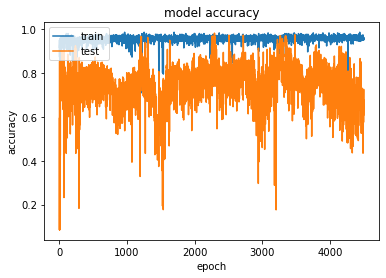

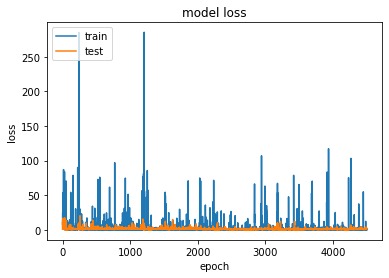

In [176]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [177]:
# evaluate the model
_, train_acc = model1.evaluate(X_train, y_train, verbose=0)
_, test_acc = model1.evaluate(X_test, Y_test, verbose=0)
train_acc, test_acc

(0.9583333134651184, 0.5779122710227966)

In [178]:
# predict probabilities for test set
yhat_probs = model1.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model1.predict_classes(X_test, verbose=0)

In [179]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(Y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Y_test, yhat_classes)
print('F1 score: %f' % f1)

Accuracy: 0.577912
Precision: 0.164157
Recall: 0.973214
F1 score: 0.280928


In [174]:
# kappa
kappa = cohen_kappa_score(Y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Y_test, yhat_classes)
print(matrix)

Cohens kappa: 0.397736
ROC AUC: 0.741876
[[1071  139]
 [  36   76]]


**USING EARLY STOPPING**

In [196]:
earlyStopping = EarlyStopping(monitor='val_loss', patience=50, verbose=0, mode='min')
mcp_save = ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')

In [197]:
# define the keras model
model1 = Sequential()
model1.add(Dense(128, input_dim=27, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
# compile the keras model
model1.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
# fit the keras model on the dataset
# Fit the model
history = model1.fit(X_train, y_train, validation_data=(X_test,Y_test),  callbacks=[earlyStopping, mcp_save], 
                     epochs= 500, batch_size=10)
# evaluate the keras model
_, accuracy = model1.evaluate(X_test, Y_test)
print('Accuracy: %.2f' % (accuracy*100))

Train on 336 samples, validate on 1322 samples
Epoch 1/500
336/336 [==============================] - 0s 608us/step - loss: 3168.5887 - accuracy: 0.4940 - val_loss: 96.7159 - val_accuracy: 0.0847
Epoch 2/500
336/336 [==============================] - 0s 353us/step - loss: 843.5397 - accuracy: 0.5327 - val_loss: 814.4949 - val_accuracy: 0.0847
Epoch 3/500
336/336 [==============================] - 0s 347us/step - loss: 1992.7381 - accuracy: 0.4762 - val_loss: 649.8334 - val_accuracy: 0.0847
Epoch 4/500
336/336 [==============================] - 0s 350us/step - loss: 10709.1588 - accuracy: 0.5119 - val_loss: 252.9738 - val_accuracy: 0.9153
Epoch 5/500
336/336 [==============================] - 0s 350us/step - loss: 860.0669 - accuracy: 0.5208 - val_loss: 4.6655 - val_accuracy: 0.2239
Epoch 6/500
336/336 [==============================] - 0s 350us/step - loss: 600.2778 - accuracy: 0.5893 - val_loss: 865.7959 - val_accuracy: 0.0847
Epoch 7/500
336/336 [==============================] - 0s 

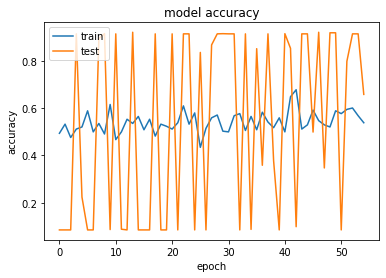

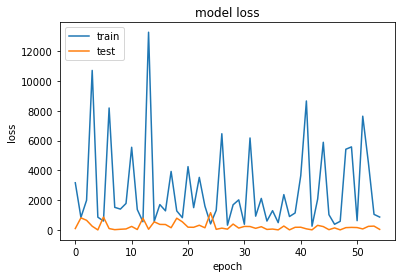

In [198]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [199]:
# evaluate the model
_, train_acc = model1.evaluate(X_train, y_train, verbose=0)
_, test_acc = model1.evaluate(X_test, Y_test, verbose=0)
train_acc, test_acc

(0.7172619104385376, 0.6588502526283264)

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(Y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Y_test, yhat_classes)
print('F1 score: %f' % f1)

In [201]:
# kappa
kappa = cohen_kappa_score(Y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Y_test, yhat_classes)
print(matrix)

Cohens kappa: 0.158995
ROC AUC: 0.960316
[[655 555]
 [  3 109]]


## APPLYING SMOTE (Super Sampling)

In [205]:
import imblearn
from imblearn.over_sampling import SMOTE

In [206]:
# transform the dataset
oversample = SMOTE()

In [214]:
X, Y = oversample.fit_resample(X, Y)

In [215]:
X.shape, Y.shape

((2756, 27), (2756, 1))

In [222]:
Y["target"].value_counts()

1    1378
0    1378
Name: target, dtype: int64

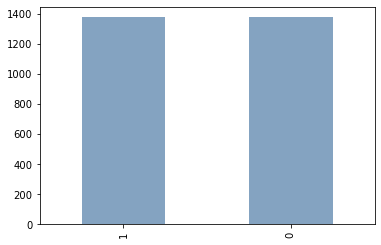

In [250]:
pd.Series(Y["target"].value_counts()).plot.bar(color=(0.2, 0.4, 0.6, 0.6))

In [216]:
# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.4, random_state=42, stratify = Y)

In [217]:
# Applying Gaussian Bayes
gnb = GaussianNB()

In [218]:
y_pred = gnb.fit(X_train, y_train).predict(X_test)

C:\Users\Lenovo\.conda\envs\tensorflow_cpu\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [219]:
confusion_matrix(y_test, y_pred)

array([[539,  13],
       [528,  23]], dtype=int64)

In [234]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.51      0.98      0.67       552
     class 1       0.64      0.04      0.08       551

    accuracy                           0.51      1103
   macro avg       0.57      0.51      0.37      1103
weighted avg       0.57      0.51      0.37      1103



In [223]:
# Applying the NEURAAL NETWORK

In [224]:
earlyStopping = EarlyStopping(monitor='val_loss', patience=50, verbose=0, mode='min')
mcp_save = ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')

In [226]:
# define the keras model
model1 = Sequential()
model1.add(Dense(128, input_dim=27, activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
# compile the keras model
model1.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
# fit the keras model on the dataset
# Fit the model
history = model1.fit(X_train, y_train, validation_data=(X_test,y_test),  callbacks=[earlyStopping, mcp_save], 
                     epochs= 500, batch_size=10)

Train on 1653 samples, validate on 1103 samples
Epoch 1/500
1653/1653 [==============================] - 2s 964us/step - loss: 287.5720 - accuracy: 0.5166 - val_loss: 1217.4198 - val_accuracy: 0.5005
Epoch 2/500
1653/1653 [==============================] - 0s 229us/step - loss: 164.8184 - accuracy: 0.5142 - val_loss: 1975.8426 - val_accuracy: 0.4995
Epoch 3/500
1653/1653 [==============================] - 0s 180us/step - loss: 189.2843 - accuracy: 0.5239 - val_loss: 275.2910 - val_accuracy: 0.4995
Epoch 4/500
1653/1653 [==============================] - 0s 193us/step - loss: 121.5302 - accuracy: 0.5088 - val_loss: 97.3423 - val_accuracy: 0.5222
Epoch 5/500
1653/1653 [==============================] - 0s 218us/step - loss: 29.5422 - accuracy: 0.4955 - val_loss: 0.7020 - val_accuracy: 0.5005
Epoch 6/500
1653/1653 [==============================] - 0s 210us/step - loss: 0.6951 - accuracy: 0.4930 - val_loss: 0.6932 - val_accuracy: 0.4995
Epoch 7/500
1653/1653 [=============================

Epoch 56/500
1653/1653 [==============================] - 0s 170us/step - loss: 0.6936 - accuracy: 0.4991 - val_loss: 0.6931 - val_accuracy: 0.5005
Epoch 57/500
1653/1653 [==============================] - 0s 172us/step - loss: 0.6937 - accuracy: 0.4846 - val_loss: 0.6931 - val_accuracy: 0.4995
Epoch 58/500
1653/1653 [==============================] - 0s 184us/step - loss: 0.6936 - accuracy: 0.4858 - val_loss: 0.6932 - val_accuracy: 0.4995
Epoch 59/500
1653/1653 [==============================] - 0s 168us/step - loss: 0.6935 - accuracy: 0.4900 - val_loss: 0.6932 - val_accuracy: 0.5005
Epoch 60/500
1653/1653 [==============================] - 0s 172us/step - loss: 0.6936 - accuracy: 0.4900 - val_loss: 0.6932 - val_accuracy: 0.5005
Epoch 61/500
1653/1653 [==============================] - 0s 181us/step - loss: 0.6936 - accuracy: 0.4828 - val_loss: 0.6931 - val_accuracy: 0.5005
Epoch 62/500
1653/1653 [==============================] - 0s 198us/step - loss: 0.6934 - accuracy: 0.5009 - val_

In [228]:
# evaluate the keras model
_, accuracy = model1.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

1103/1103 [==============================] - 0s 20us/step
Accuracy: 49.95


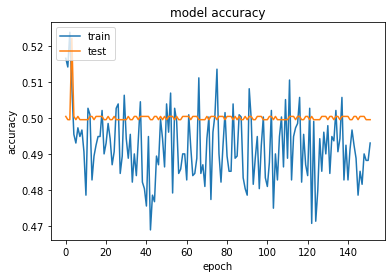

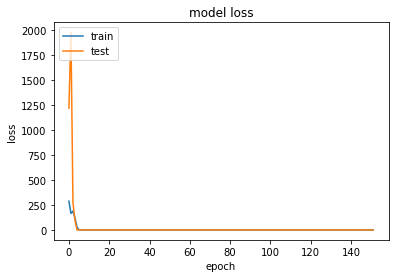

In [229]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [231]:
# evaluate the model
_, train_acc = model1.evaluate(X_train, y_train, verbose=0)
_, test_acc = model1.evaluate(X_test, y_test, verbose=0)
train_acc, test_acc

(0.5003024935722351, 0.49954667687416077)

In [232]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(Y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Y_test, yhat_classes)
print('F1 score: %f' % f1)

Accuracy: 0.577912
Precision: 0.164157
Recall: 0.973214
F1 score: 0.280928


In [233]:
# kappa
kappa = cohen_kappa_score(Y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Y_test, yhat_classes)
print(matrix)

Cohens kappa: 0.158995
ROC AUC: 0.960316
[[655 555]
 [  3 109]]


In [235]:
# applying simple SVM model
from sklearn import svm
clf = svm.SVC()
clf.fit(X_test, y_test)

C:\Users\Lenovo\.conda\envs\tensorflow_cpu\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [236]:
y_pred = clf.predict(X_test)

In [237]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=target_names))

[[548   4]
 [535  16]]
              precision    recall  f1-score   support

     class 0       0.51      0.99      0.67       552
     class 1       0.80      0.03      0.06       551

    accuracy                           0.51      1103
   macro avg       0.65      0.51      0.36      1103
weighted avg       0.65      0.51      0.36      1103



## Conclusion

* Simple ML algorithms are not working due to high diemnsionality of the data.
* Even SUPER-SAMPLING doesn't helps the Machine Learning OR the deep learning architectures.
* Under-Sampling is the only option to go with for 60-40 train-test ratio.

### With Imbalanced Data

* The ML algorithms Don't work as expected due to high dimensionality
* Achieving the accuracy of 0.82 & f1 score of 0.48 only by Gaussian naive bayes, but that's because of imbalanced test set.
* Neural network achieve the accuracy of 83 % but yet because of the imbalanced test set.

### Using Balanced Dataset (Good Model is here) (Under-Sampled Train-test Set)

**BEST MODEL if you want simply balanced TRAIN & TEST DATASET**

* Overall dataset, when under-sampled consisted of only 560 rows equally split between, 0 & 1 for bussiness assciate's presence.
* Ml achieved accuracy of 50 % only.
* Train & Test set split is 60/40 ratio. (224 Cases for Testing purpose)

* But here, the NEURAL NETWORK MODEL achieved the BEST ACCURACY OF 84 %.
* Accuracy: 0.839286
* Precision: 0.941860
* Recall: 0.723214
* F1 score: 0.818182
* Cohens kappa: 0.678571
* ROC AUC: 0.811424
* Confusion Matrix:
[[107   5]
 [ 31  81]]

#### With Normalisation

* The performance of Neural network goes to 50 % & hence the idea is dumped.

### Working with Enhanced Test Set (Best Overall Model)

* YES, the initial balanced training & test set are balanced. (But previously removed records are added in original test set to gauge model's real-world performance)
* Here the number of records in training is : 336
* And the number of records for testing are : 1322 (Under-sampled test set + The remainign records that are removed while under-sampling)

* RESULTS
* COnfusion Matrix

[[1071  139]
 
 [  36   76]]

**Accuracy	0.8676	ACC = (TP + TN) / (P + N)**

**F1 Score	0.9245**

* Cohens kappa: 0.397736
* ROC AUC: 0.741876

**NEURAL NETWORK MODEL USED**
#### define the keras model
* model1 = Sequential()
* model1.add(Dense(128, input_dim=27, activation='relu'))
* model1.add(Dense(64, activation='relu'))
* model1.add(Dense(1, activation='sigmoid'))
#### compile the keras model
* model1.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

**In comparison : MDOEL has been fine tuned manually, based on intuition from previous models to curb OVER_FITTING**

* The OPTIMISER has been changed from ADAM to RMSProp, due to its more suitability in such conditions.
* THE neurons have been kept in such manner that the model neither overfits, neither underfits.
* The model has been run for 12,000 epochs with Early Stopping mechanism.

### Applying Super-Sampling ( SMOTE : Synthetic Minority Over-sampling)

* This doesnot helps anyhow, in the model's performance, either in the case of ML & DL algorithms.
* The Gaussian Naive bayes gives : 51 % accuracy & f1 score of 37 %.

* Similarly, in case of neural network, it suffers from over-fitting & accuracy is similar to ML.

**NOTE: the data is balanced always keeping the "Business Associate Inovlved" column in mind as it is the primary target to be classified, with 60-40 % train-test split (AS INSTRUCTED IN STARTING OF PROJECT)**

**DATA has been balanced manually with random selection**

## Future Can-Be Done things

* Increase the training set percentage & kesping in mind to maintain the balance as long as possible.
* Try more Neural network architectures for the case Of SMOTE.
* FOr better performance, of ML & DL, try to reduce the dimesnionality of DATASET, converting ONE-HOT encoders back to LABEL encoded features, wherever possible, such as in YEARS column.

## PLot confusion matrix

In [1]:
from sklearn.metrics import plot_confusion_matrix

In [2]:
cm = [[1,1],[1,1]]

In [5]:
import numpy as np


def plot_confusion_matrix1(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

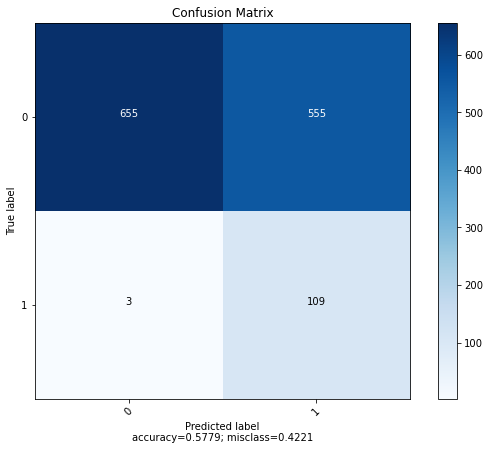

In [13]:
plot_confusion_matrix1(cm          = np.array([[655,  555],
                                              [  3,  109]]), 
                      normalize    = False,
                      target_names = ["0","1"],
                      title        = "Confusion Matrix")